***
# Problem Selection
***
## Standing Ovation Problem:
## After a performance, a few audience members begin clapping and standing. Some people join because others are standing; some need a strong performance plus a social cue. How does a standing ovation spread?

***
# Modeling Collective Behavior: Standing Ovation Problem
***

***
## Modeling Approach
***
- ### Key Assumptions
    ***
    - #### Triangular Vision Range: 
        ##### Agents observe a triangular area of visible neighbors extending up to 6 cells diagonally in all directions.

    - #### Performance Quality Influence: 
        ##### The likelihood of standing up or sitting down is adjusted based on the quality of the performance.

    - #### Influence of Immediate Neighbors: 
        ##### Agents are affected by the standing/sitting state of their immediate neighbors and the visible cells.

    - #### Heterogeneous Personality Types: 
        ##### The audience is a mix of trend-followers, skeptics, and neutrals, each with distinct responses to influence.

    - #### Binary State: 
        ##### Agents can only be in one of two states—standing or sitting.

    - #### Finite Timesteps: 
        ##### The simulation runs for a predefined number of iterations (e.g., 50 timesteps).
    ***
- ### Behavioral rules
    ***
    - #### Standing Decision:
        ##### An agent stands up if the combined influence of visible neighbors and immediate neighbors exceeds a threshold (scaled by the agent's personality and performance quality).

    - #### Sitting Decision:
        ##### An agent continues to stand until their standing time exceeds their individual sitting tendency (adjusted by performance quality). Once seated, the agent does not stand again.
    ***
- ### Mechanism of interaction
    ***
    - #### Triangular Vision: 
        ##### Agents interact with others within a triangular vision range, influencing their decisions based on the observed behavior.

    - #### Localized Neighbor Interaction: 
        ##### Immediate neighbors (in a 3x3 grid around the agent) contribute more prominently to the influence factor.

    - #### Global Effects via Performance: 
        ##### Performance quality acts as a global modifier affecting the thresholds for standing and sitting.
***

***
### Representation
***
- #### Pseudocode
    - ##### Initialize Variables

        Create the audience grid with initial states (sitting or standing).

        Assign personality types and sitting tendencies to each cell.
        
        Set influence factors and performance quality.


    - ##### Simulation Loop

    For each timestep:

        Create a copy of the current grid.

        For each individual:

            Calculate visible influence from cells within the triangular vision range.

            Calculate neighbor influence from immediate neighbors.

            Compute the total influence using personality factors and performance quality.

            Apply decision rules:

                Stand up if influence exceeds the threshold.

                Sit down based on sitting tendency adjusted by performance quality.

        Update the grid and record the results.

    - ##### Post-Simulation

        Store results for each timestep.

        Generate heatmaps to visualize standing dynamics.

        Plot standing counts over time.

***
### Innovation
***
- #### Existing Model
    - ##### Miller and Page's Standing Ovation Model
        https://jasss.soc.surrey.ac.uk/12/1/6/appendixB/MillerPage2004.html#miller2004

        Miller and Page (2004) consider two types of neighbourhoods: "five neighbours" and "conical neighbourhood". In the first one, each agent looks at the two agents on either side and the three agents on the row ahead. In the "conical neighbourhood", each agent looks at the two agents on either side, the three agents on the first row ahead, the five agents on the second row ahead and so on.
- #### Proposed Variation / Alternative Approach
    - ##### Different Personalities
        Incorporated personalities to agents to determine their behavior to stand or remain seated
        
    - ##### Combination of neighbors and frontal vision cone
        First simply do neighbors (modified to also the neighbors behind the agent, rather a eight neighbour approach) and then for the second simulation, apply the frontal vision cone as well
***

### CODE

#### NEIGHBORS ONLY

##### Low Performance


Simulation for Mixed Personalities:


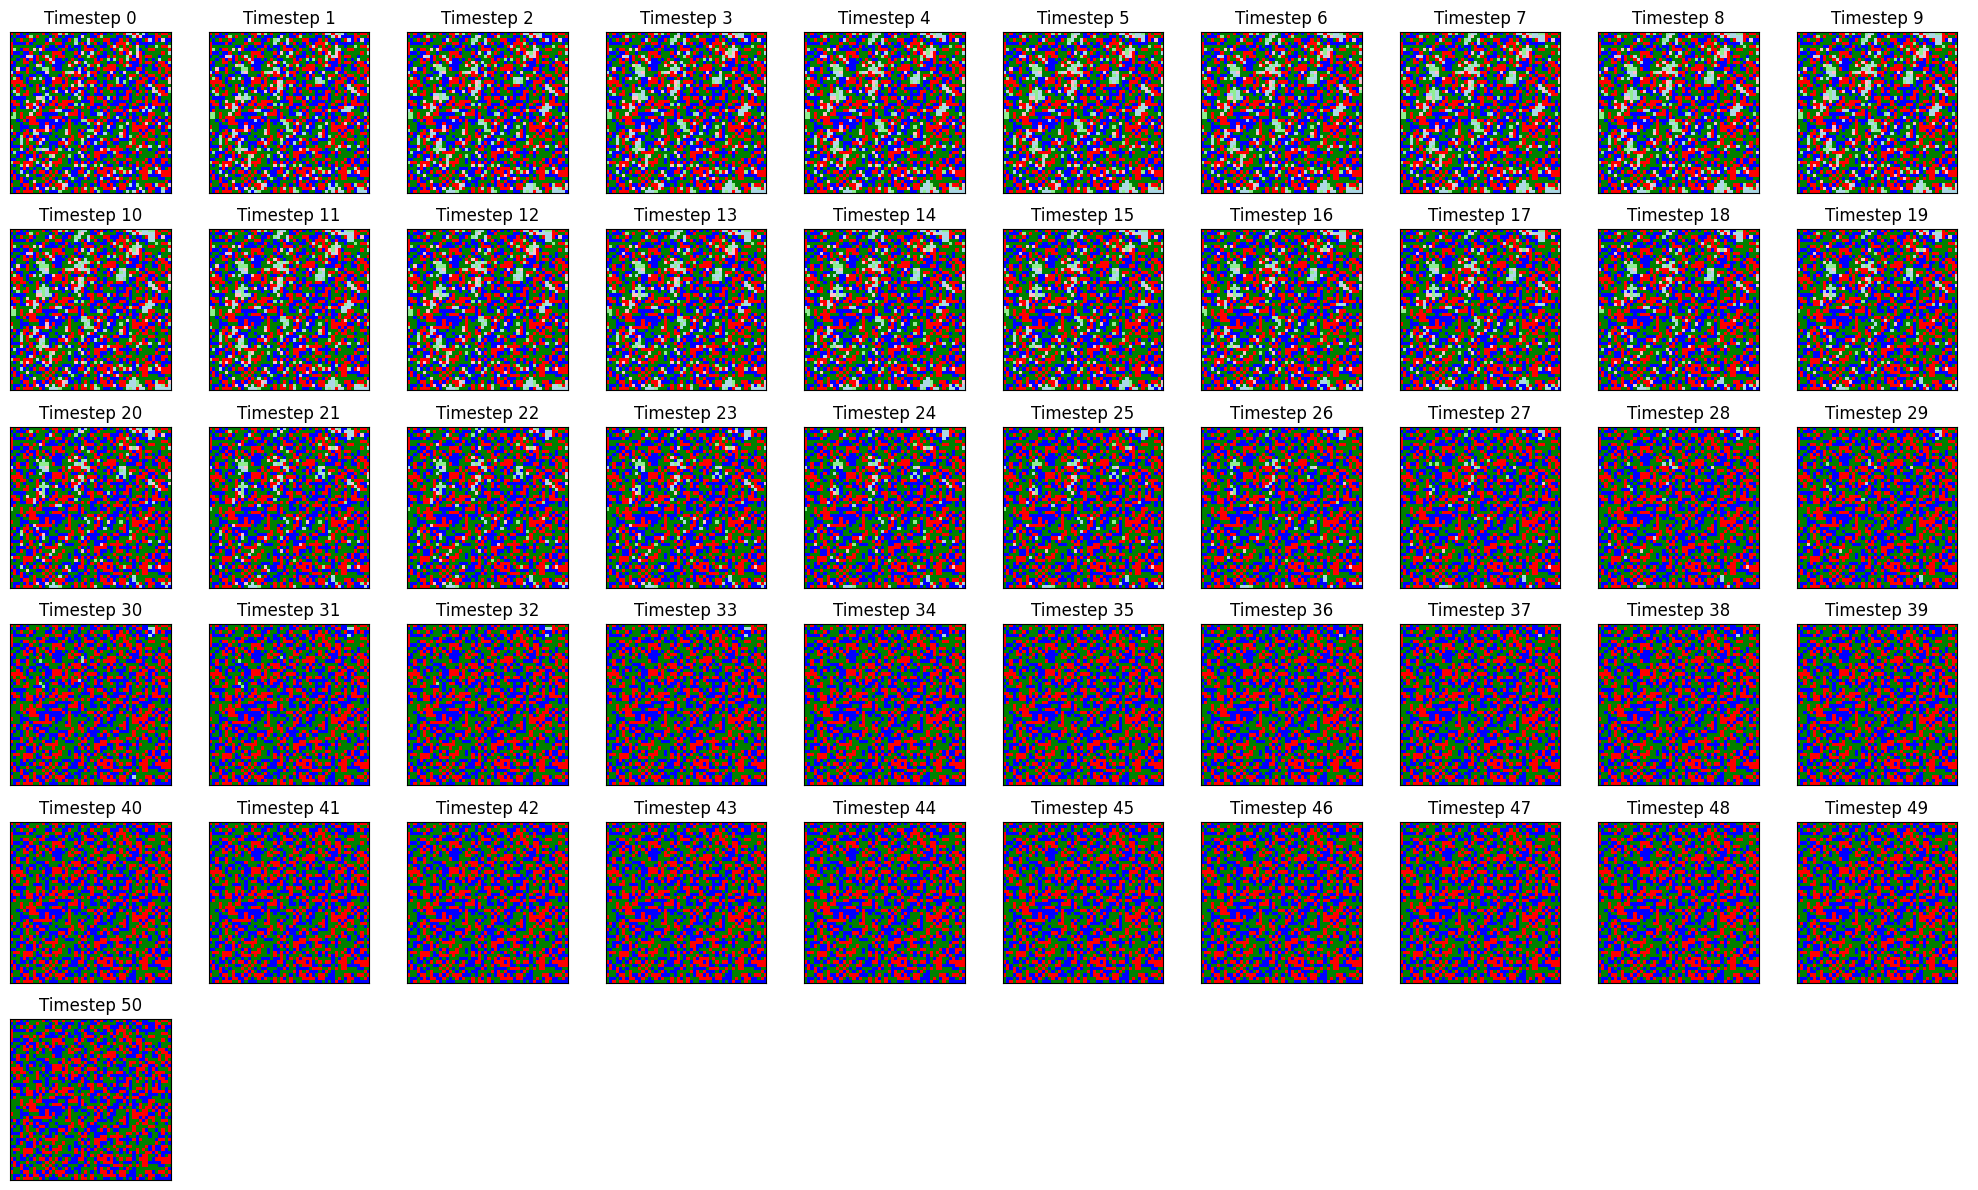

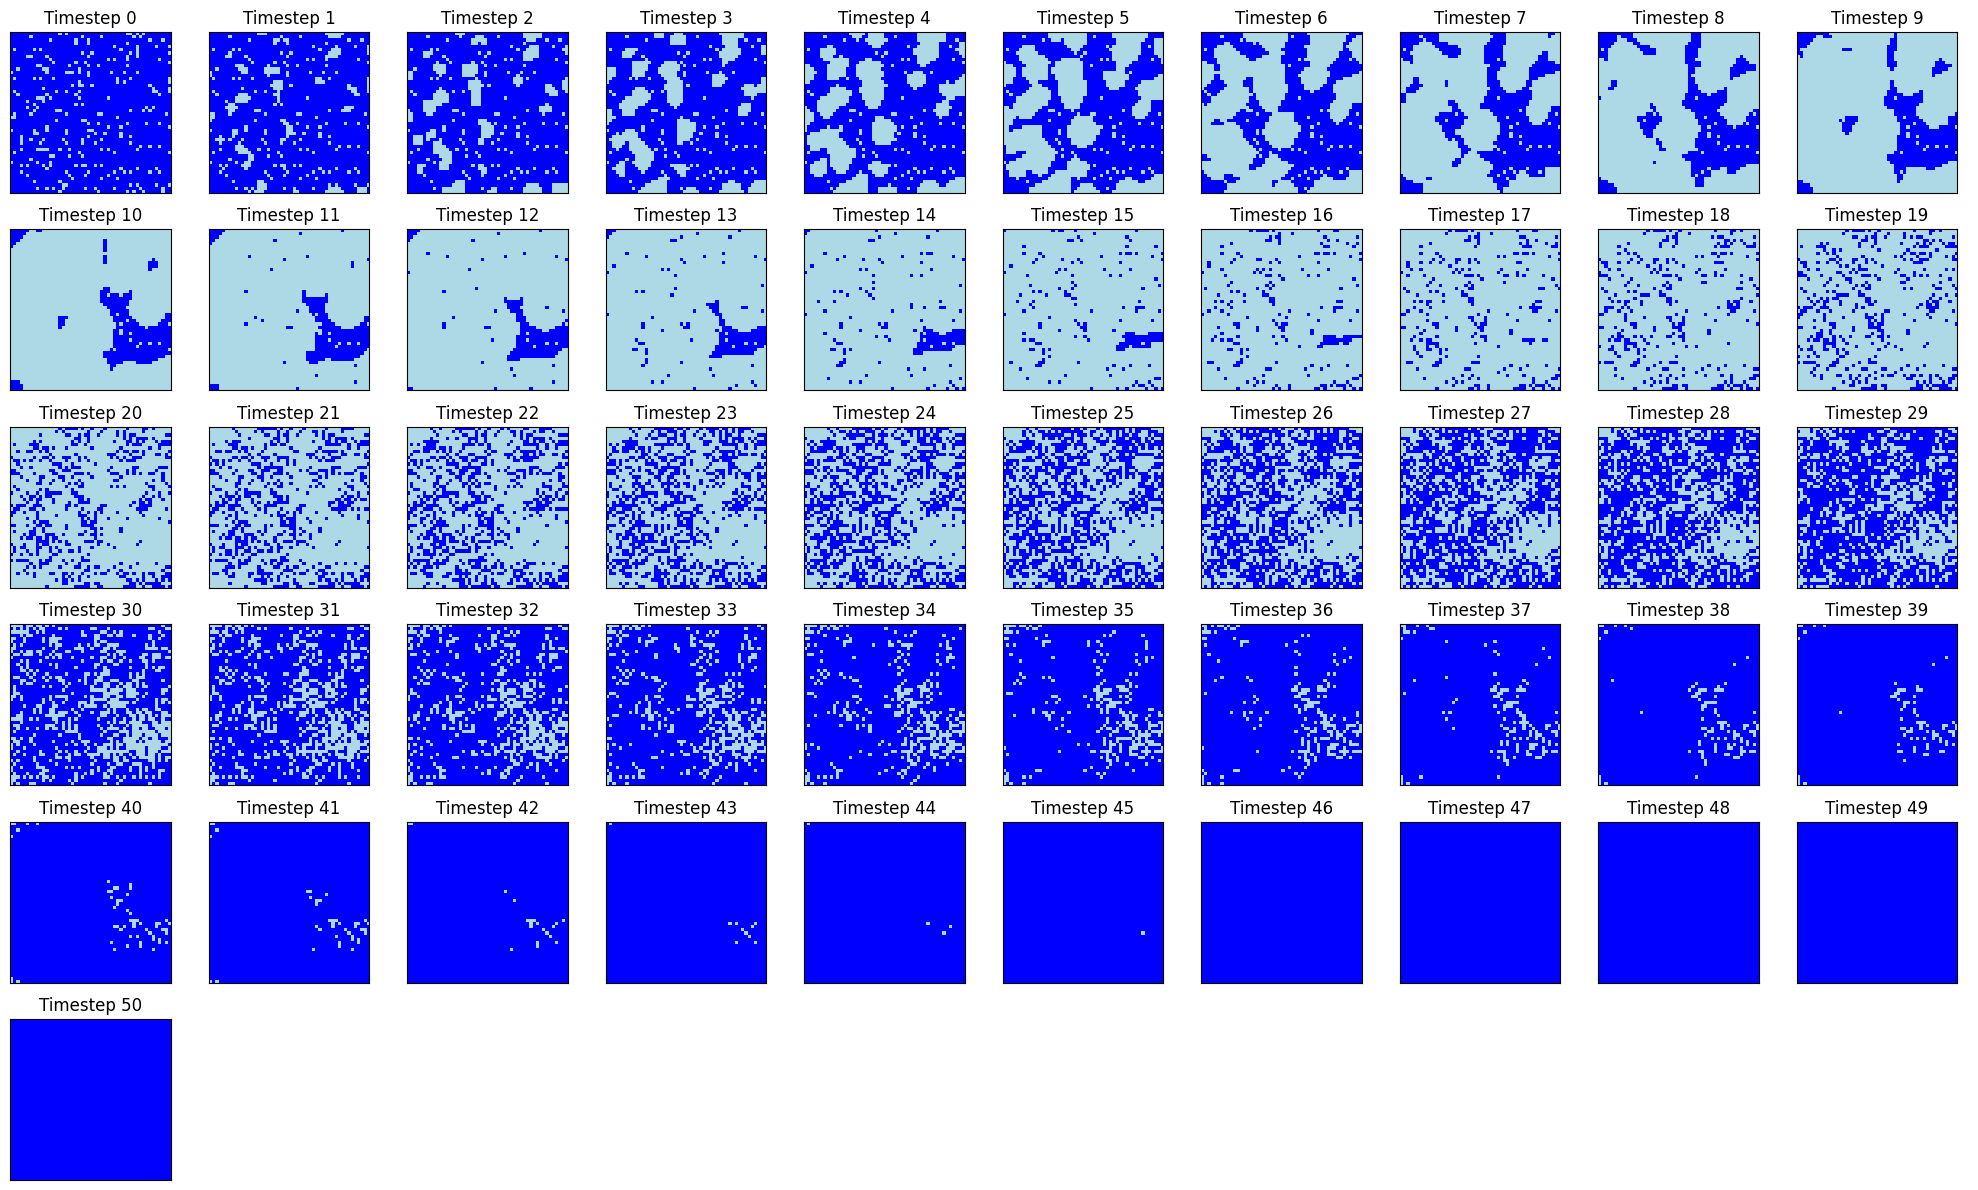

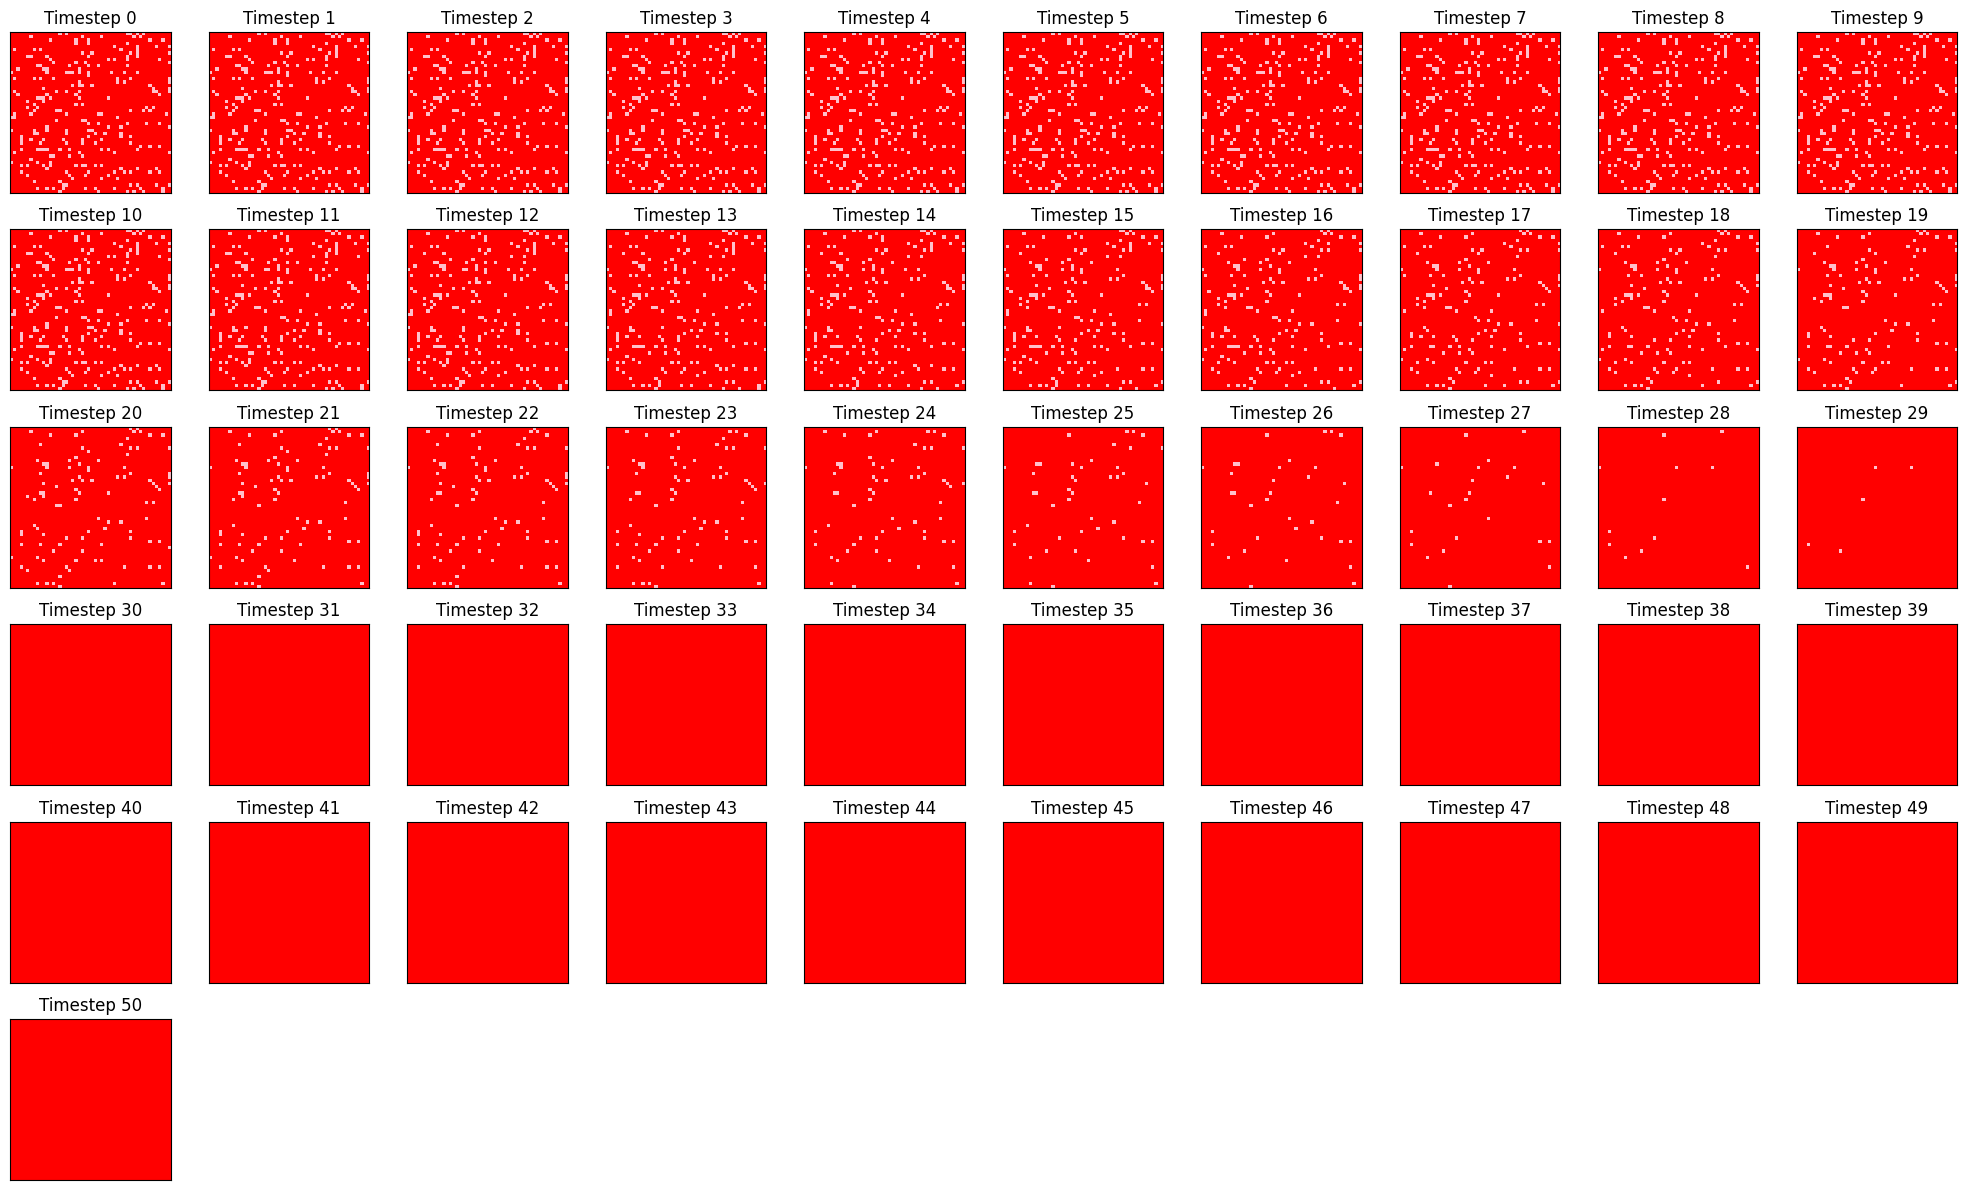

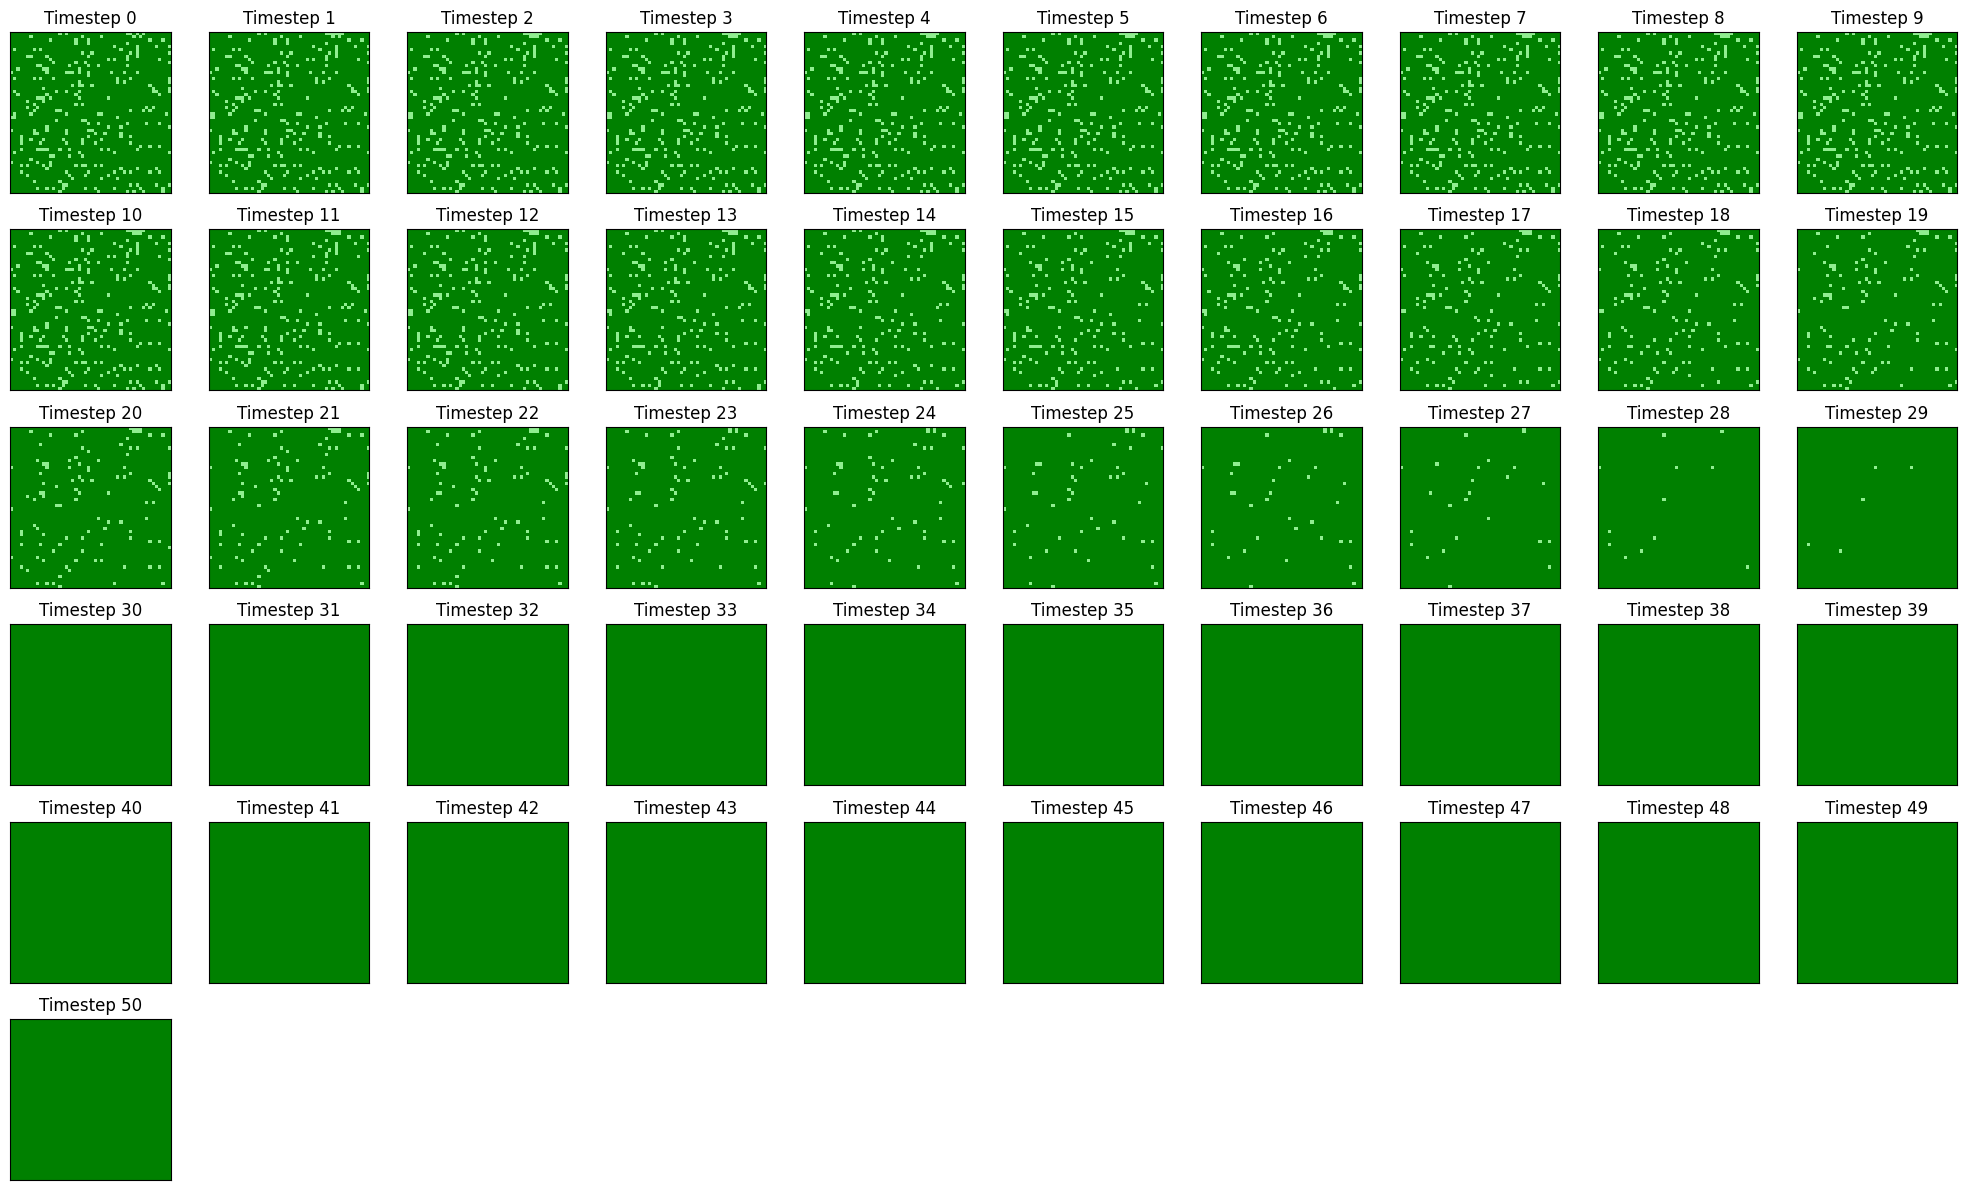

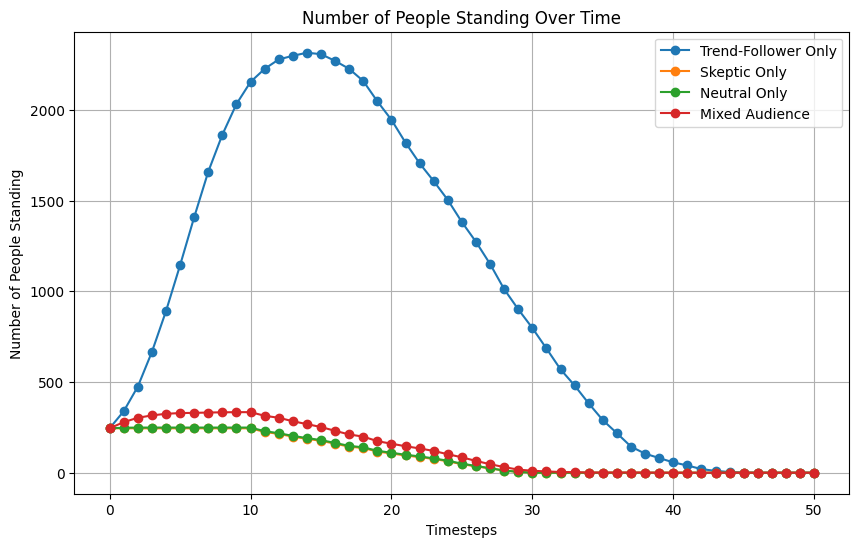

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_colormap():
    from matplotlib.colors import ListedColormap
    colors = ['blue', 'red', 'green', 'lightblue', 'pink', 'lightgreen']  # Seated/Standing for Trend-Follower, Skeptic, Neutral
    return ListedColormap(colors)

def simulate_standing_ovation(grid_size, audience_types, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality):
    grid = initial_standing.copy()
    history = [grid.copy()]
    standing_counts = [np.sum(grid)]

    # Track how long each agent has been standing
    standing_time = np.zeros((grid_size, grid_size))

    for t in range(max_iters):
        new_grid = grid.copy()
        new_standing_time = standing_time.copy()

        for x in range(grid_size):
            for y in range(grid_size):
                neighbors = grid[max(0, x-1):min(grid_size, x+2), max(0, y-1):min(grid_size, y+2)]
                neighbor_count = (neighbors.size - 1)  # Total neighbors excluding center
                neighbor_sum = np.sum(neighbors) - grid[x, y]  # Exclude center cell
                neighbor_influence = neighbor_sum / neighbor_count if neighbor_count > 0 else 0

                influence = influence_factors[audience_types[x, y]] * (neighbor_influence*2) * performance_quality

                if not grid[x, y]:  # Currently sitting
                    if influence > 0.5 and new_standing_time[x, y] == 0:  # Stand up threshold
                        new_grid[x, y] = True
                        new_standing_time[x, y] = 0
                else:  # Currently standing
                    new_standing_time[x, y] += 1

                    if new_standing_time[x, y] > sitting_tendency[x, y] / performance_quality:
                        new_grid[x, y] = False  # Sit down permanently
                        new_standing_time[x, y] = -1  # Mark as permanently seated

        grid = new_grid
        standing_time = new_standing_time
        history.append(grid.copy())
        standing_counts.append(np.sum(grid))

    return history, standing_counts

def plot_heatmaps(history, audience_types):
    colormap = get_colormap()
    steps_to_plot = len(history)
    cols = 10  # Number of columns in the plot grid
    rows = (steps_to_plot + cols - 1) // cols  # Number of rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(20, 2 * rows))
    axes = axes.flatten()

    for i, grid in enumerate(history):
        ax = axes[i]
        # Map grid and audience types to color indices
        visual_grid = np.zeros_like(grid, dtype=int)
        for x in range(grid.shape[0]):
            for y in range(grid.shape[1]):
                if grid[x, y]:
                    if audience_types[x, y] == 'trend-follower':
                        visual_grid[x, y] = 3  # Light blue
                    elif audience_types[x, y] == 'skeptic':
                        visual_grid[x, y] = 4  # Pink
                    elif audience_types[x, y] == 'neutral':
                        visual_grid[x, y] = 5  # Light green
                else:
                    if audience_types[x, y] == 'trend-follower':
                        visual_grid[x, y] = 0  # Blue
                    elif audience_types[x, y] == 'skeptic':
                        visual_grid[x, y] = 1  # Red
                    elif audience_types[x, y] == 'neutral':
                        visual_grid[x, y] = 2  # Green

        im = ax.imshow(visual_grid, cmap=colormap, vmin=0, vmax=5)
        ax.set_title(f'Timestep {i}')
        ax.set_xticks([])
        ax.set_yticks([])
        # Add solid gridlines
        ax.grid(visible=True, color="black", linestyle="-", linewidth=0.5)
        ax.set_xticks(np.arange(-0.5, grid.shape[1], 1), minor=True)
        ax.set_yticks(np.arange(-0.5, grid.shape[0], 1), minor=True)
        ax.tick_params(which="minor", length=0)

    for ax in axes[len(history):]:
        ax.axis('off')  # Turn off unused axes

    plt.tight_layout()
    plt.show()

def plot_standing_counts(standing_counts_list, labels):
    plt.figure(figsize=(10, 6))
    for counts, label in zip(standing_counts_list, labels):
        plt.plot(counts, marker='o', linestyle='-', label=label)
    plt.title('Number of People Standing Over Time')
    plt.xlabel('Timesteps')
    plt.ylabel('Number of People Standing')
    plt.legend()
    plt.grid(True)
    plt.show()

# Simulation for mixed personalities
grid_size = 50
max_iters = 50
initial_standing = np.random.choice([True, False], size=(grid_size, grid_size), p=[0.1, 0.9])
sitting_tendency = np.random.uniform(5, 15, size=(grid_size, grid_size))  # Random sitting tendencies
performance_quality = 0.5 # poor performance

# Mixed audience types
audience_types_mixed = np.random.choice(['trend-follower', 'skeptic', 'neutral'], size=(grid_size, grid_size), p=[0.3, 0.3, 0.4])
audience_types_trend = np.full((grid_size, grid_size), 'trend-follower')
audience_types_skeptic = np.full((grid_size, grid_size), 'skeptic')
audience_types_neutral = np.full((grid_size, grid_size), 'neutral')

influence_factors = {
    'trend-follower': 1.5,
    'skeptic': 0.5,
    'neutral': 1.0
}

# Run simulations
history_mixed, standing_counts_mixed = simulate_standing_ovation(
    grid_size, audience_types_mixed, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_trend, standing_counts_trend = simulate_standing_ovation(
    grid_size, audience_types_trend, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_skeptic, standing_counts_skeptic = simulate_standing_ovation(
    grid_size, audience_types_skeptic, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_neutral, standing_counts_neutral = simulate_standing_ovation(
    grid_size, audience_types_neutral, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

# Plot results for mixed audience
print("\nSimulation for Mixed Personalities:")
plot_heatmaps(history_mixed, audience_types_mixed)
plot_heatmaps(history_trend, audience_types_trend)
plot_heatmaps(history_skeptic, audience_types_skeptic)
plot_heatmaps(history_neutral, audience_types_neutral)

# Plot standing counts comparison
plot_standing_counts(
    [standing_counts_trend, standing_counts_skeptic, standing_counts_neutral, standing_counts_mixed],
    ['Trend-Follower Only', 'Skeptic Only', 'Neutral Only', 'Mixed Audience']
)

data = {
    "Timestep": list(range(max_iters + 1)),
    "Trend-Follower Only": standing_counts_trend,
    "Skeptic Only": standing_counts_skeptic,
    "Neutral Only": standing_counts_neutral,
    "Mixed Audience": standing_counts_mixed
}
df = pd.DataFrame(data)

# Save the results to a CSV file
csv_path = "standing_ovation_results_low_performance.csv"
df.to_csv(csv_path, index=False)


##### Discussion: The Trend-Follower Audience were in someway foolish for most of stood up regardless that the performance was bad

##### Average Performance


Simulation for Mixed Personalities:


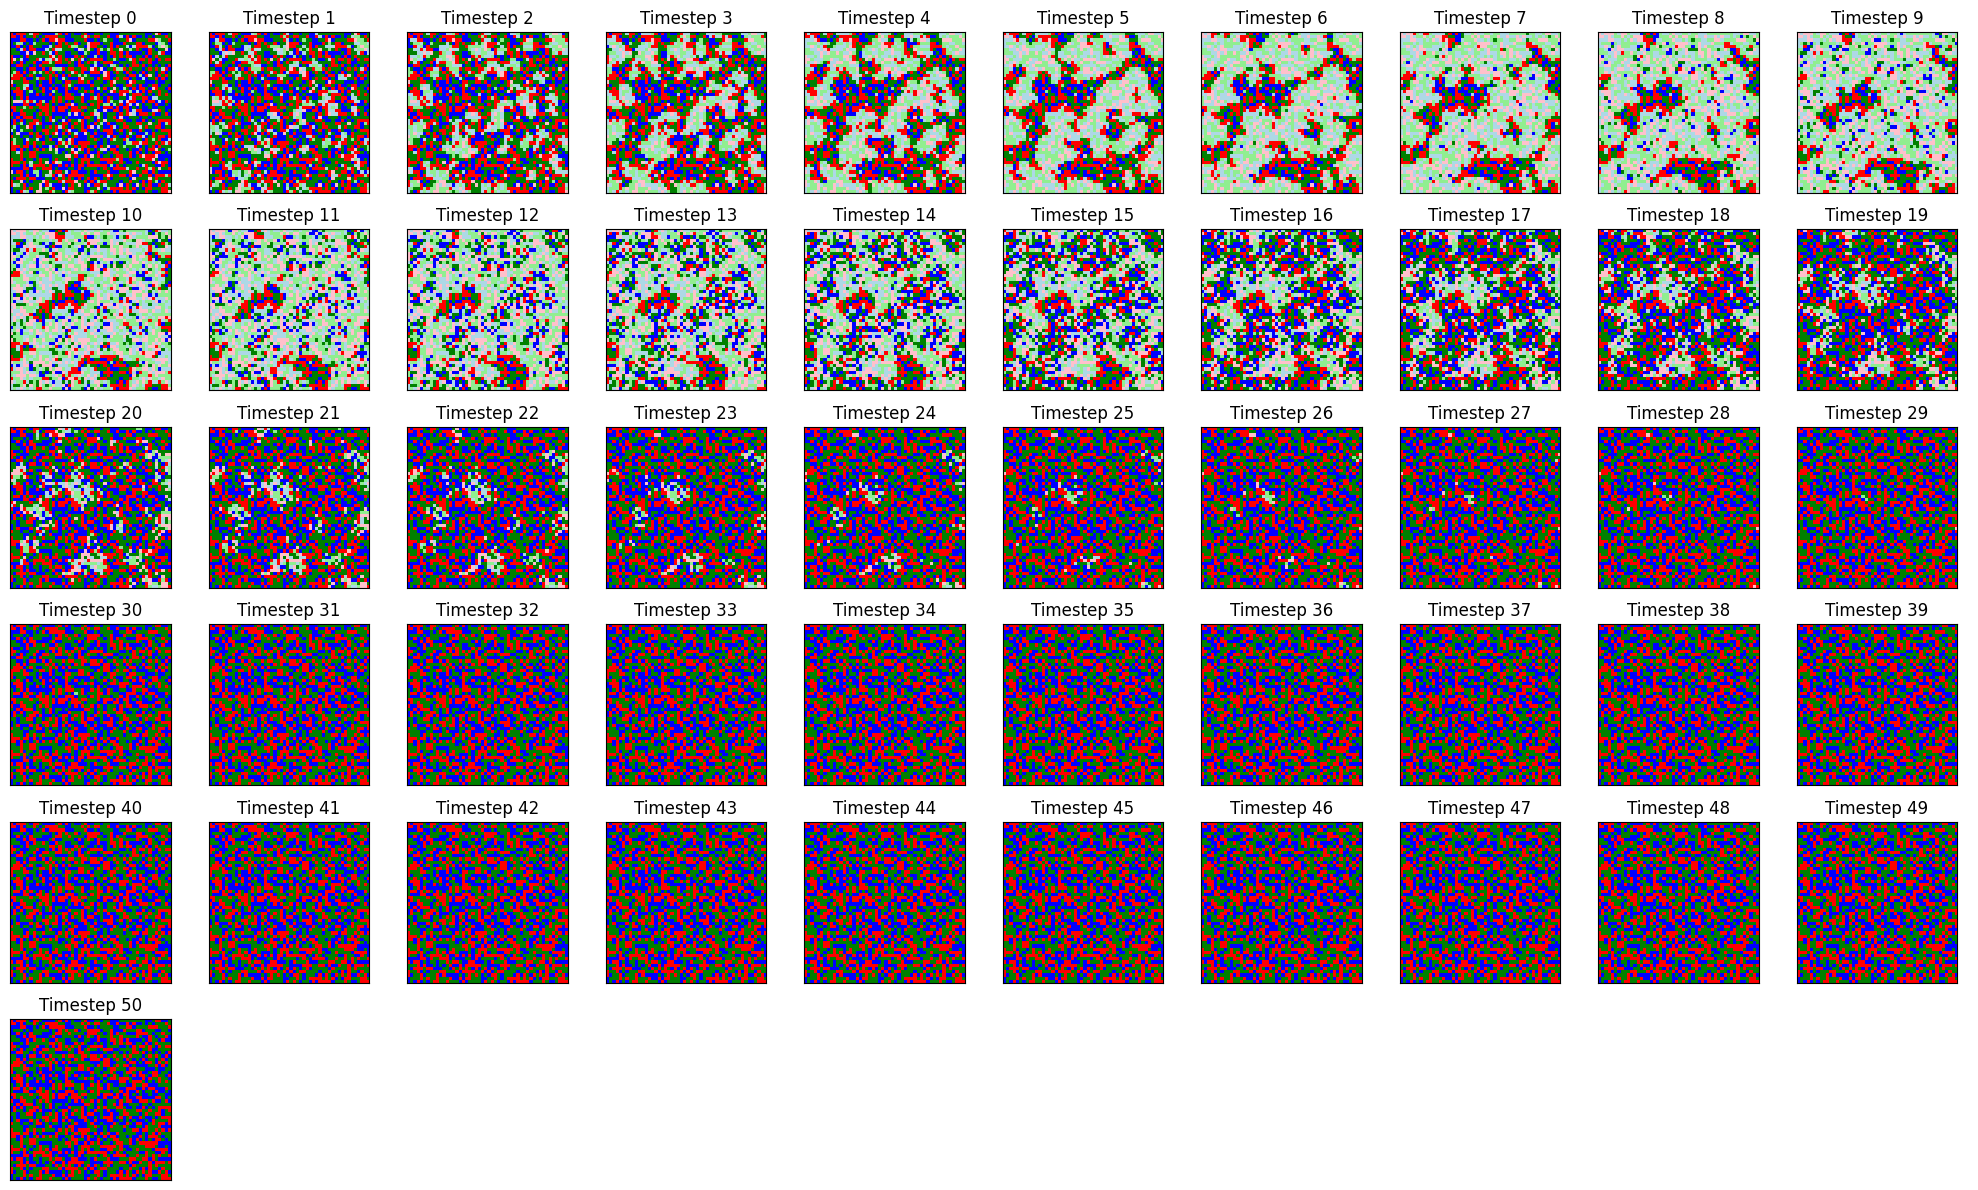

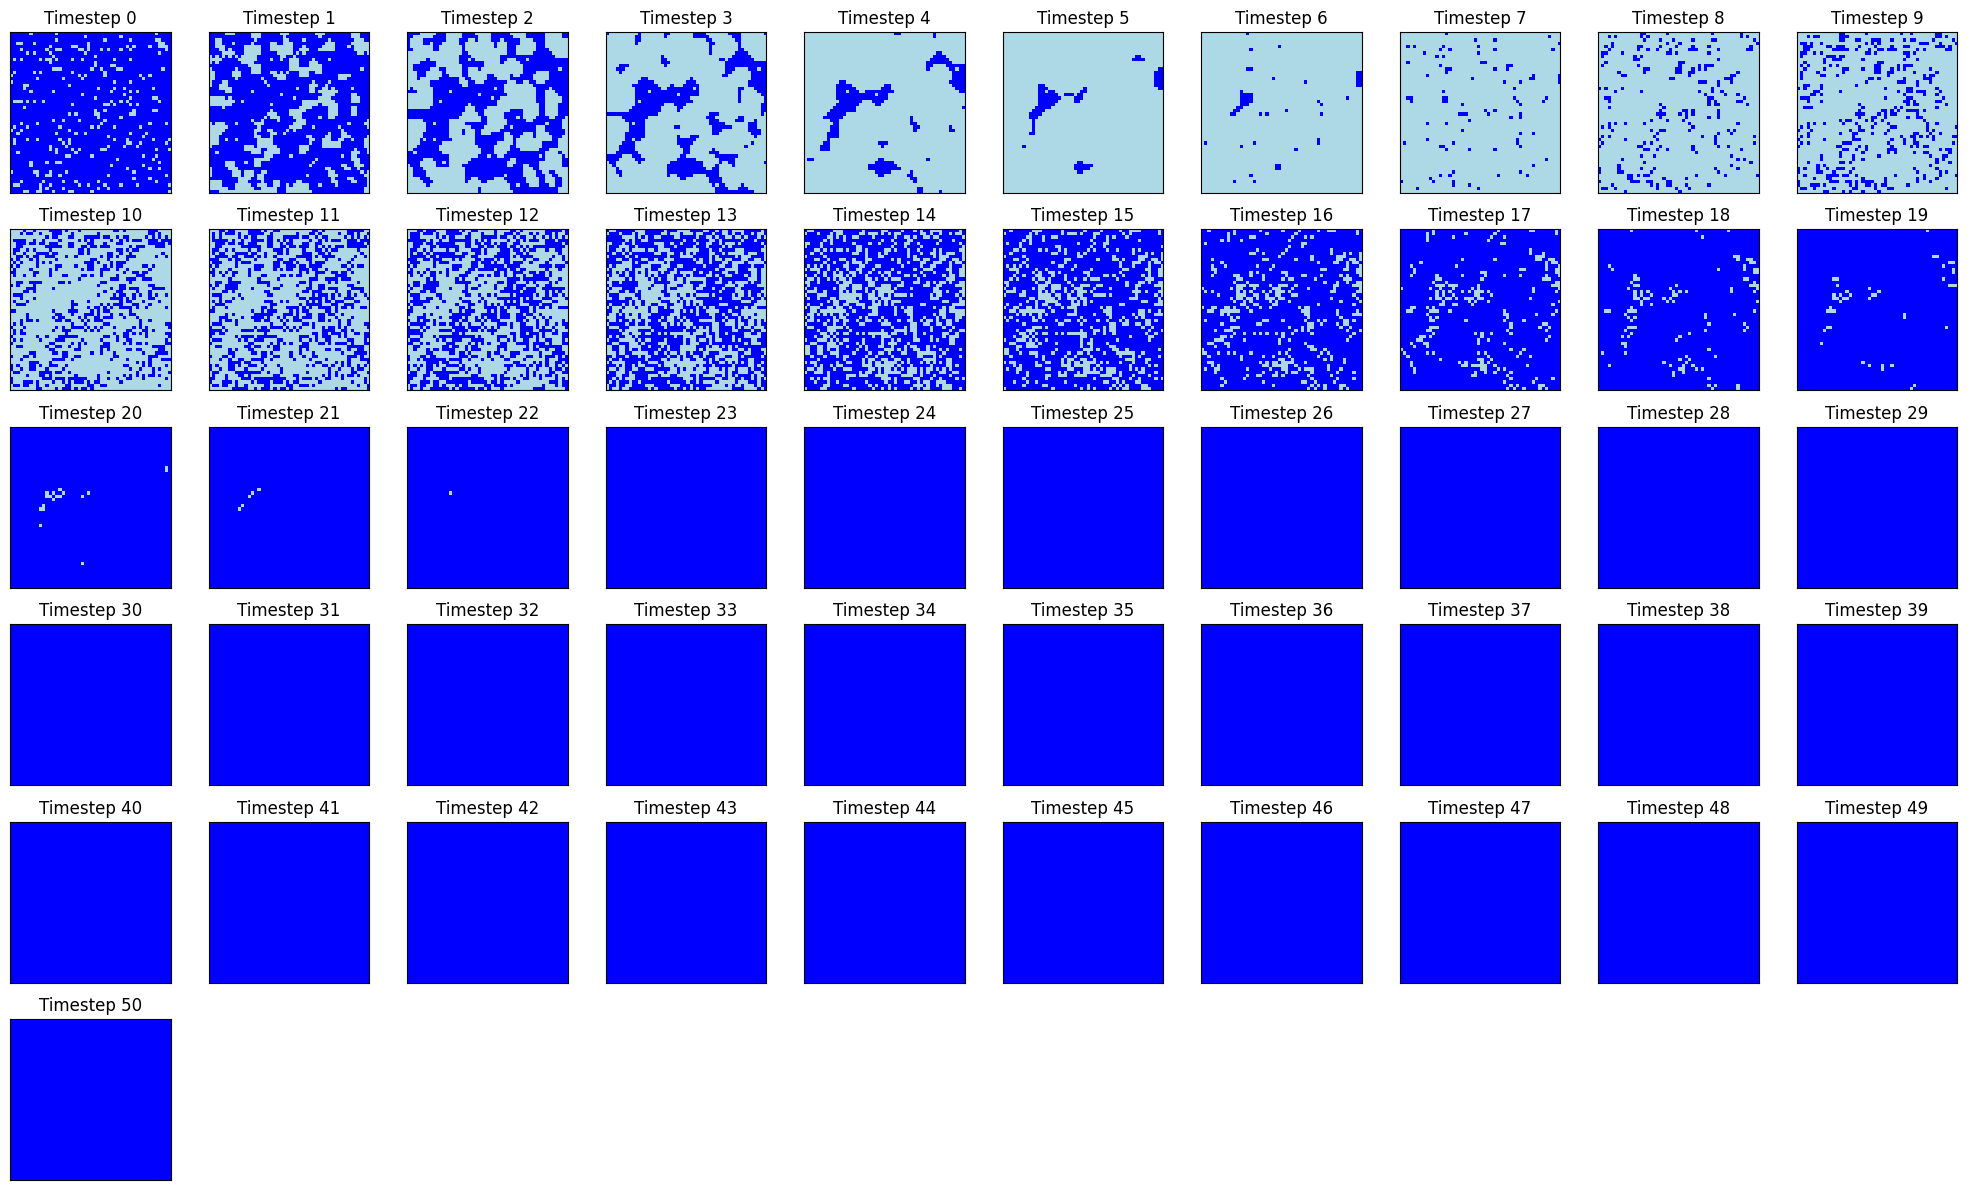

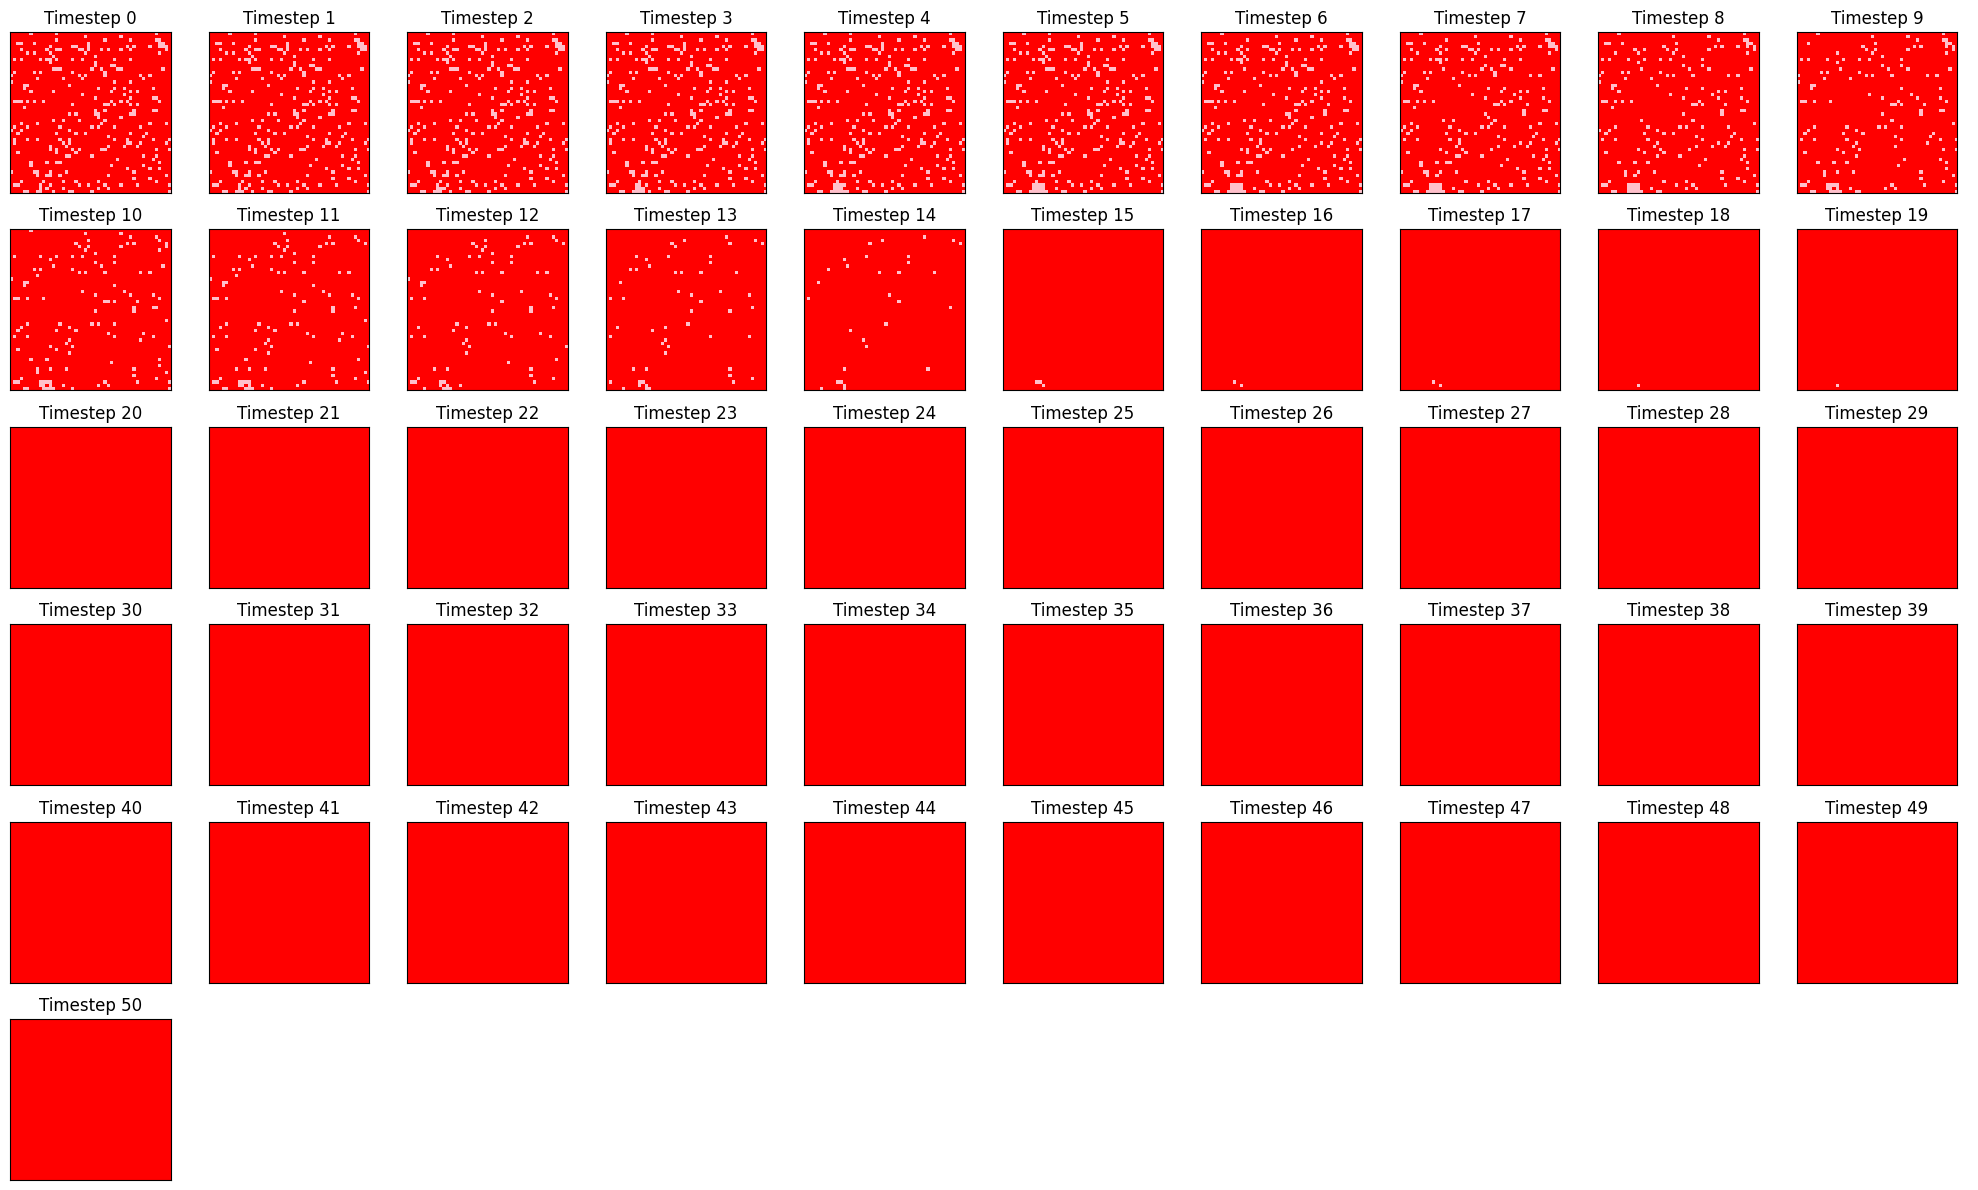

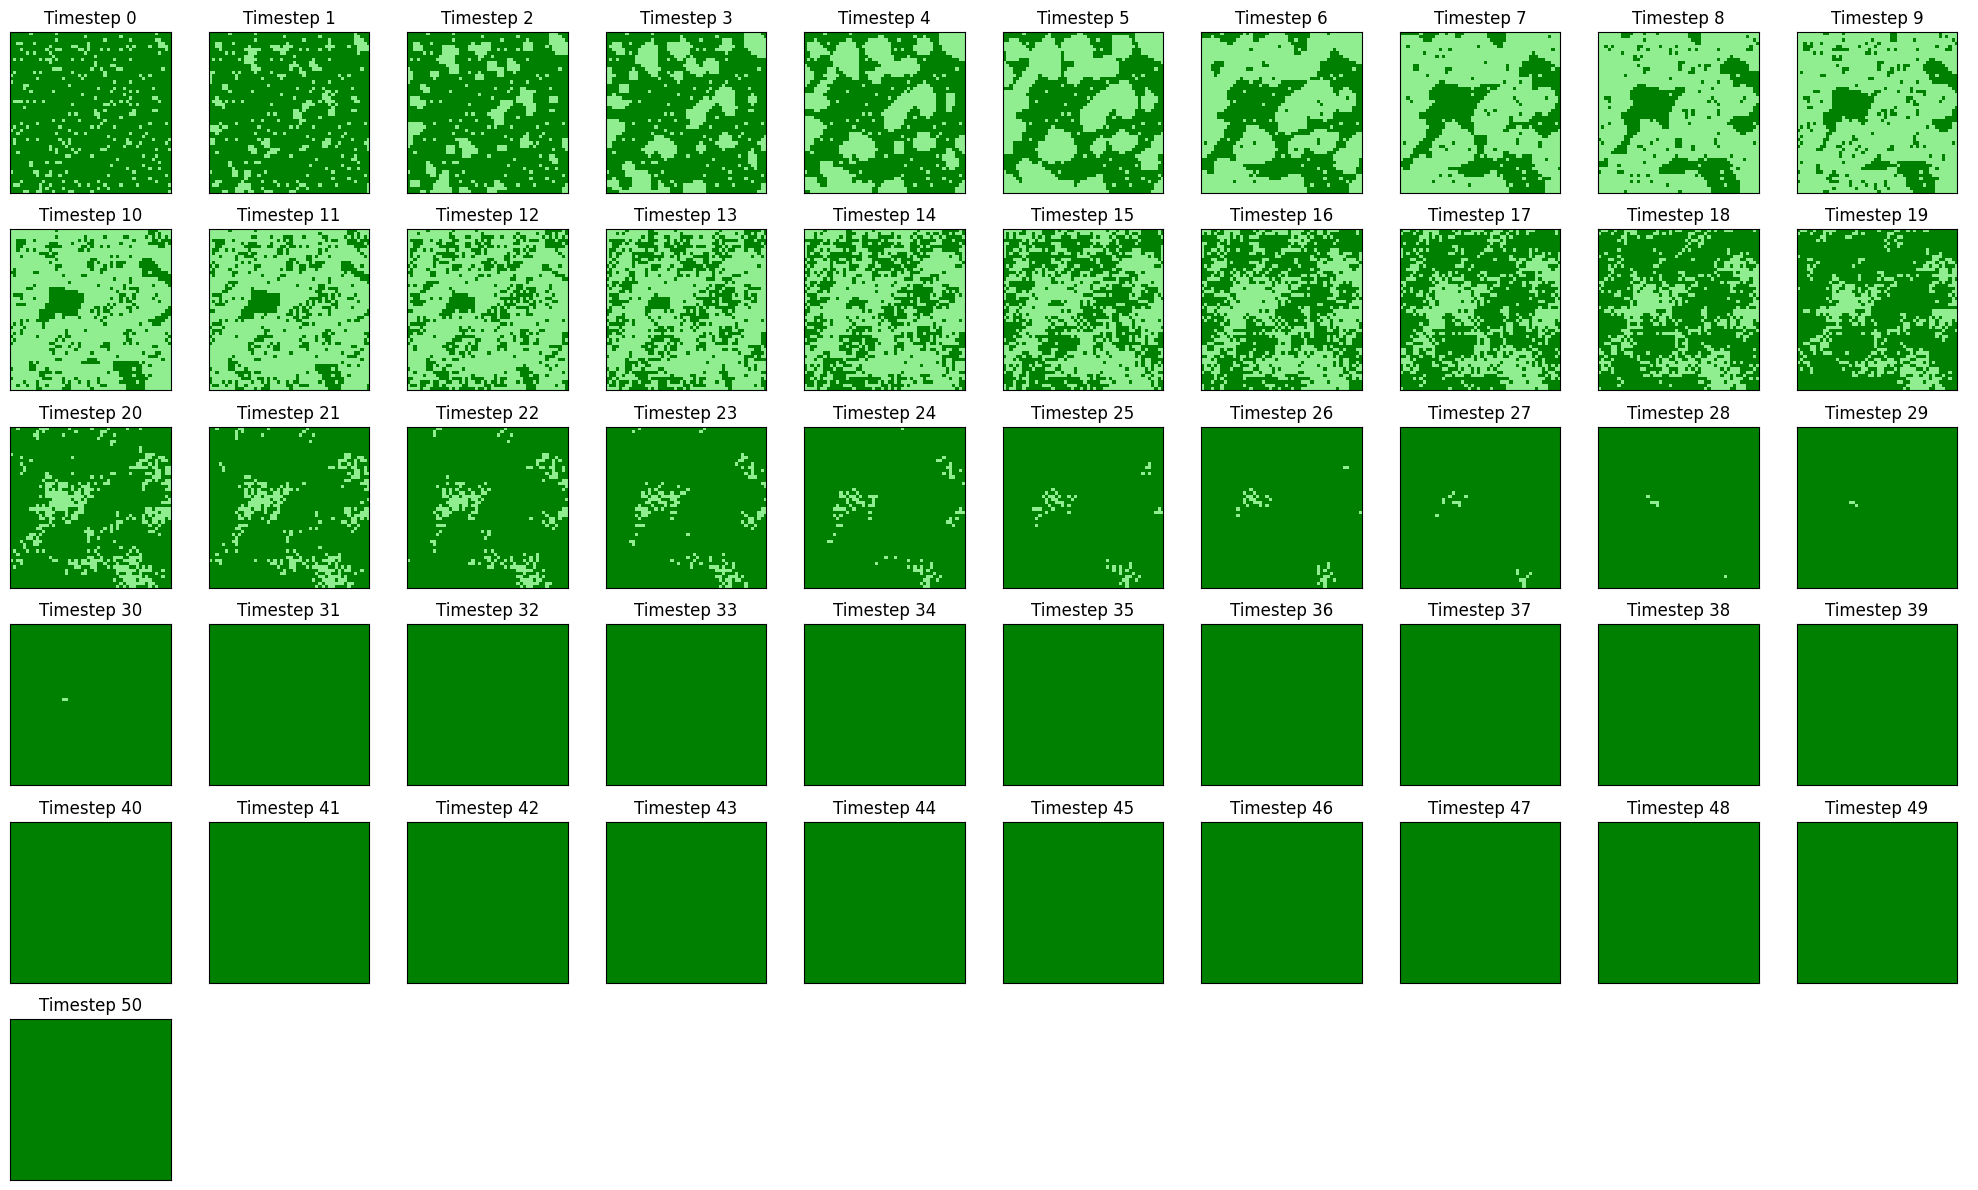

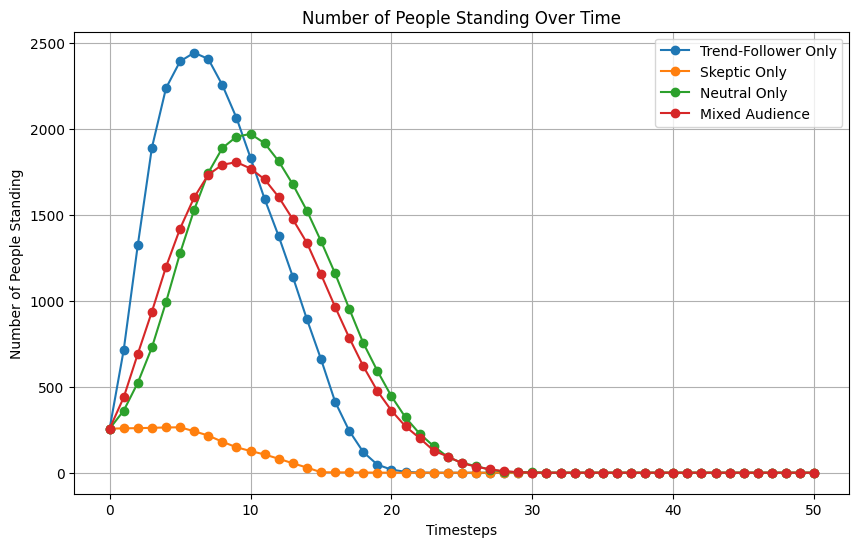

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_colormap():
    from matplotlib.colors import ListedColormap
    colors = ['blue', 'red', 'green', 'lightblue', 'pink', 'lightgreen']  # Seated/Standing for Trend-Follower, Skeptic, Neutral
    return ListedColormap(colors)

def simulate_standing_ovation(grid_size, audience_types, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality):
    grid = initial_standing.copy()
    history = [grid.copy()]
    standing_counts = [np.sum(grid)]

    # Track how long each agent has been standing
    standing_time = np.zeros((grid_size, grid_size))

    for t in range(max_iters):
        new_grid = grid.copy()
        new_standing_time = standing_time.copy()

        for x in range(grid_size):
            for y in range(grid_size):
                neighbors = grid[max(0, x-1):min(grid_size, x+2), max(0, y-1):min(grid_size, y+2)]
                neighbor_count = (neighbors.size - 1)  # Total neighbors excluding center
                neighbor_sum = np.sum(neighbors) - grid[x, y]  # Exclude center cell
                neighbor_influence = neighbor_sum / neighbor_count if neighbor_count > 0 else 0

                influence = influence_factors[audience_types[x, y]] * (neighbor_influence*2) * performance_quality

                if not grid[x, y]:  # Currently sitting
                    if influence > 0.5 and new_standing_time[x, y] == 0:  # Stand up threshold
                        new_grid[x, y] = True
                        new_standing_time[x, y] = 0
                else:  # Currently standing
                    new_standing_time[x, y] += 1

                    if new_standing_time[x, y] > sitting_tendency[x, y] / performance_quality:
                        new_grid[x, y] = False  # Sit down permanently
                        new_standing_time[x, y] = -1  # Mark as permanently seated

        grid = new_grid
        standing_time = new_standing_time
        history.append(grid.copy())
        standing_counts.append(np.sum(grid))

    return history, standing_counts

def plot_heatmaps(history, audience_types):
    colormap = get_colormap()
    steps_to_plot = len(history)
    cols = 10  # Number of columns in the plot grid
    rows = (steps_to_plot + cols - 1) // cols  # Number of rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(20, 2 * rows))
    axes = axes.flatten()

    for i, grid in enumerate(history):
        ax = axes[i]
        # Map grid and audience types to color indices
        visual_grid = np.zeros_like(grid, dtype=int)
        for x in range(grid.shape[0]):
            for y in range(grid.shape[1]):
                if grid[x, y]:
                    if audience_types[x, y] == 'trend-follower':
                        visual_grid[x, y] = 3  # Light blue
                    elif audience_types[x, y] == 'skeptic':
                        visual_grid[x, y] = 4  # Pink
                    elif audience_types[x, y] == 'neutral':
                        visual_grid[x, y] = 5  # Light green
                else:
                    if audience_types[x, y] == 'trend-follower':
                        visual_grid[x, y] = 0  # Blue
                    elif audience_types[x, y] == 'skeptic':
                        visual_grid[x, y] = 1  # Red
                    elif audience_types[x, y] == 'neutral':
                        visual_grid[x, y] = 2  # Green

        im = ax.imshow(visual_grid, cmap=colormap, vmin=0, vmax=5)
        ax.set_title(f'Timestep {i}')
        ax.set_xticks([])
        ax.set_yticks([])
        # Add solid gridlines
        ax.grid(visible=True, color="black", linestyle="-", linewidth=0.5)
        ax.set_xticks(np.arange(-0.5, grid.shape[1], 1), minor=True)
        ax.set_yticks(np.arange(-0.5, grid.shape[0], 1), minor=True)
        ax.tick_params(which="minor", length=0)

    for ax in axes[len(history):]:
        ax.axis('off')  # Turn off unused axes

    plt.tight_layout()
    plt.show()

def plot_standing_counts(standing_counts_list, labels):
    plt.figure(figsize=(10, 6))
    for counts, label in zip(standing_counts_list, labels):
        plt.plot(counts, marker='o', linestyle='-', label=label)
    plt.title('Number of People Standing Over Time')
    plt.xlabel('Timesteps')
    plt.ylabel('Number of People Standing')
    plt.legend()
    plt.grid(True)
    plt.show()

# Simulation for mixed personalities
grid_size = 50
max_iters = 50
initial_standing = np.random.choice([True, False], size=(grid_size, grid_size), p=[0.1, 0.9])
sitting_tendency = np.random.uniform(5, 15, size=(grid_size, grid_size))  # Random sitting tendencies
performance_quality = 1 # average performance

# Mixed audience types
audience_types_mixed = np.random.choice(['trend-follower', 'skeptic', 'neutral'], size=(grid_size, grid_size), p=[0.3, 0.3, 0.4])
audience_types_trend = np.full((grid_size, grid_size), 'trend-follower')
audience_types_skeptic = np.full((grid_size, grid_size), 'skeptic')
audience_types_neutral = np.full((grid_size, grid_size), 'neutral')

influence_factors = {
    'trend-follower': 1.5,
    'skeptic': 0.5,
    'neutral': 1.0
}

# Run simulations
history_mixed, standing_counts_mixed = simulate_standing_ovation(
    grid_size, audience_types_mixed, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_trend, standing_counts_trend = simulate_standing_ovation(
    grid_size, audience_types_trend, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_skeptic, standing_counts_skeptic = simulate_standing_ovation(
    grid_size, audience_types_skeptic, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_neutral, standing_counts_neutral = simulate_standing_ovation(
    grid_size, audience_types_neutral, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

# Plot results for mixed audience
print("\nSimulation for Mixed Personalities:")
plot_heatmaps(history_mixed, audience_types_mixed)
plot_heatmaps(history_trend, audience_types_trend)
plot_heatmaps(history_skeptic, audience_types_skeptic)
plot_heatmaps(history_neutral, audience_types_neutral)

# Plot standing counts comparison
plot_standing_counts(
    [standing_counts_trend, standing_counts_skeptic, standing_counts_neutral, standing_counts_mixed],
    ['Trend-Follower Only', 'Skeptic Only', 'Neutral Only', 'Mixed Audience']
)

data = {
    "Timestep": list(range(max_iters + 1)),
    "Trend-Follower Only": standing_counts_trend,
    "Skeptic Only": standing_counts_skeptic,
    "Neutral Only": standing_counts_neutral,
    "Mixed Audience": standing_counts_mixed
}
df = pd.DataFrame(data)

# Save the results to a CSV file
csv_path = "standing_ovation_results_average_performance.csv"
df.to_csv(csv_path, index=False)


##### Discussion: The Skeptic Audience were in someway foolish even though the performance was quite average, none quite followed up standing from the initial standing, those who stood slowly sat down 

High Performance


Simulation for Mixed Personalities:


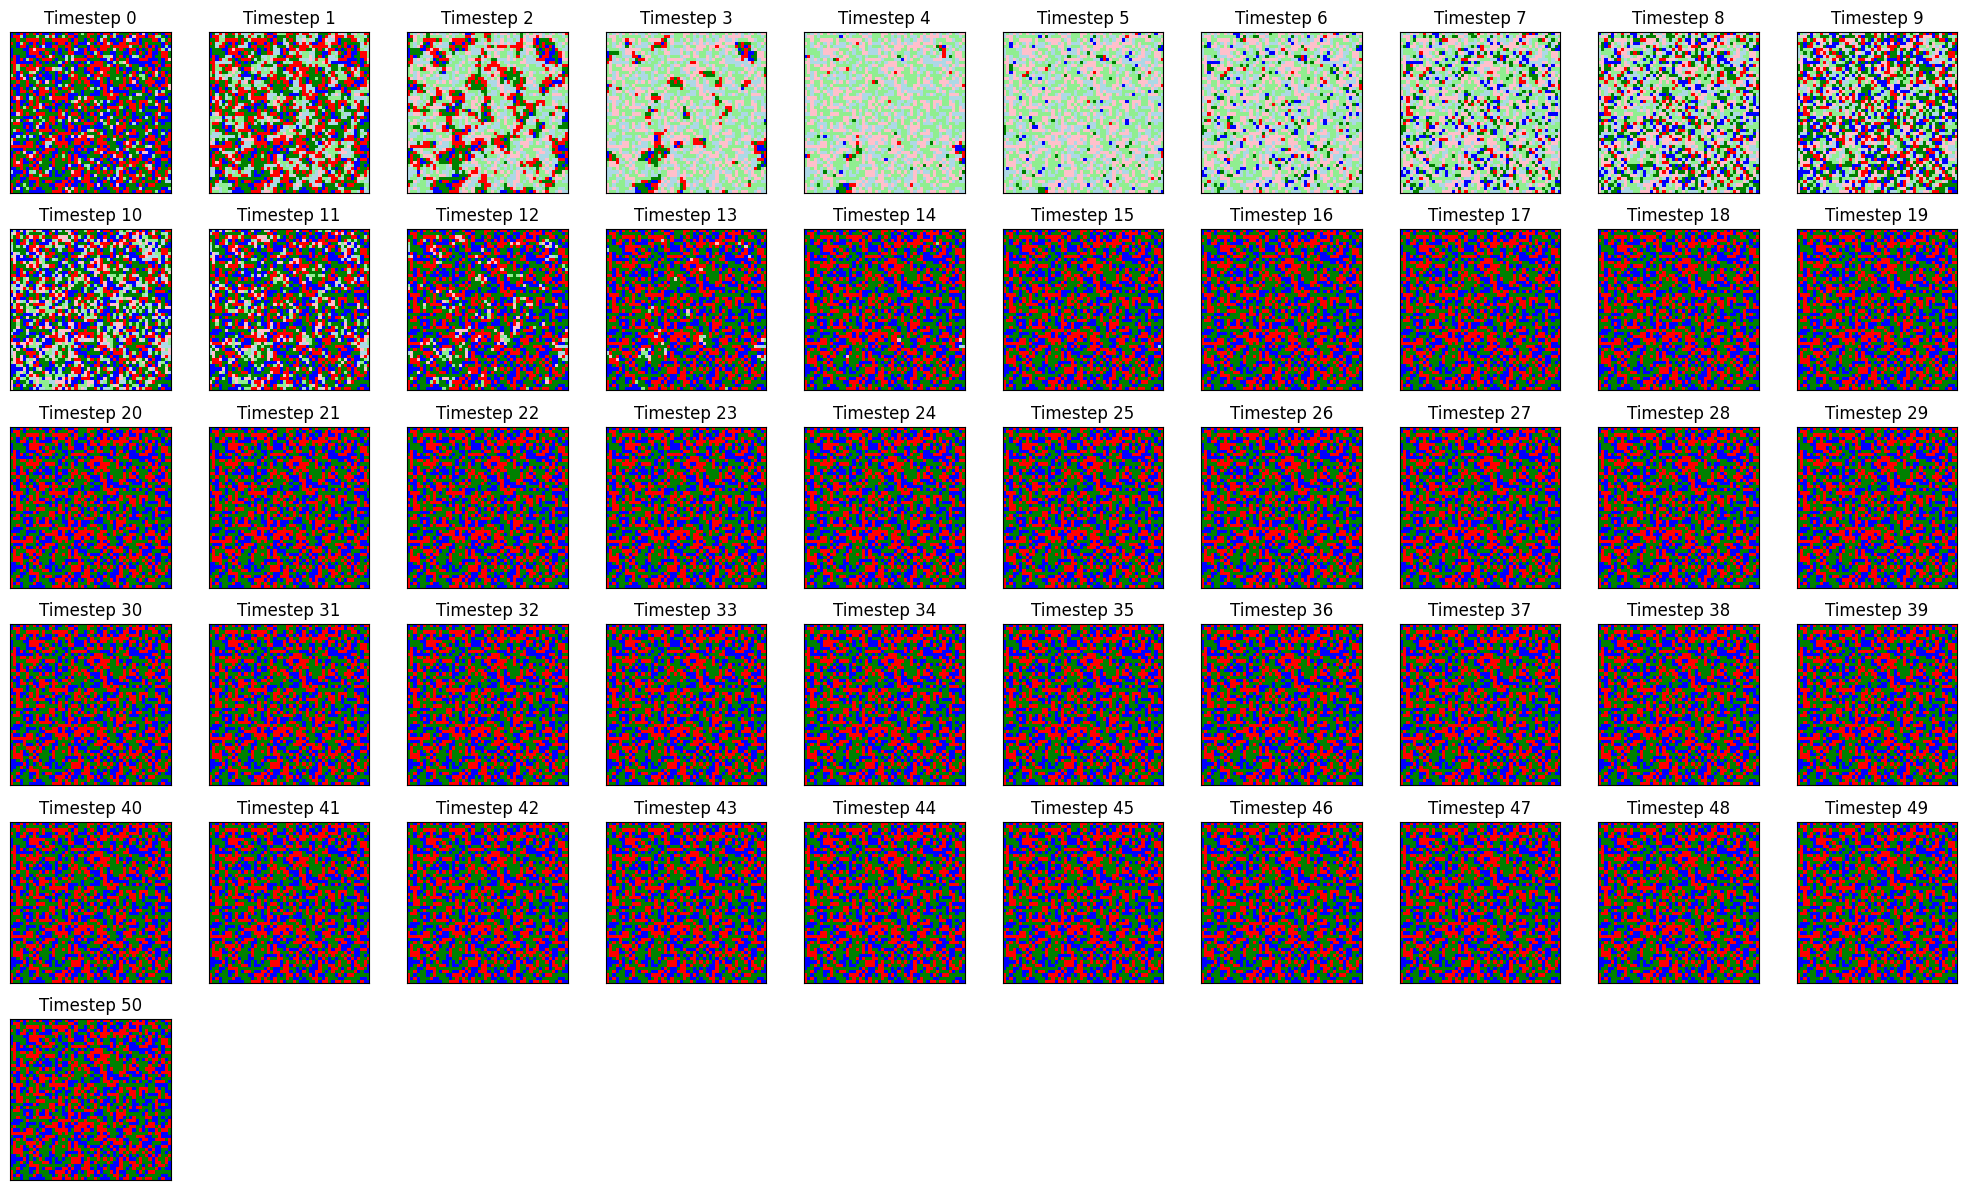

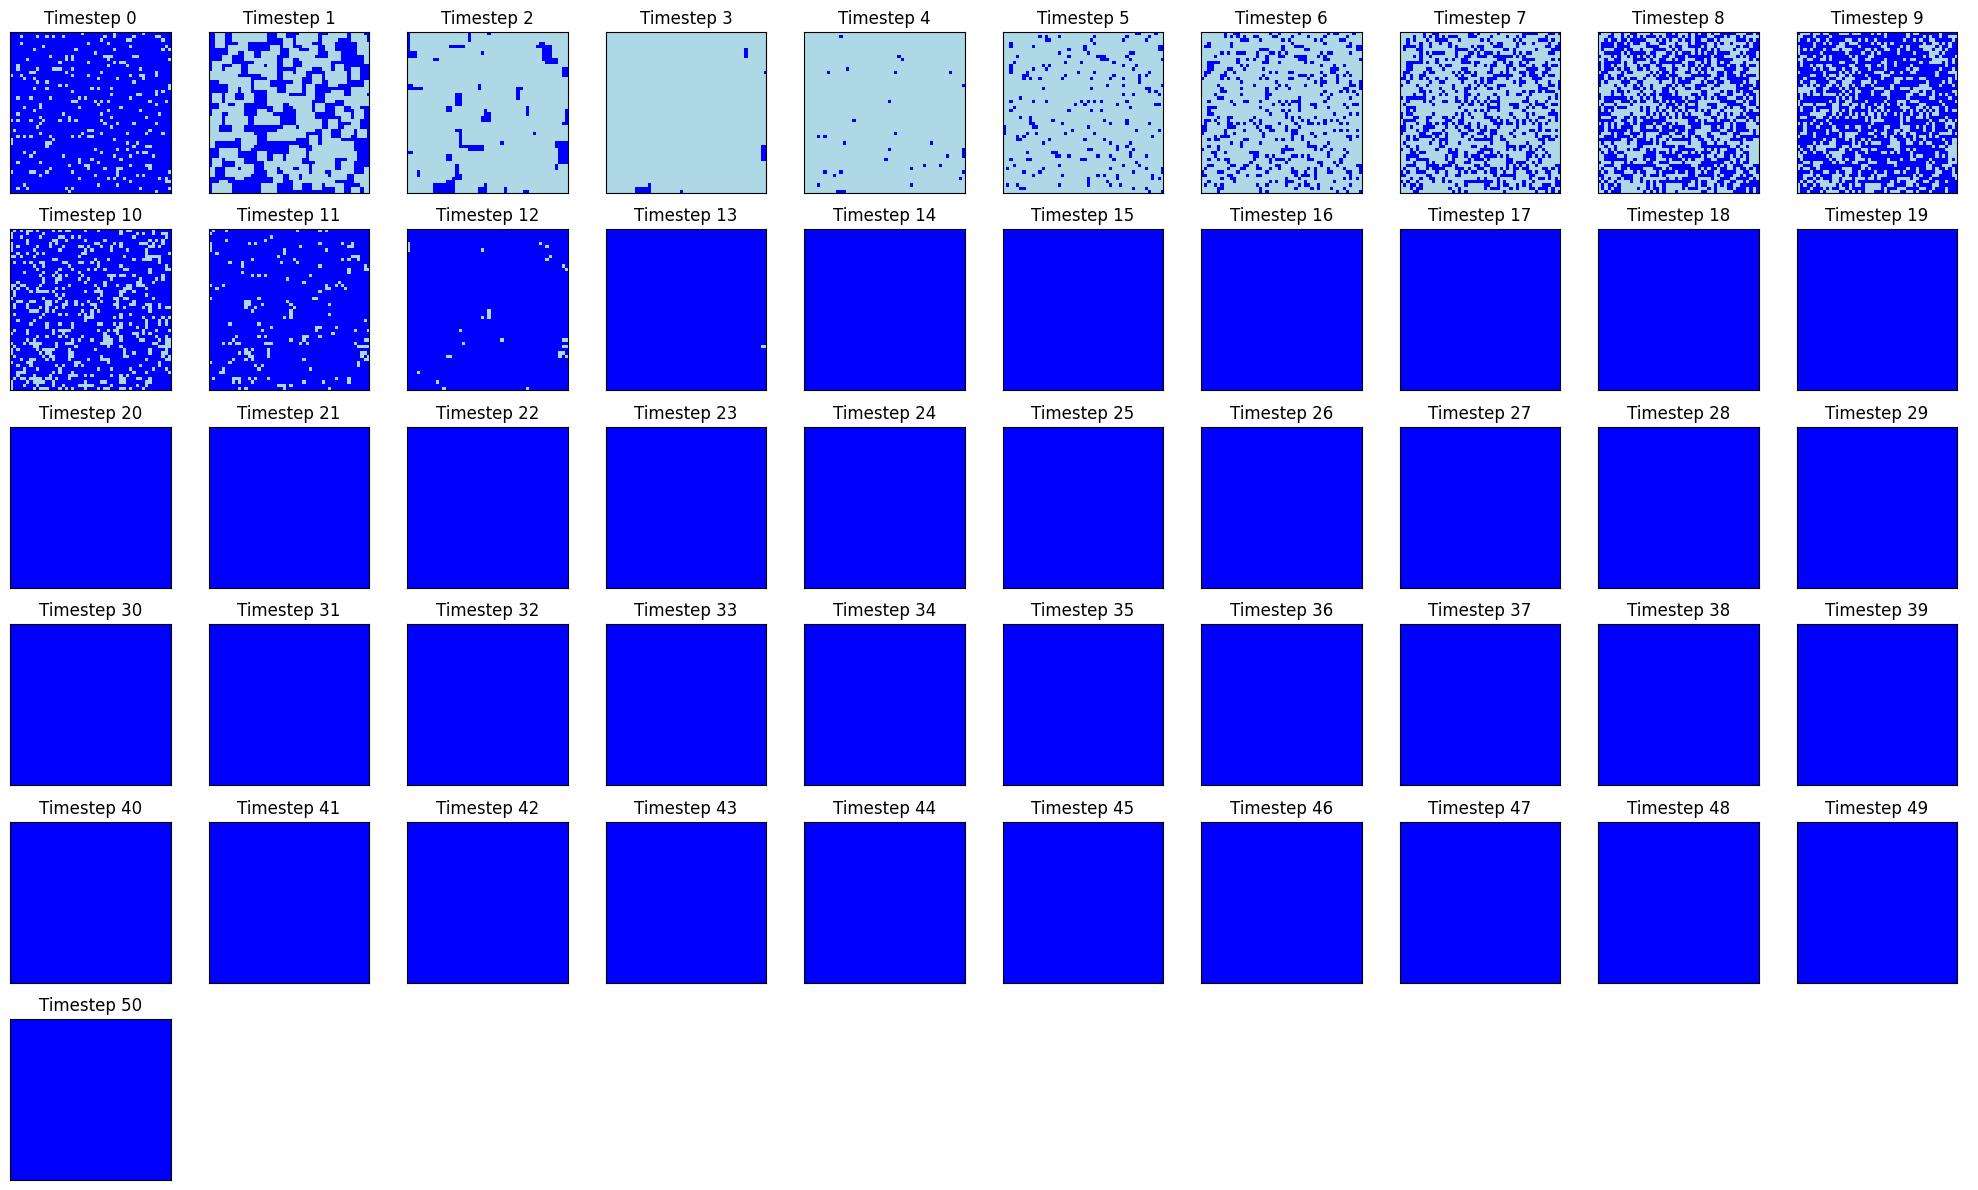

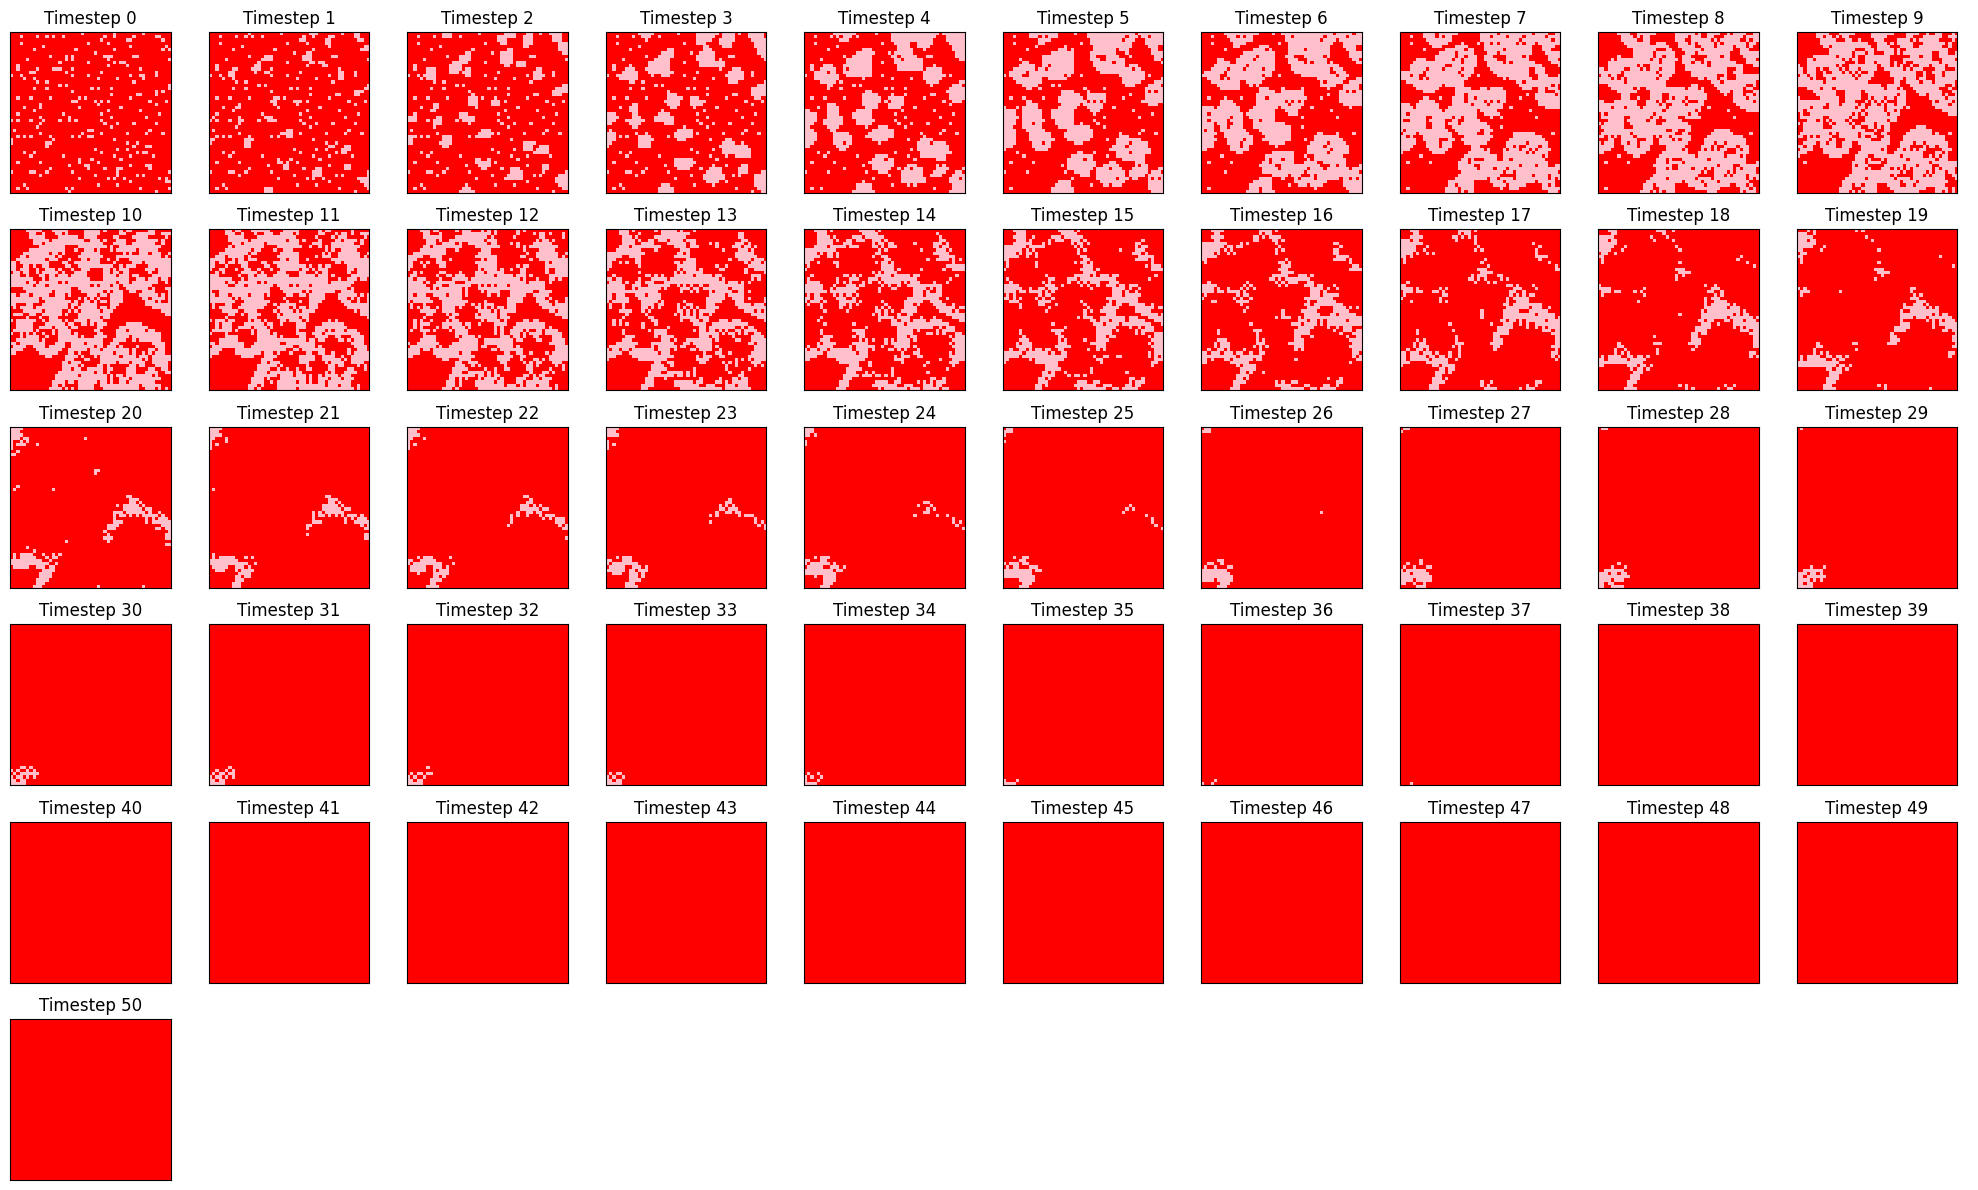

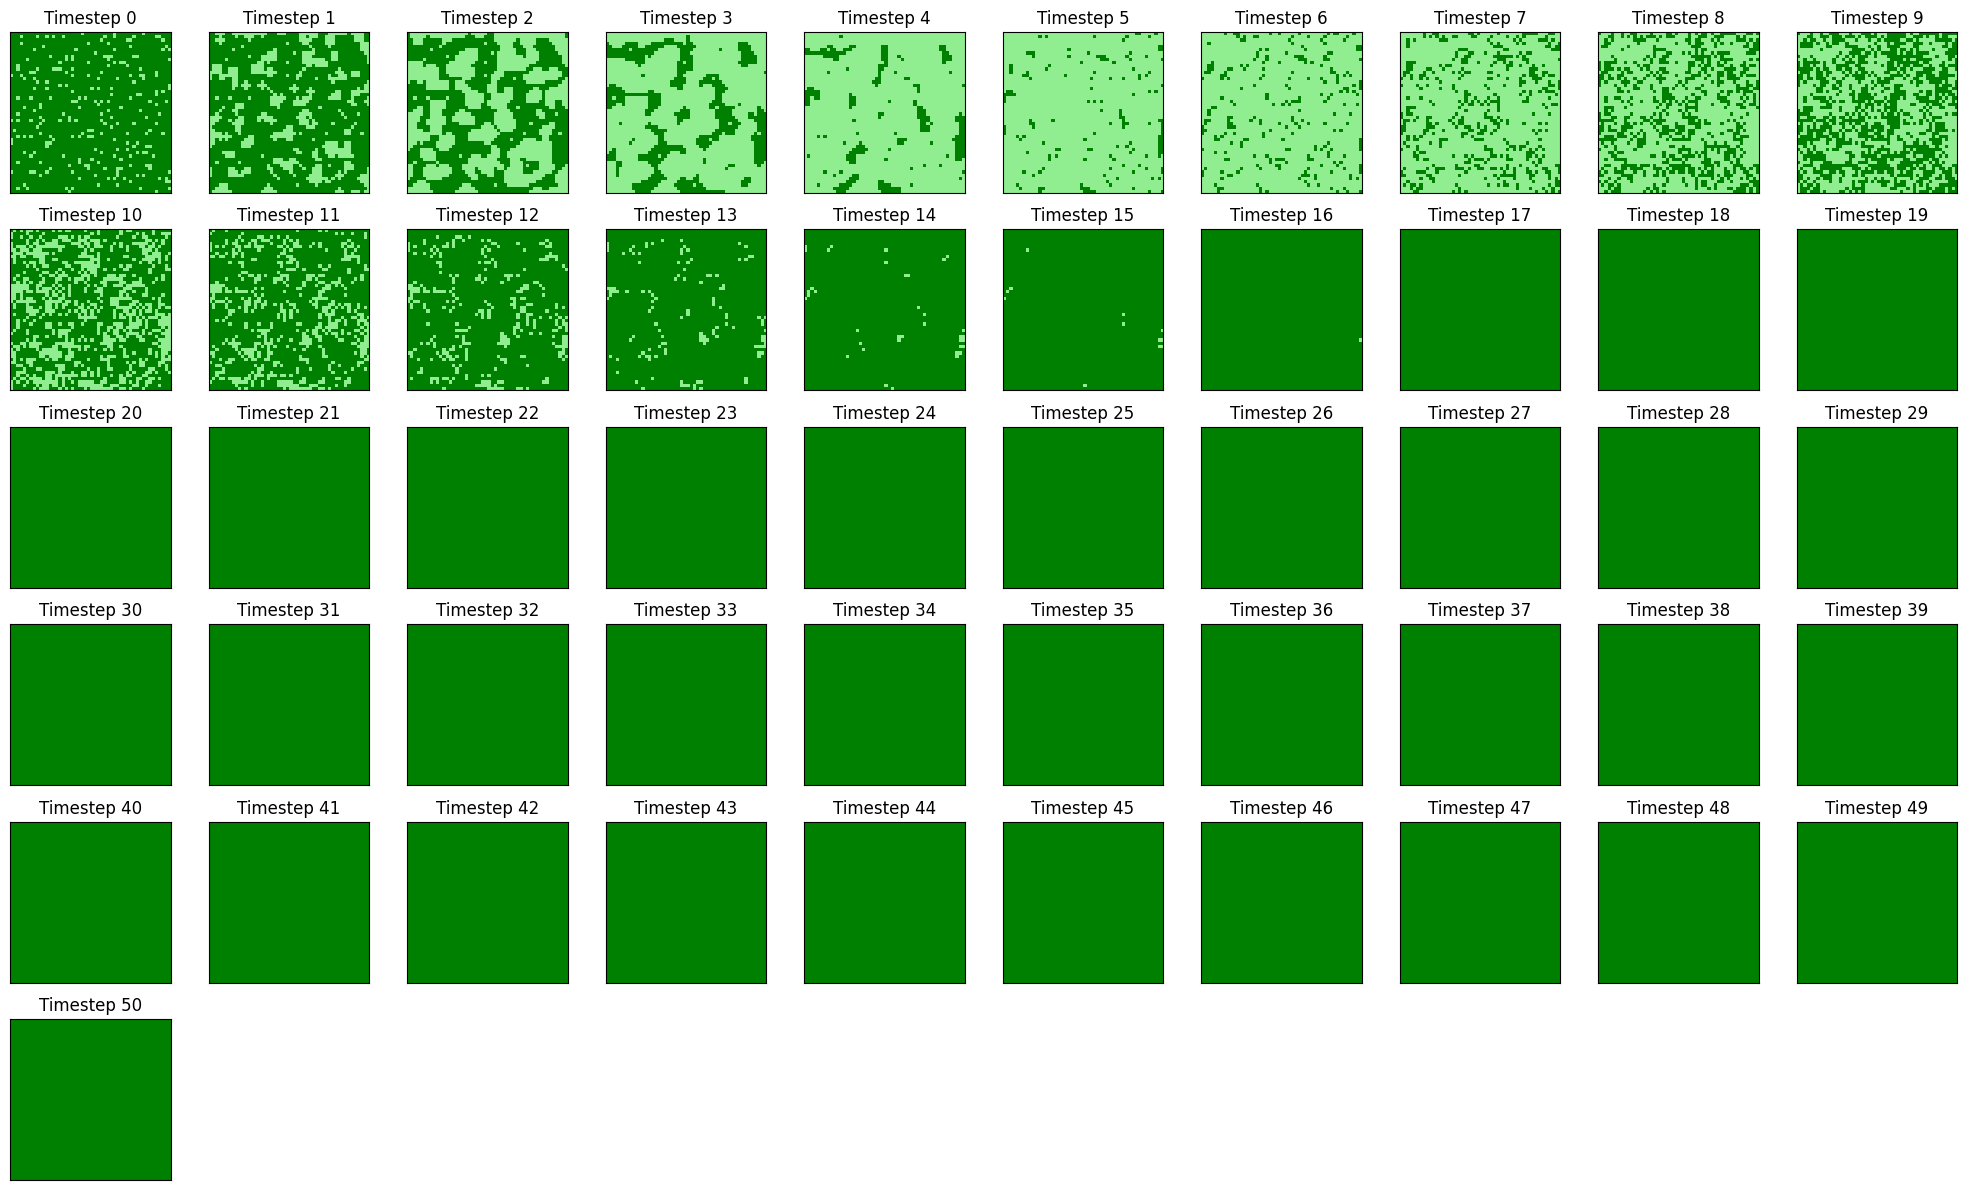

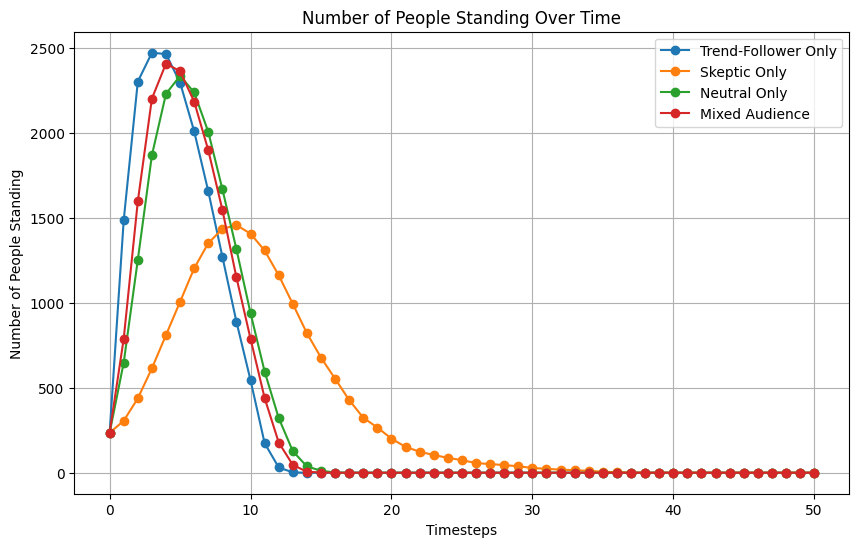

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_colormap():
    from matplotlib.colors import ListedColormap
    colors = ['blue', 'red', 'green', 'lightblue', 'pink', 'lightgreen']  # Seated/Standing for Trend-Follower, Skeptic, Neutral
    return ListedColormap(colors)

def simulate_standing_ovation(grid_size, audience_types, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality):
    grid = initial_standing.copy()
    history = [grid.copy()]
    standing_counts = [np.sum(grid)]

    # Track how long each agent has been standing
    standing_time = np.zeros((grid_size, grid_size))

    for t in range(max_iters):
        new_grid = grid.copy()
        new_standing_time = standing_time.copy()

        for x in range(grid_size):
            for y in range(grid_size):
                neighbors = grid[max(0, x-1):min(grid_size, x+2), max(0, y-1):min(grid_size, y+2)]
                neighbor_count = (neighbors.size - 1)  # Total neighbors excluding center
                neighbor_sum = np.sum(neighbors) - grid[x, y]  # Exclude center cell
                neighbor_influence = neighbor_sum / neighbor_count if neighbor_count > 0 else 0

                influence = influence_factors[audience_types[x, y]] * (neighbor_influence*2) * performance_quality

                if not grid[x, y]:  # Currently sitting
                    if influence > 0.5 and new_standing_time[x, y] == 0:  # Stand up threshold
                        new_grid[x, y] = True
                        new_standing_time[x, y] = 0
                else:  # Currently standing
                    new_standing_time[x, y] += 1

                    if new_standing_time[x, y] > sitting_tendency[x, y] / performance_quality:
                        new_grid[x, y] = False  # Sit down permanently
                        new_standing_time[x, y] = -1  # Mark as permanently seated

        grid = new_grid
        standing_time = new_standing_time
        history.append(grid.copy())
        standing_counts.append(np.sum(grid))

    return history, standing_counts

def plot_heatmaps(history, audience_types):
    colormap = get_colormap()
    steps_to_plot = len(history)
    cols = 10  # Number of columns in the plot grid
    rows = (steps_to_plot + cols - 1) // cols  # Number of rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(20, 2 * rows))
    axes = axes.flatten()

    for i, grid in enumerate(history):
        ax = axes[i]
        # Map grid and audience types to color indices
        visual_grid = np.zeros_like(grid, dtype=int)
        for x in range(grid.shape[0]):
            for y in range(grid.shape[1]):
                if grid[x, y]:
                    if audience_types[x, y] == 'trend-follower':
                        visual_grid[x, y] = 3  # Light blue
                    elif audience_types[x, y] == 'skeptic':
                        visual_grid[x, y] = 4  # Pink
                    elif audience_types[x, y] == 'neutral':
                        visual_grid[x, y] = 5  # Light green
                else:
                    if audience_types[x, y] == 'trend-follower':
                        visual_grid[x, y] = 0  # Blue
                    elif audience_types[x, y] == 'skeptic':
                        visual_grid[x, y] = 1  # Red
                    elif audience_types[x, y] == 'neutral':
                        visual_grid[x, y] = 2  # Green

        im = ax.imshow(visual_grid, cmap=colormap, vmin=0, vmax=5)
        ax.set_title(f'Timestep {i}')
        ax.set_xticks([])
        ax.set_yticks([])
        # Add solid gridlines
        ax.grid(visible=True, color="black", linestyle="-", linewidth=0.5)
        ax.set_xticks(np.arange(-0.5, grid.shape[1], 1), minor=True)
        ax.set_yticks(np.arange(-0.5, grid.shape[0], 1), minor=True)
        ax.tick_params(which="minor", length=0)

    for ax in axes[len(history):]:
        ax.axis('off')  # Turn off unused axes

    plt.tight_layout()
    plt.show()

def plot_standing_counts(standing_counts_list, labels):
    plt.figure(figsize=(10, 6))
    for counts, label in zip(standing_counts_list, labels):
        plt.plot(counts, marker='o', linestyle='-', label=label)
    plt.title('Number of People Standing Over Time')
    plt.xlabel('Timesteps')
    plt.ylabel('Number of People Standing')
    plt.legend()
    plt.grid(True)
    plt.show()

# Simulation for mixed personalities
grid_size = 50
max_iters = 50
initial_standing = np.random.choice([True, False], size=(grid_size, grid_size), p=[0.1, 0.9])
sitting_tendency = np.random.uniform(5, 15, size=(grid_size, grid_size))  # Random sitting tendencies
performance_quality = 1.5 # high performance

# Mixed audience types
audience_types_mixed = np.random.choice(['trend-follower', 'skeptic', 'neutral'], size=(grid_size, grid_size), p=[0.3, 0.3, 0.4])
audience_types_trend = np.full((grid_size, grid_size), 'trend-follower')
audience_types_skeptic = np.full((grid_size, grid_size), 'skeptic')
audience_types_neutral = np.full((grid_size, grid_size), 'neutral')

influence_factors = {
    'trend-follower': 1.5,
    'skeptic': 0.5,
    'neutral': 1.0
}

# Run simulations
history_mixed, standing_counts_mixed = simulate_standing_ovation(
    grid_size, audience_types_mixed, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_trend, standing_counts_trend = simulate_standing_ovation(
    grid_size, audience_types_trend, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_skeptic, standing_counts_skeptic = simulate_standing_ovation(
    grid_size, audience_types_skeptic, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_neutral, standing_counts_neutral = simulate_standing_ovation(
    grid_size, audience_types_neutral, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

# Plot results for mixed audience
print("\nSimulation for Mixed Personalities:")
plot_heatmaps(history_mixed, audience_types_mixed)
plot_heatmaps(history_trend, audience_types_trend)
plot_heatmaps(history_skeptic, audience_types_skeptic)
plot_heatmaps(history_neutral, audience_types_neutral)

# Plot standing counts comparison
plot_standing_counts(
    [standing_counts_trend, standing_counts_skeptic, standing_counts_neutral, standing_counts_mixed],
    ['Trend-Follower Only', 'Skeptic Only', 'Neutral Only', 'Mixed Audience']
)

data = {
    "Timestep": list(range(max_iters + 1)),
    "Trend-Follower Only": standing_counts_trend,
    "Skeptic Only": standing_counts_skeptic,
    "Neutral Only": standing_counts_neutral,
    "Mixed Audience": standing_counts_mixed
}
df = pd.DataFrame(data)

# Save the results to a CSV file
csv_path = "standing_ovation_results_high_performance.csv"
df.to_csv(csv_path, index=False)


##### Discussion: This quite as expected, high performance, many stood up from the start, the skeptic audience only rose around half with the other group audiences

#### FRONTAL VISION CONE ONLY

Low Performance


Simulation for Mixed Personalities:


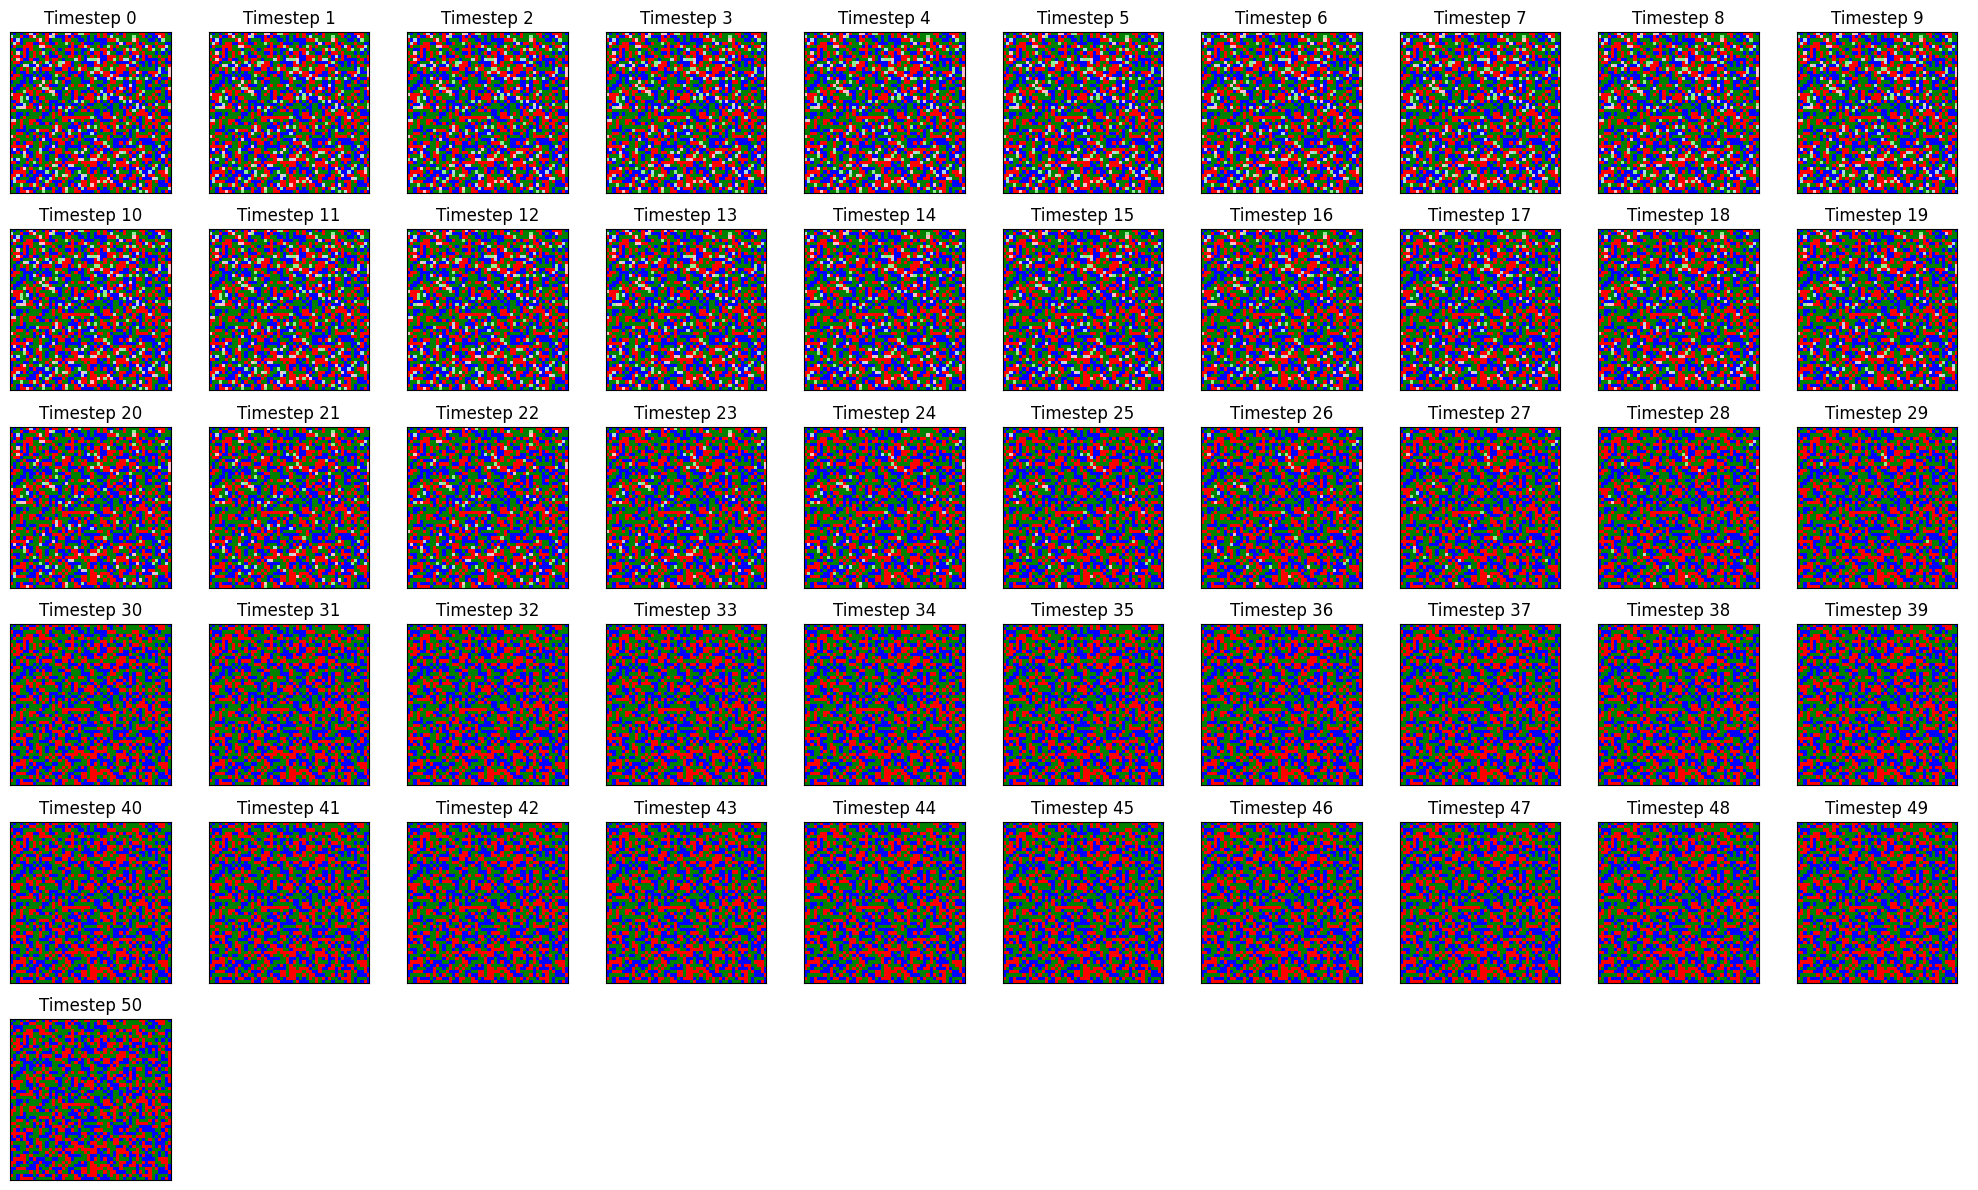

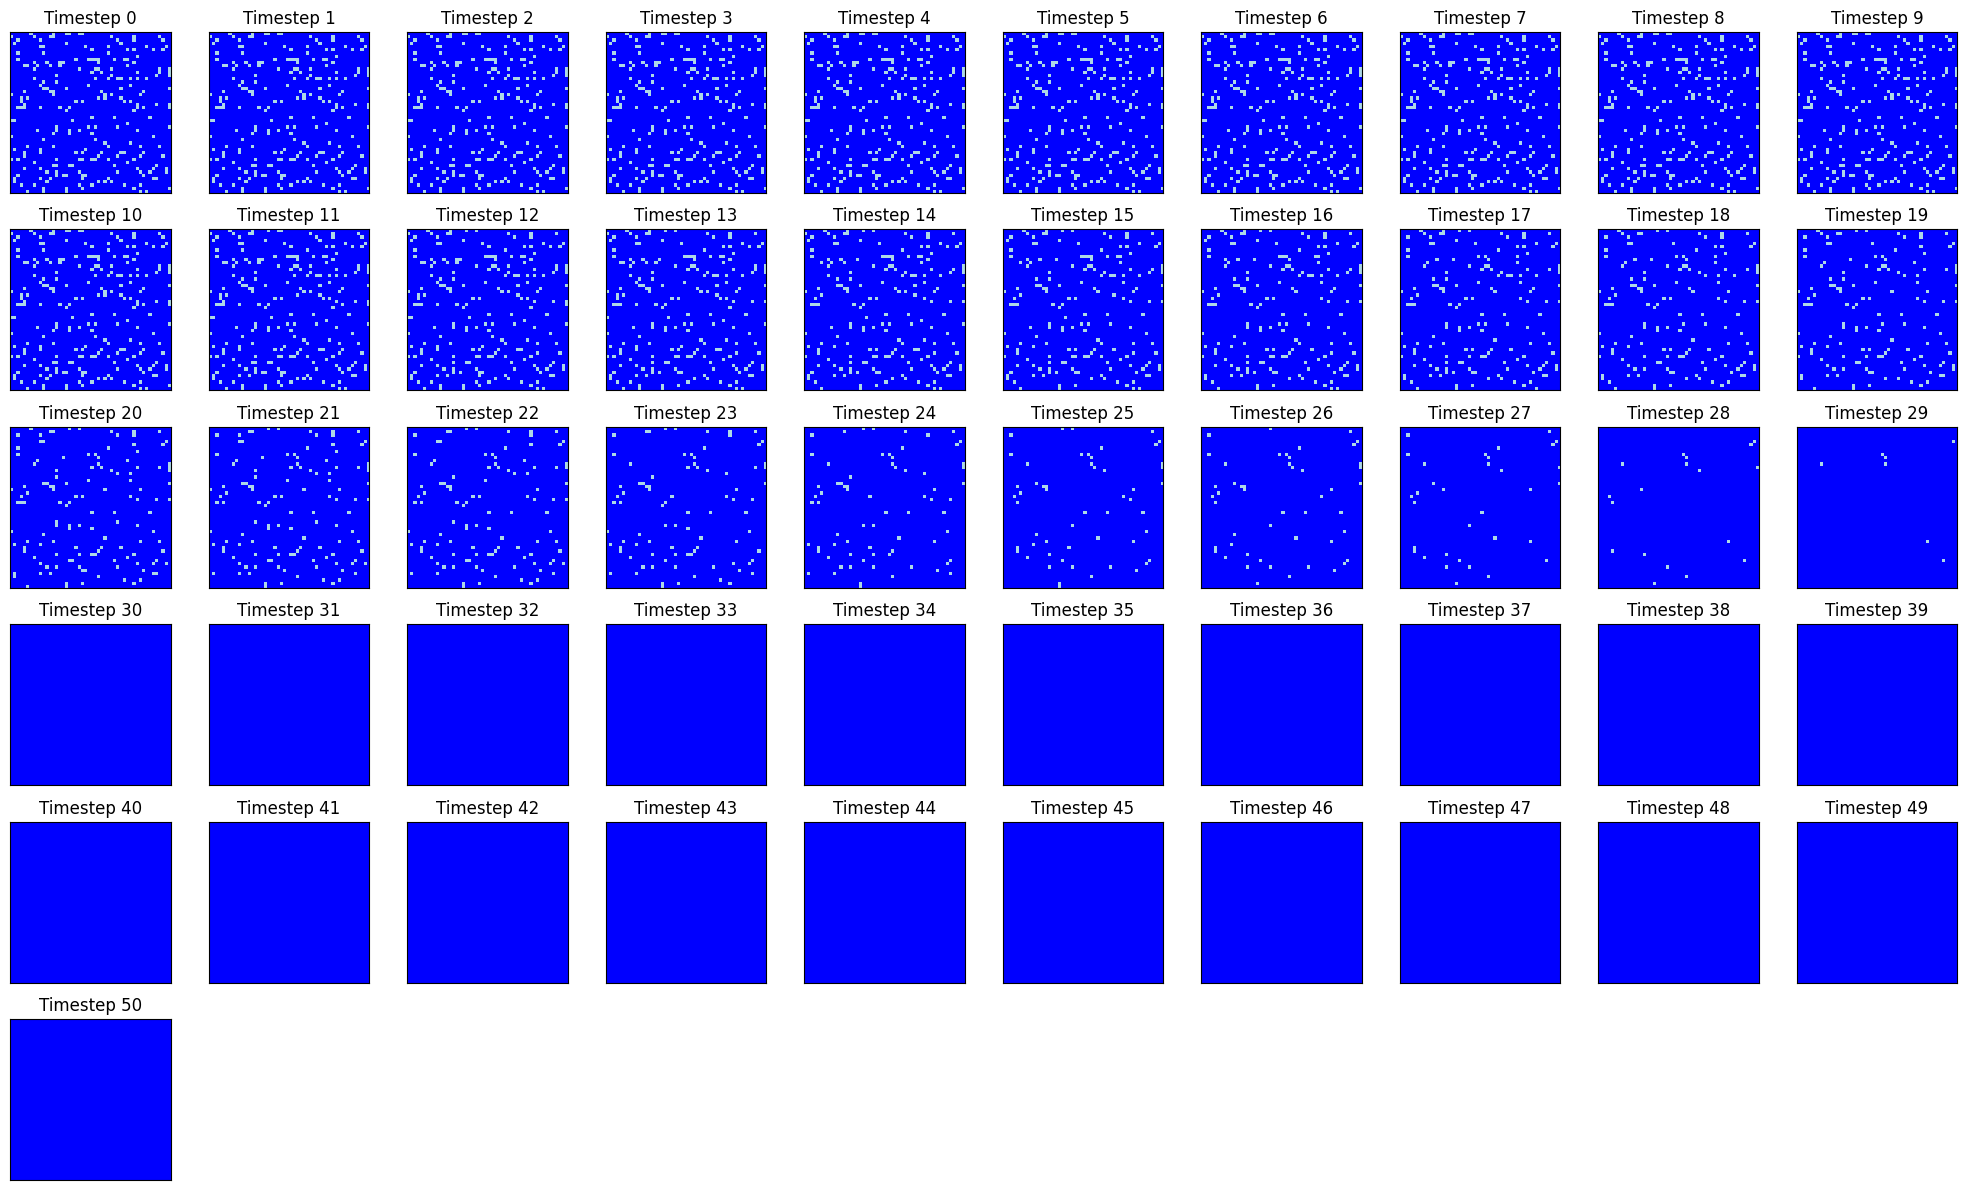

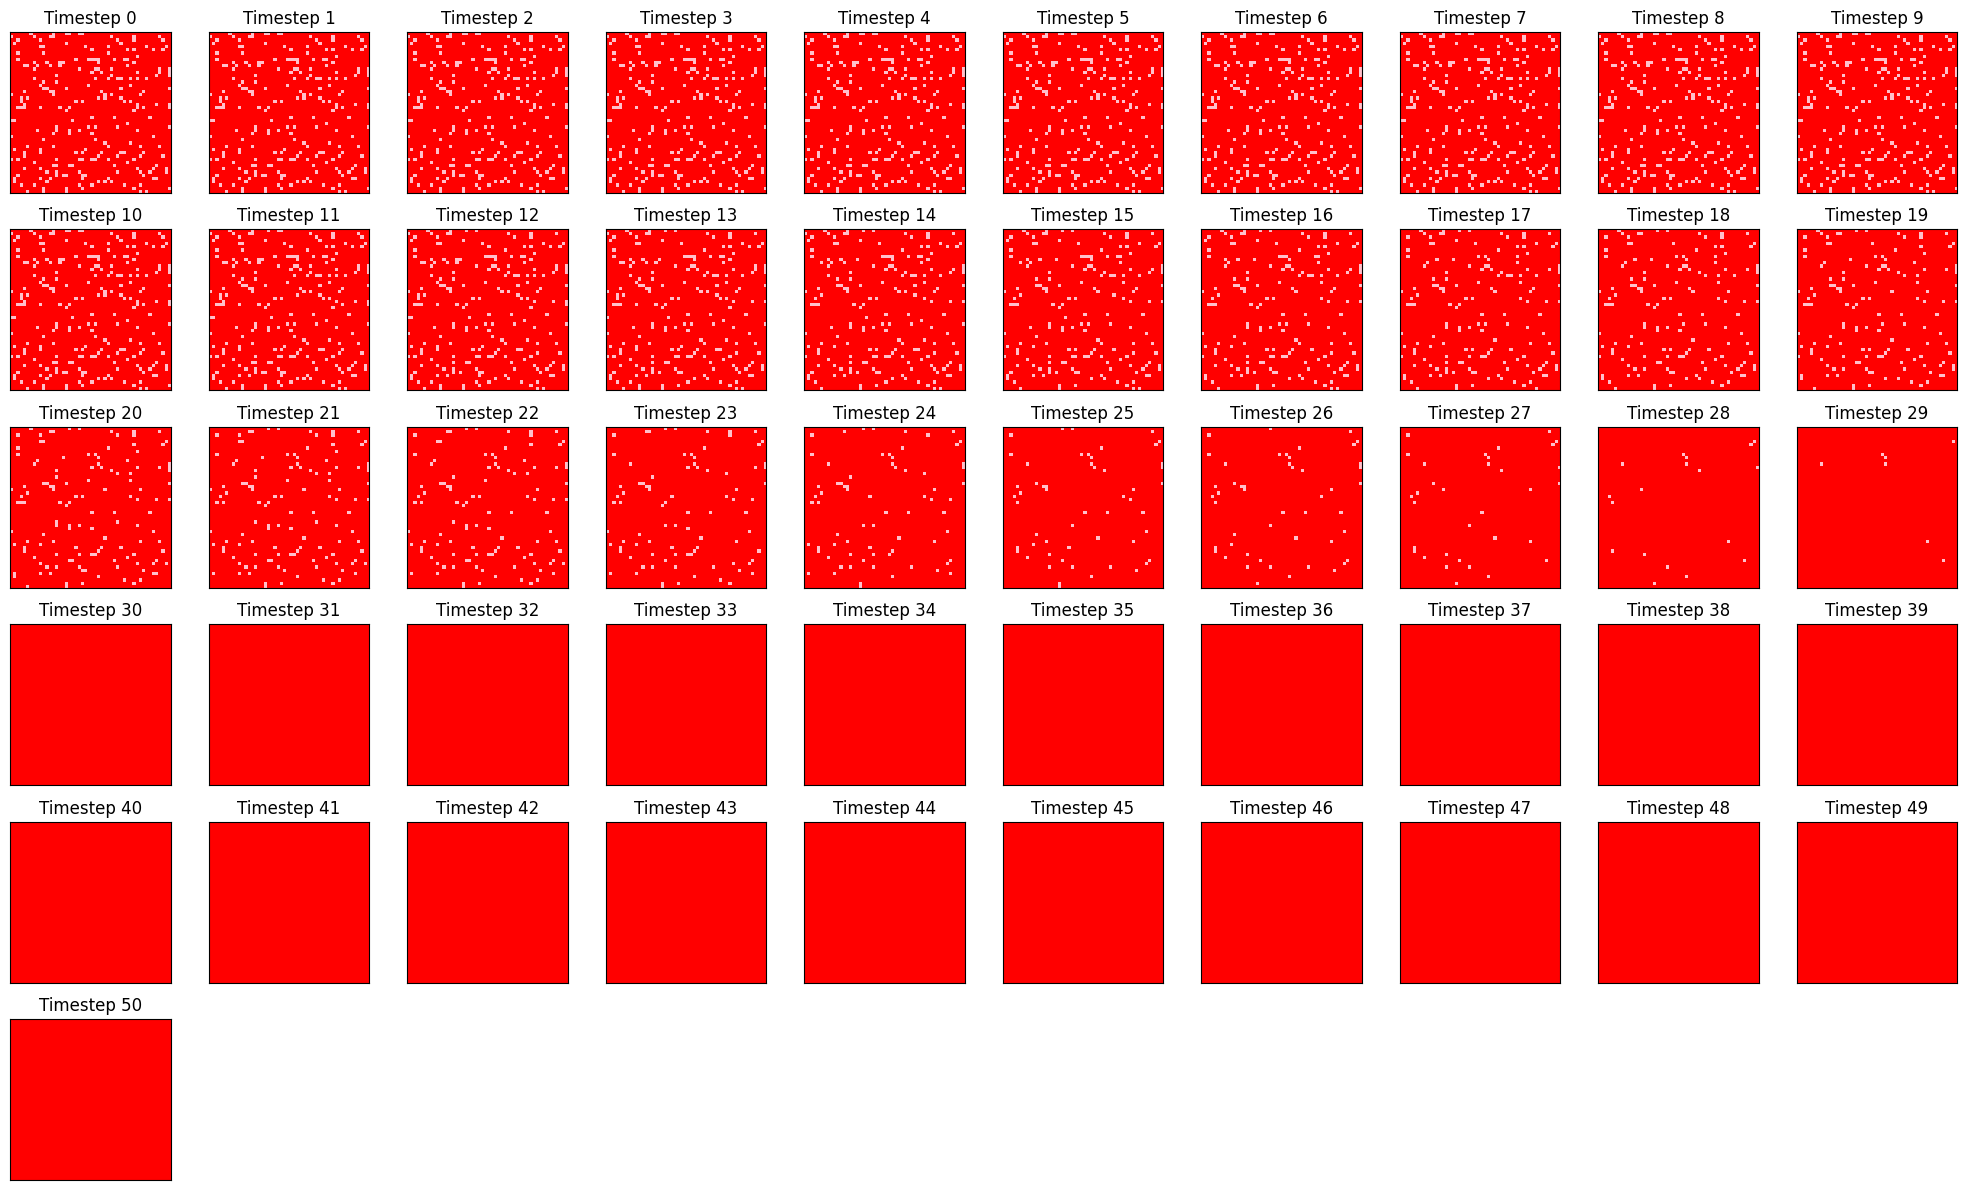

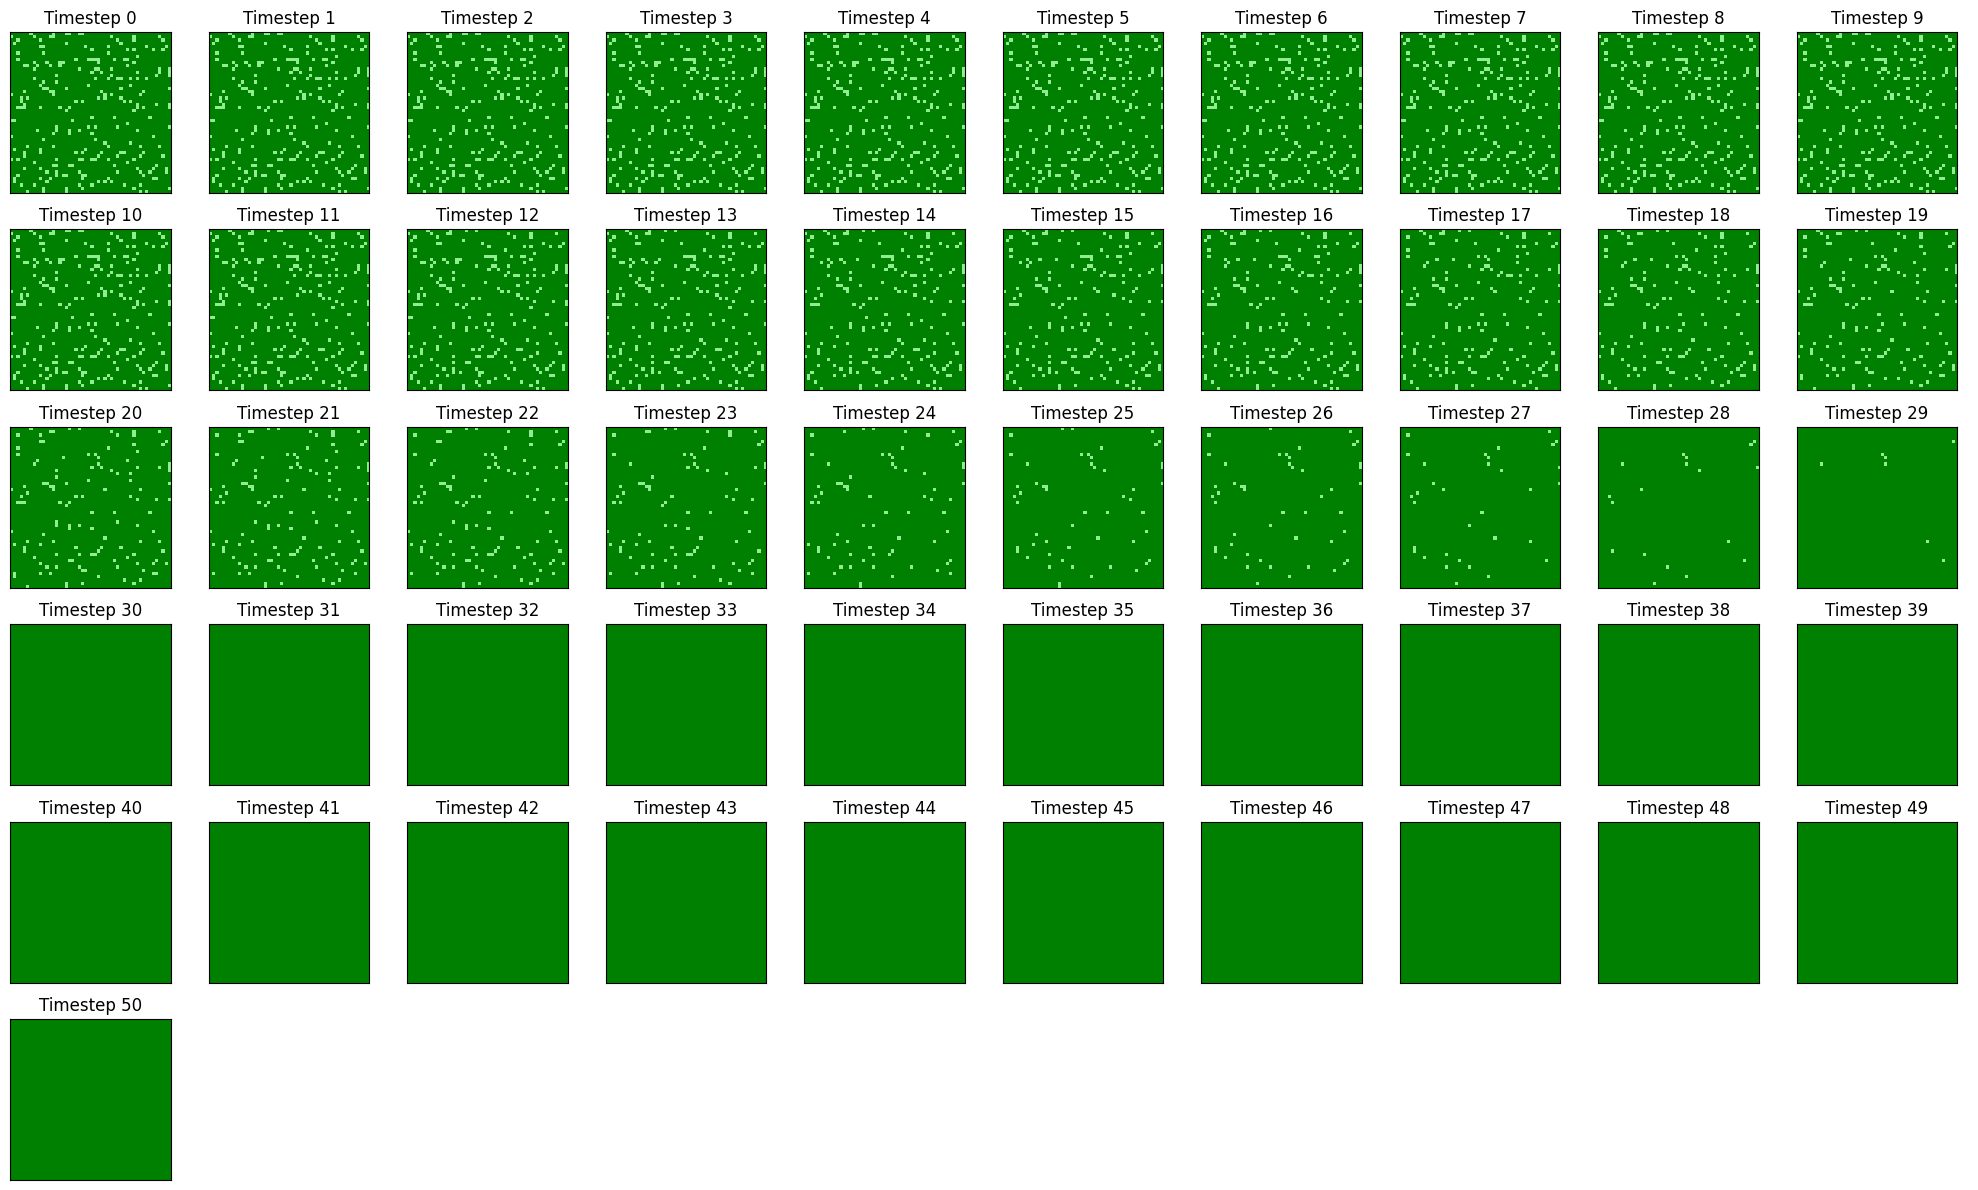

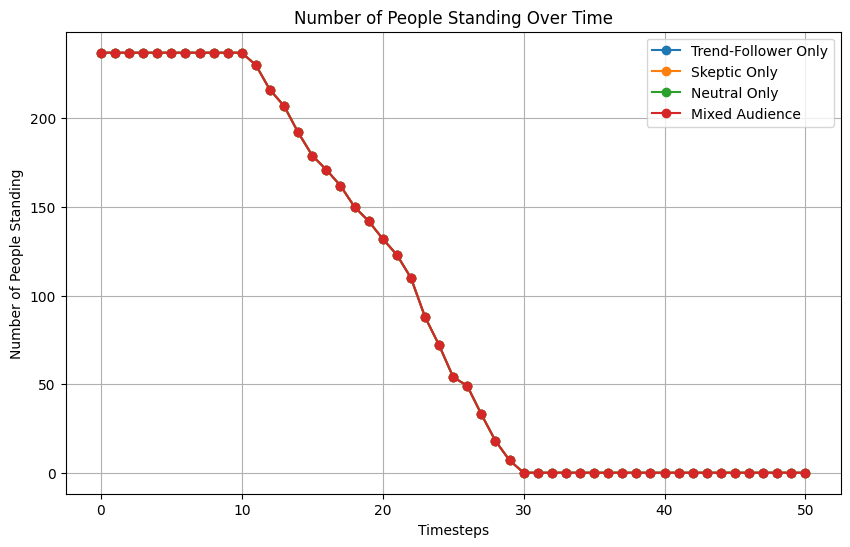

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_colormap():
    from matplotlib.colors import ListedColormap
    colors = ['blue', 'red', 'green', 'lightblue', 'pink', 'lightgreen']  # Seated/Standing for Trend-Follower, Skeptic, Neutral
    return ListedColormap(colors)

def simulate_standing_ovation(grid_size, audience_types, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality):
    grid = initial_standing.copy()
    history = [grid.copy()]
    standing_counts = [np.sum(grid)]

    # Track how long each agent has been standing
    standing_time = np.zeros((grid_size, grid_size))

    for t in range(max_iters):
        new_grid = grid.copy()
        new_standing_time = standing_time.copy()

        for x in range(grid_size):
            for y in range(grid_size):

                visible = [
                    grid[i, j]
                    for i in range(max(0, x-6))
                    for j in range(max(0, y-abs(x-i)), min(grid_size, y+abs(x-i)+1))
                    if (i, j) != (x, y)
                ]
                visible_influence = np.mean(visible) if visible else 0

                influence = influence_factors[audience_types[x, y]] * (visible_influence*2) * performance_quality

                if not grid[x, y]:  # Currently sitting
                    if influence > 0.5 and new_standing_time[x, y] == 0:  # Stand up threshold
                        new_grid[x, y] = True
                        new_standing_time[x, y] = 0
                else:  # Currently standing
                    new_standing_time[x, y] += 1

                    if new_standing_time[x, y] > sitting_tendency[x, y] / performance_quality:
                        new_grid[x, y] = False  # Sit down permanently
                        new_standing_time[x, y] = -1  # Mark as permanently seated

        grid = new_grid
        standing_time = new_standing_time
        history.append(grid.copy())
        standing_counts.append(np.sum(grid))

    return history, standing_counts

def plot_heatmaps(history, audience_types):
    colormap = get_colormap()
    steps_to_plot = len(history)
    cols = 10  # Number of columns in the plot grid
    rows = (steps_to_plot + cols - 1) // cols  # Number of rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(20, 2 * rows))
    axes = axes.flatten()

    for i, grid in enumerate(history):
        ax = axes[i]
        # Map grid and audience types to color indices
        visual_grid = np.zeros_like(grid, dtype=int)
        for x in range(grid.shape[0]):
            for y in range(grid.shape[1]):
                if grid[x, y]:
                    if audience_types[x, y] == 'trend-follower':
                        visual_grid[x, y] = 3  # Light blue
                    elif audience_types[x, y] == 'skeptic':
                        visual_grid[x, y] = 4  # Pink
                    elif audience_types[x, y] == 'neutral':
                        visual_grid[x, y] = 5  # Light green
                else:
                    if audience_types[x, y] == 'trend-follower':
                        visual_grid[x, y] = 0  # Blue
                    elif audience_types[x, y] == 'skeptic':
                        visual_grid[x, y] = 1  # Red
                    elif audience_types[x, y] == 'neutral':
                        visual_grid[x, y] = 2  # Green

        im = ax.imshow(visual_grid, cmap=colormap, vmin=0, vmax=5)
        ax.set_title(f'Timestep {i}')
        ax.set_xticks([])
        ax.set_yticks([])
        # Add solid gridlines
        ax.grid(visible=True, color="black", linestyle="-", linewidth=0.5)
        ax.set_xticks(np.arange(-0.5, grid.shape[1], 1), minor=True)
        ax.set_yticks(np.arange(-0.5, grid.shape[0], 1), minor=True)
        ax.tick_params(which="minor", length=0)

    for ax in axes[len(history):]:
        ax.axis('off')  # Turn off unused axes

    plt.tight_layout()
    plt.show()

def plot_standing_counts(standing_counts_list, labels):
    plt.figure(figsize=(10, 6))
    for counts, label in zip(standing_counts_list, labels):
        plt.plot(counts, marker='o', linestyle='-', label=label)
    plt.title('Number of People Standing Over Time')
    plt.xlabel('Timesteps')
    plt.ylabel('Number of People Standing')
    plt.legend()
    plt.grid(True)
    plt.show()

# Simulation for mixed personalities
grid_size = 50
max_iters = 50
initial_standing = np.random.choice([True, False], size=(grid_size, grid_size), p=[0.1, 0.9])
sitting_tendency = np.random.uniform(5, 15, size=(grid_size, grid_size))  # Random sitting tendencies
performance_quality = 0.5 # poor performance

# Mixed audience types
audience_types_mixed = np.random.choice(['trend-follower', 'skeptic', 'neutral'], size=(grid_size, grid_size), p=[0.3, 0.3, 0.4])
audience_types_trend = np.full((grid_size, grid_size), 'trend-follower')
audience_types_skeptic = np.full((grid_size, grid_size), 'skeptic')
audience_types_neutral = np.full((grid_size, grid_size), 'neutral')

influence_factors = {
    'trend-follower': 1.5,
    'skeptic': 0.5,
    'neutral': 1.0
}

# Run simulations
history_mixed, standing_counts_mixed = simulate_standing_ovation(
    grid_size, audience_types_mixed, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_trend, standing_counts_trend = simulate_standing_ovation(
    grid_size, audience_types_trend, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_skeptic, standing_counts_skeptic = simulate_standing_ovation(
    grid_size, audience_types_skeptic, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_neutral, standing_counts_neutral = simulate_standing_ovation(
    grid_size, audience_types_neutral, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

# Plot results for mixed audience
print("\nSimulation for Mixed Personalities:")
plot_heatmaps(history_mixed, audience_types_mixed)
plot_heatmaps(history_trend, audience_types_trend)
plot_heatmaps(history_skeptic, audience_types_skeptic)
plot_heatmaps(history_neutral, audience_types_neutral)

# Plot standing counts comparison
plot_standing_counts(
    [standing_counts_trend, standing_counts_skeptic, standing_counts_neutral, standing_counts_mixed],
    ['Trend-Follower Only', 'Skeptic Only', 'Neutral Only', 'Mixed Audience']
)

data = {
    "Timestep": list(range(max_iters + 1)),
    "Trend-Follower Only": standing_counts_trend,
    "Skeptic Only": standing_counts_skeptic,
    "Neutral Only": standing_counts_neutral,
    "Mixed Audience": standing_counts_mixed
}
df = pd.DataFrame(data)

# Save the results to a CSV file
csv_path = "standing_ovation_results_low_performance_cone.csv"
df.to_csv(csv_path, index=False)


##### Discussion: This Model is bad and also someway expected, those initially stood no one followed and they slowly sat down, comparing this with the neighbor model, this is somehow more restricted as the ones initially stood up are random and this model's only basis is its frontal view

##### Average Performance


Simulation for Mixed Personalities:


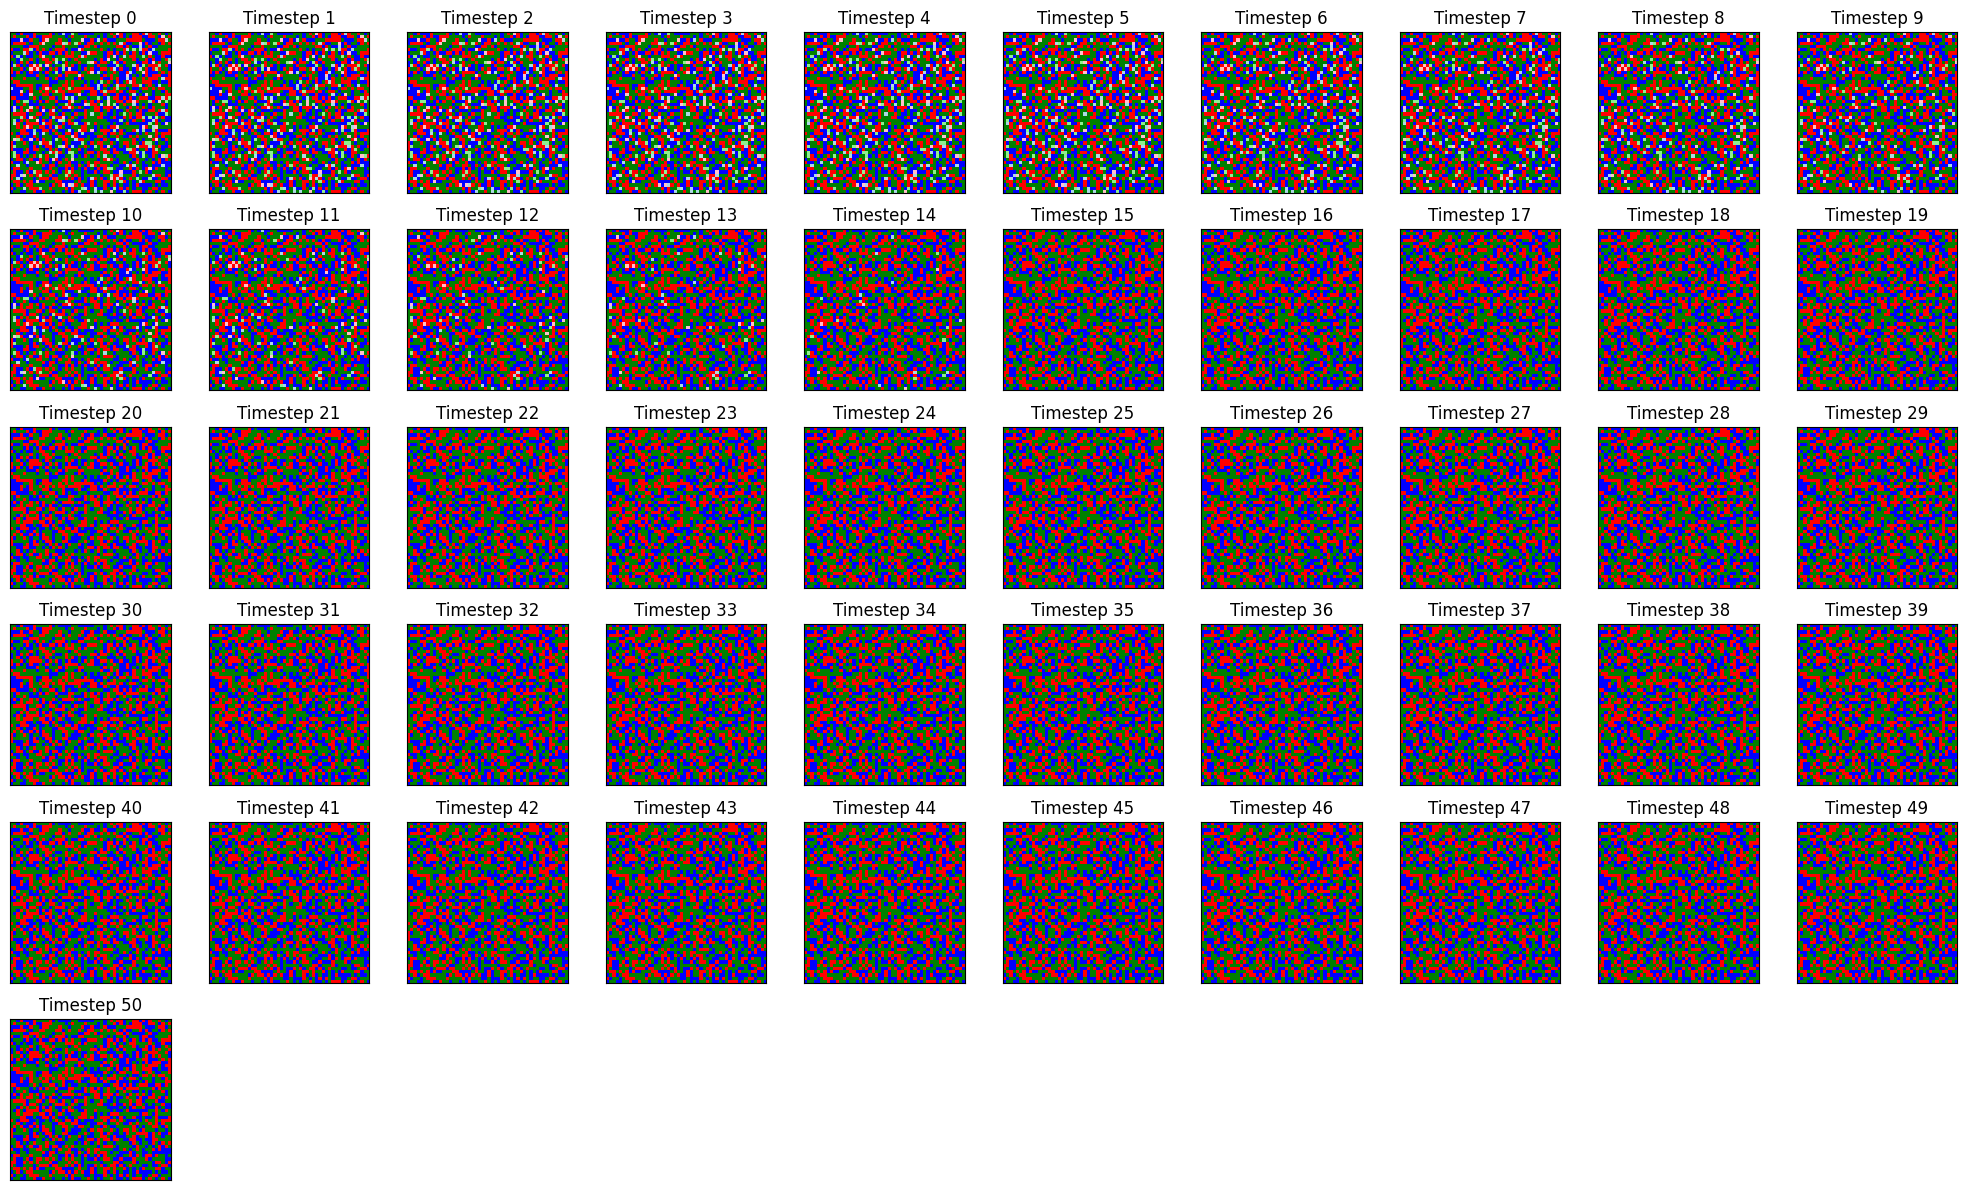

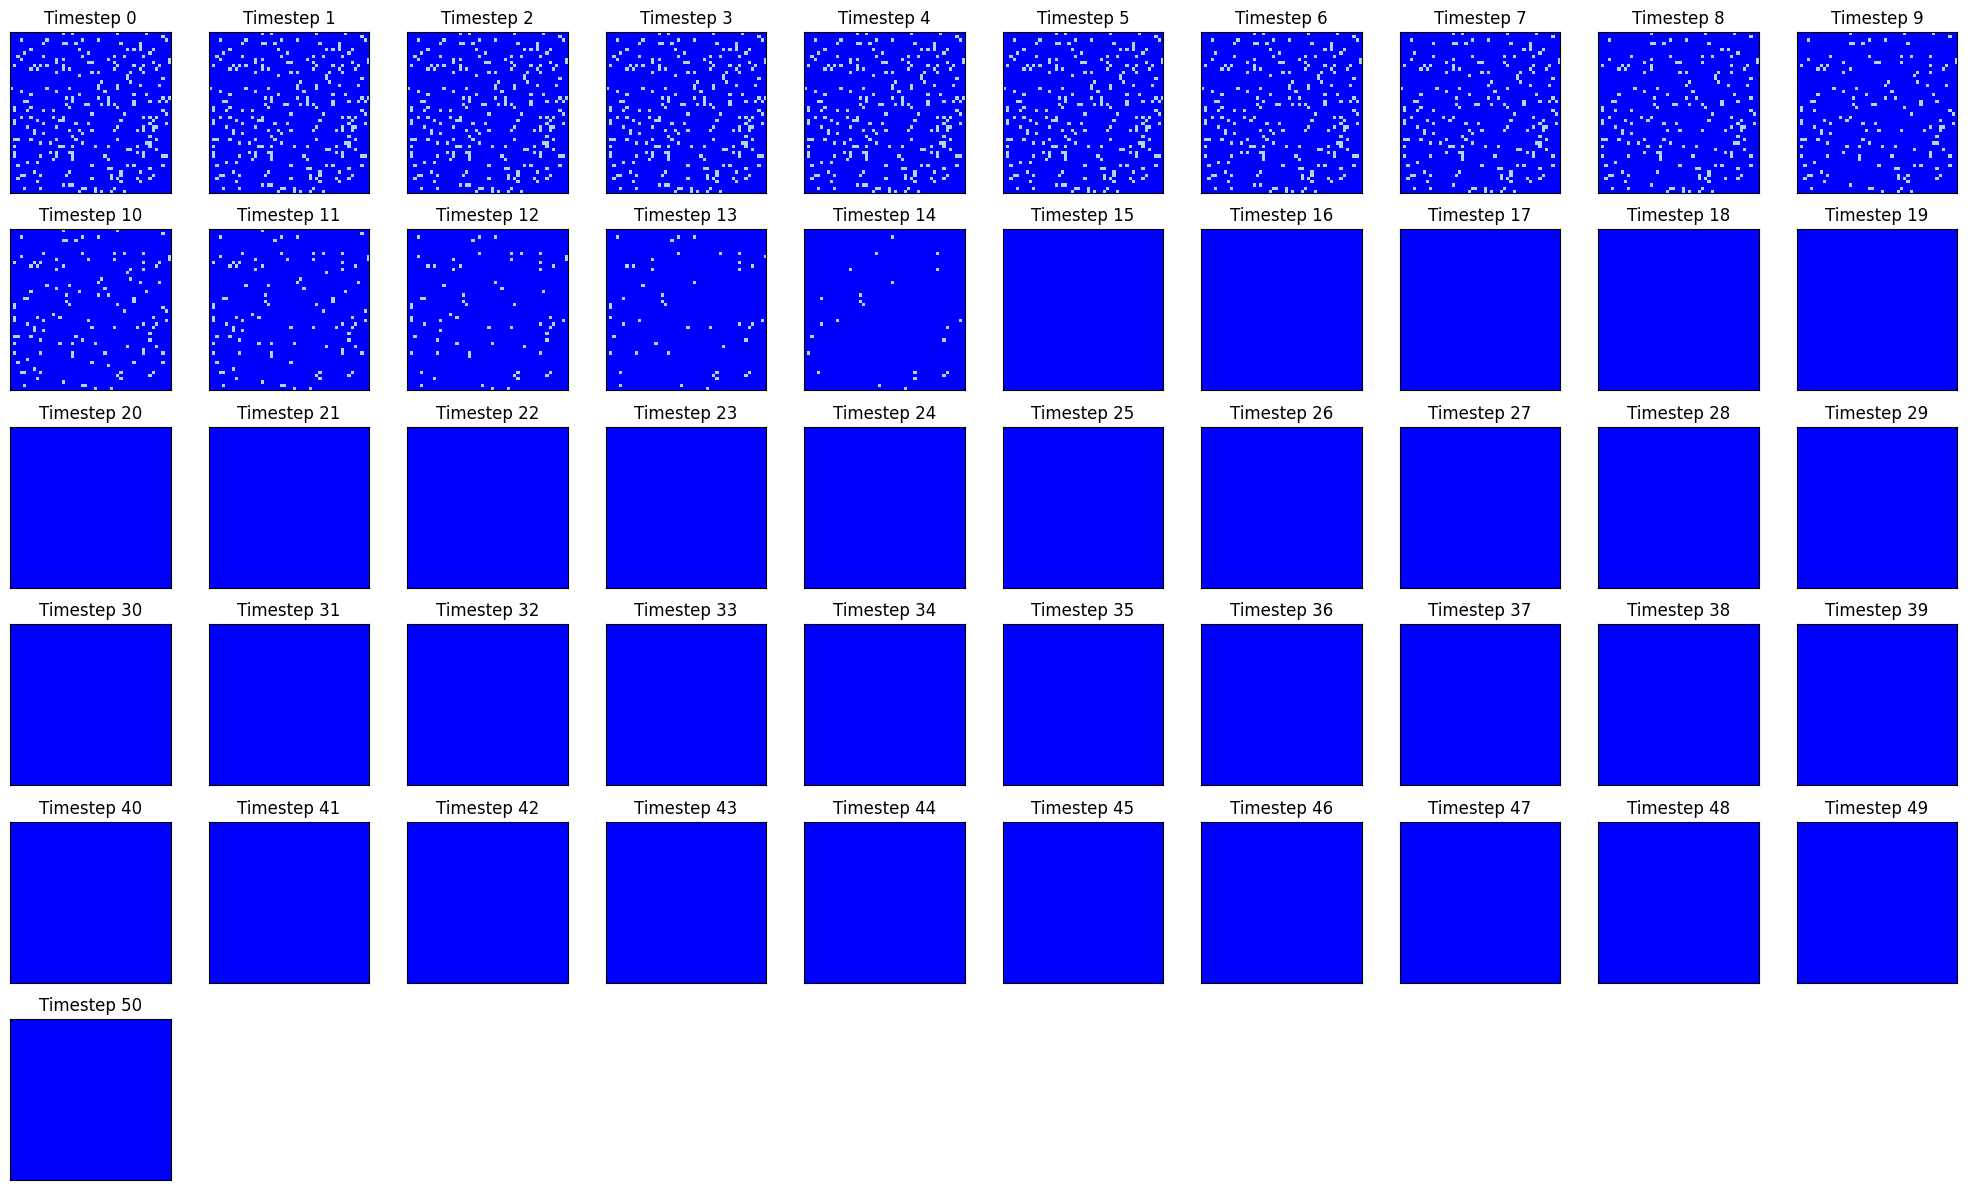

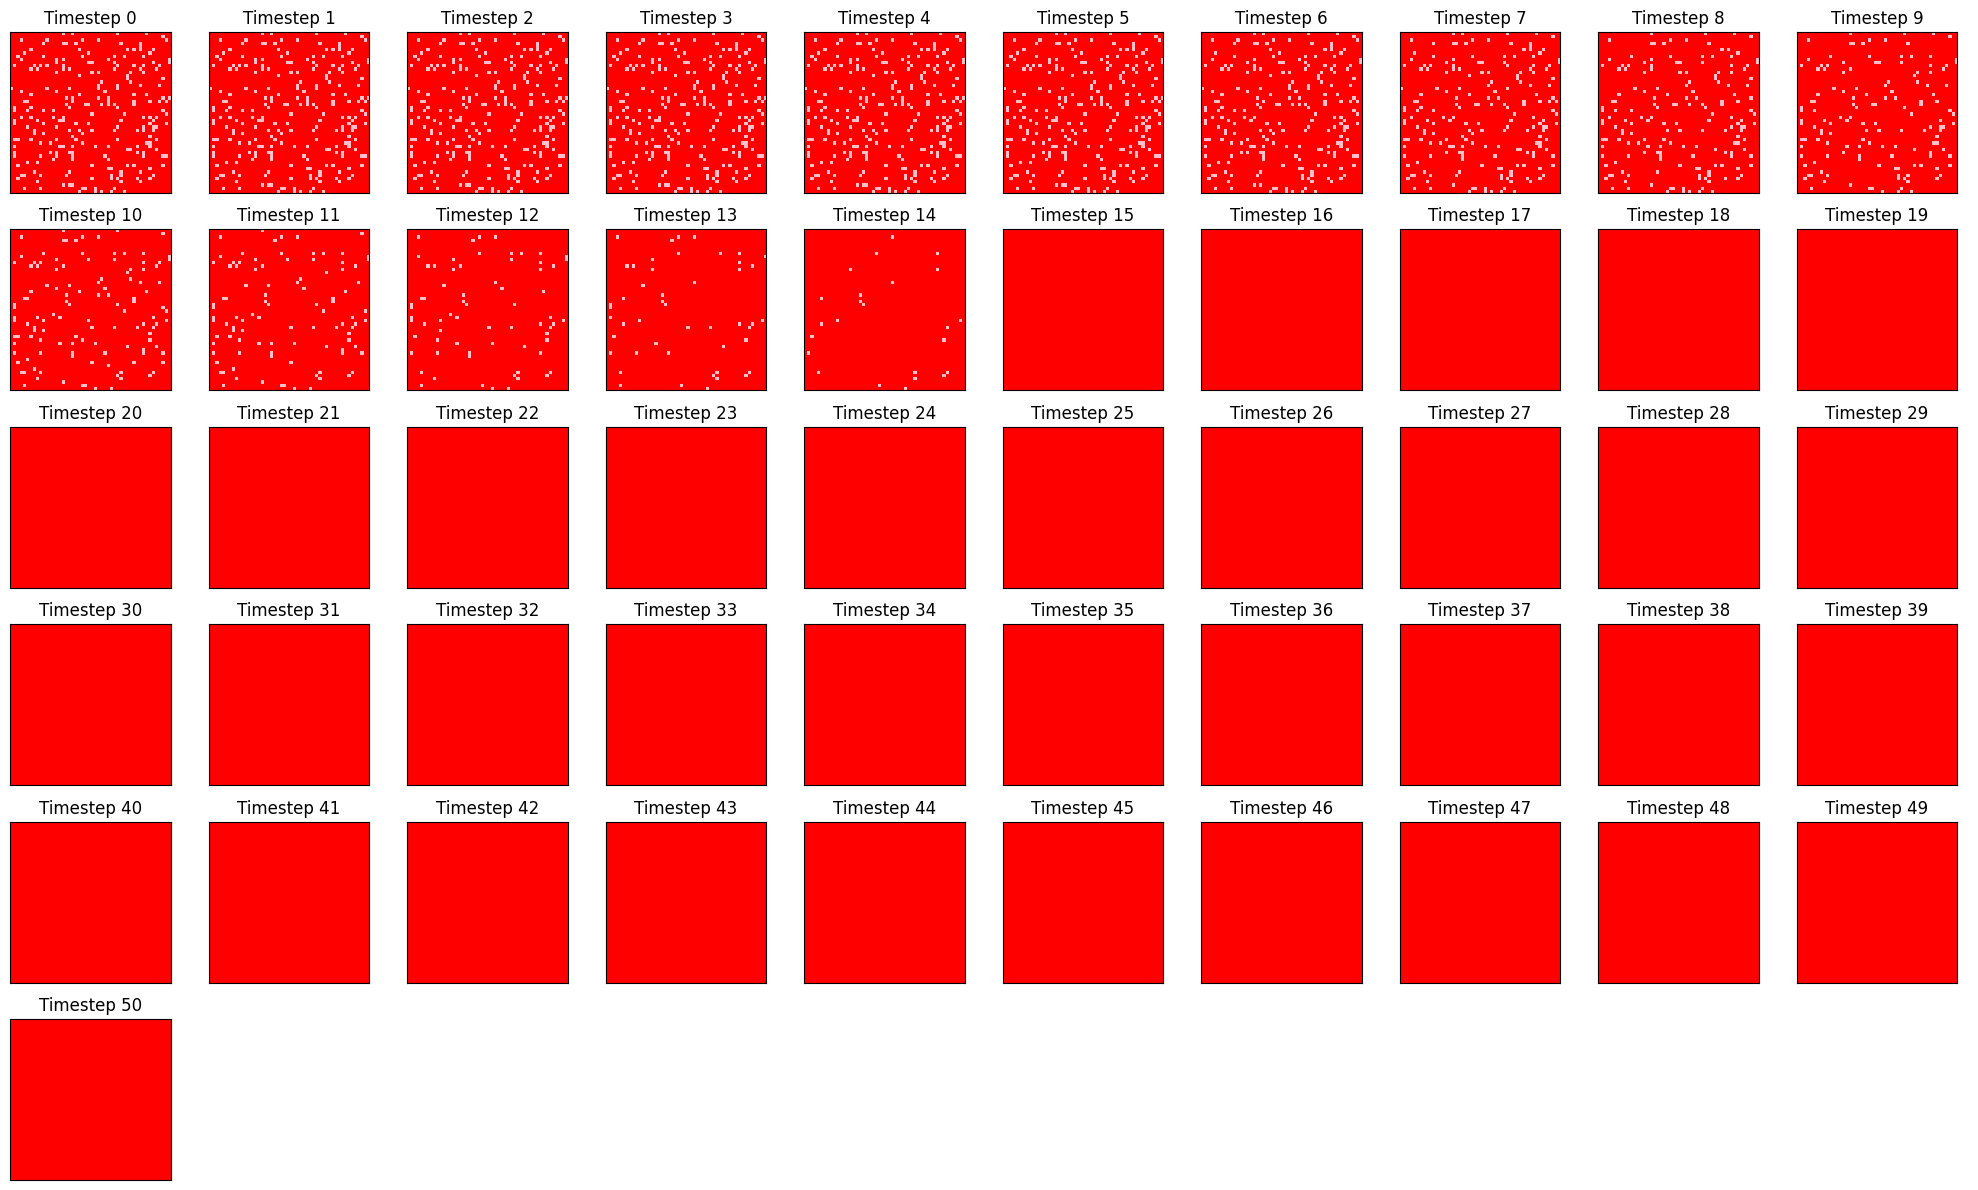

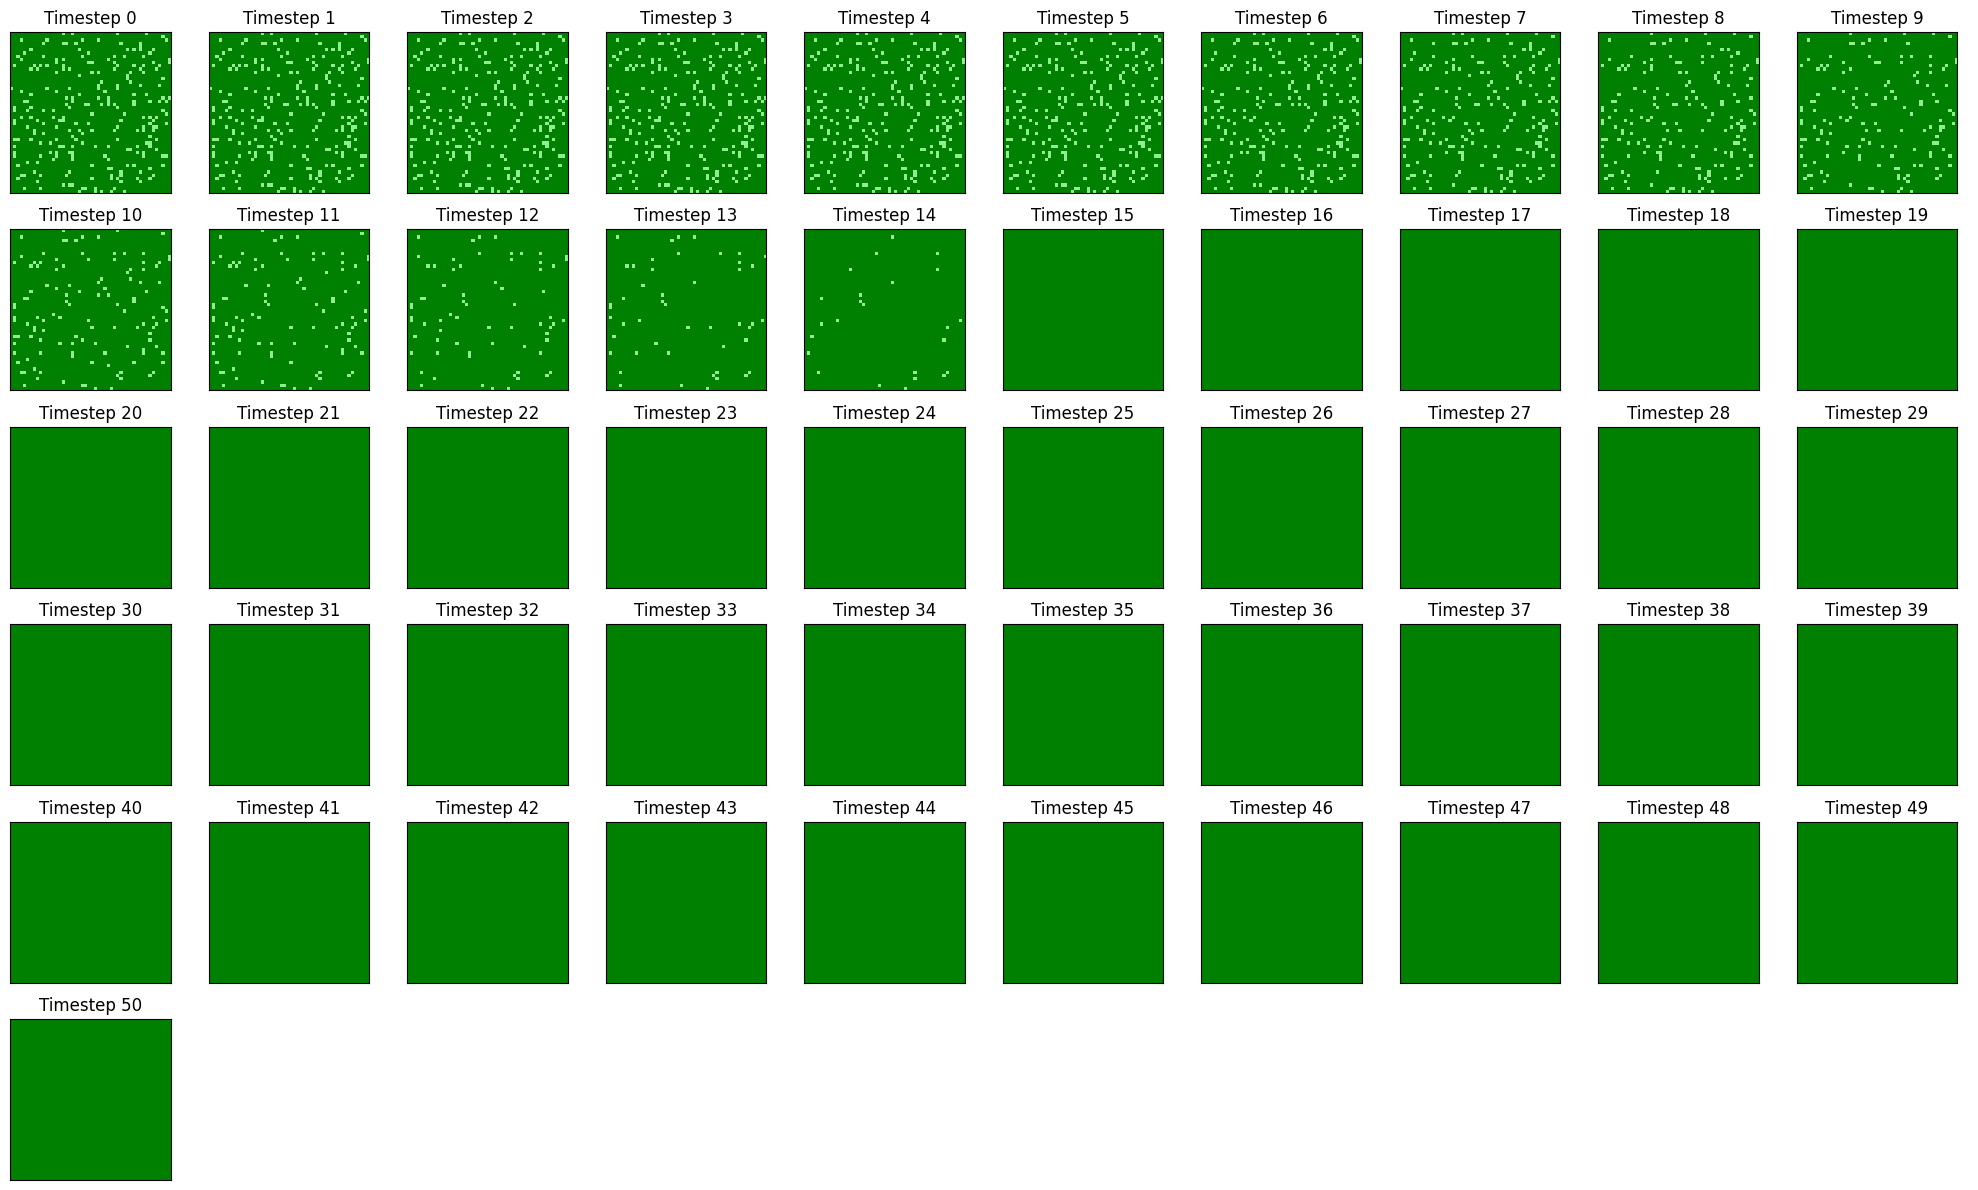

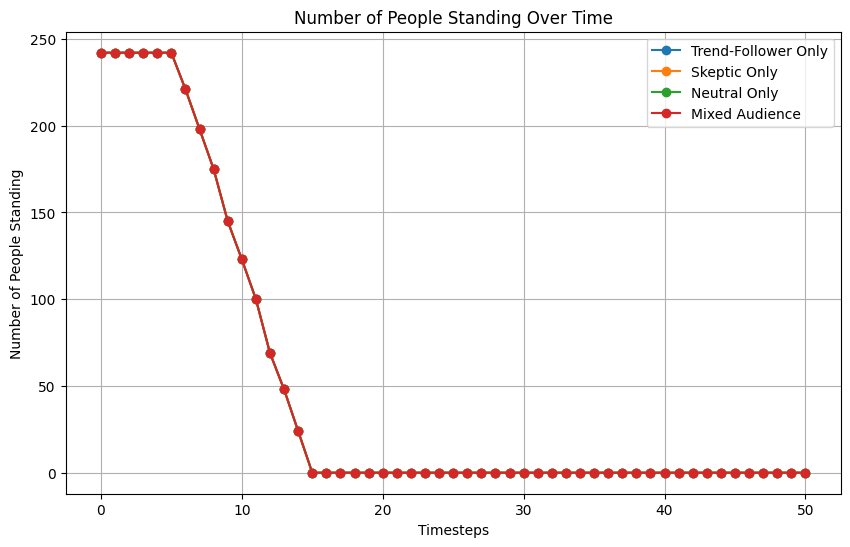

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_colormap():
    from matplotlib.colors import ListedColormap
    colors = ['blue', 'red', 'green', 'lightblue', 'pink', 'lightgreen']  # Seated/Standing for Trend-Follower, Skeptic, Neutral
    return ListedColormap(colors)

def simulate_standing_ovation(grid_size, audience_types, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality):
    grid = initial_standing.copy()
    history = [grid.copy()]
    standing_counts = [np.sum(grid)]

    # Track how long each agent has been standing
    standing_time = np.zeros((grid_size, grid_size))

    for t in range(max_iters):
        new_grid = grid.copy()
        new_standing_time = standing_time.copy()

        for x in range(grid_size):
            for y in range(grid_size):

                visible = [
                    grid[i, j]
                    for i in range(max(0, x-6))
                    for j in range(max(0, y-abs(x-i)), min(grid_size, y+abs(x-i)+1))
                    if (i, j) != (x, y)
                ]
                visible_influence = np.mean(visible) if visible else 0

                influence = influence_factors[audience_types[x, y]] * (visible_influence*2) * performance_quality

                if not grid[x, y]:  # Currently sitting
                    if influence > 0.5 and new_standing_time[x, y] == 0:  # Stand up threshold
                        new_grid[x, y] = True
                        new_standing_time[x, y] = 0
                else:  # Currently standing
                    new_standing_time[x, y] += 1

                    if new_standing_time[x, y] > sitting_tendency[x, y] / performance_quality:
                        new_grid[x, y] = False  # Sit down permanently
                        new_standing_time[x, y] = -1  # Mark as permanently seated

        grid = new_grid
        standing_time = new_standing_time
        history.append(grid.copy())
        standing_counts.append(np.sum(grid))

    return history, standing_counts

def plot_heatmaps(history, audience_types):
    colormap = get_colormap()
    steps_to_plot = len(history)
    cols = 10  # Number of columns in the plot grid
    rows = (steps_to_plot + cols - 1) // cols  # Number of rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(20, 2 * rows))
    axes = axes.flatten()

    for i, grid in enumerate(history):
        ax = axes[i]
        # Map grid and audience types to color indices
        visual_grid = np.zeros_like(grid, dtype=int)
        for x in range(grid.shape[0]):
            for y in range(grid.shape[1]):
                if grid[x, y]:
                    if audience_types[x, y] == 'trend-follower':
                        visual_grid[x, y] = 3  # Light blue
                    elif audience_types[x, y] == 'skeptic':
                        visual_grid[x, y] = 4  # Pink
                    elif audience_types[x, y] == 'neutral':
                        visual_grid[x, y] = 5  # Light green
                else:
                    if audience_types[x, y] == 'trend-follower':
                        visual_grid[x, y] = 0  # Blue
                    elif audience_types[x, y] == 'skeptic':
                        visual_grid[x, y] = 1  # Red
                    elif audience_types[x, y] == 'neutral':
                        visual_grid[x, y] = 2  # Green

        im = ax.imshow(visual_grid, cmap=colormap, vmin=0, vmax=5)
        ax.set_title(f'Timestep {i}')
        ax.set_xticks([])
        ax.set_yticks([])
        # Add solid gridlines
        ax.grid(visible=True, color="black", linestyle="-", linewidth=0.5)
        ax.set_xticks(np.arange(-0.5, grid.shape[1], 1), minor=True)
        ax.set_yticks(np.arange(-0.5, grid.shape[0], 1), minor=True)
        ax.tick_params(which="minor", length=0)

    for ax in axes[len(history):]:
        ax.axis('off')  # Turn off unused axes

    plt.tight_layout()
    plt.show()

def plot_standing_counts(standing_counts_list, labels):
    plt.figure(figsize=(10, 6))
    for counts, label in zip(standing_counts_list, labels):
        plt.plot(counts, marker='o', linestyle='-', label=label)
    plt.title('Number of People Standing Over Time')
    plt.xlabel('Timesteps')
    plt.ylabel('Number of People Standing')
    plt.legend()
    plt.grid(True)
    plt.show()

# Simulation for mixed personalities
grid_size = 50
max_iters = 50
initial_standing = np.random.choice([True, False], size=(grid_size, grid_size), p=[0.1, 0.9])
sitting_tendency = np.random.uniform(5, 15, size=(grid_size, grid_size))  # Random sitting tendencies
performance_quality = 1 # average performance

# Mixed audience types
audience_types_mixed = np.random.choice(['trend-follower', 'skeptic', 'neutral'], size=(grid_size, grid_size), p=[0.3, 0.3, 0.4])
audience_types_trend = np.full((grid_size, grid_size), 'trend-follower')
audience_types_skeptic = np.full((grid_size, grid_size), 'skeptic')
audience_types_neutral = np.full((grid_size, grid_size), 'neutral')

influence_factors = {
    'trend-follower': 1.5,
    'skeptic': 0.5,
    'neutral': 1.0
}

# Run simulations
history_mixed, standing_counts_mixed = simulate_standing_ovation(
    grid_size, audience_types_mixed, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_trend, standing_counts_trend = simulate_standing_ovation(
    grid_size, audience_types_trend, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_skeptic, standing_counts_skeptic = simulate_standing_ovation(
    grid_size, audience_types_skeptic, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_neutral, standing_counts_neutral = simulate_standing_ovation(
    grid_size, audience_types_neutral, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

# Plot results for mixed audience
print("\nSimulation for Mixed Personalities:")
plot_heatmaps(history_mixed, audience_types_mixed)
plot_heatmaps(history_trend, audience_types_trend)
plot_heatmaps(history_skeptic, audience_types_skeptic)
plot_heatmaps(history_neutral, audience_types_neutral)

# Plot standing counts comparison
plot_standing_counts(
    [standing_counts_trend, standing_counts_skeptic, standing_counts_neutral, standing_counts_mixed],
    ['Trend-Follower Only', 'Skeptic Only', 'Neutral Only', 'Mixed Audience']
)

data = {
    "Timestep": list(range(max_iters + 1)),
    "Trend-Follower Only": standing_counts_trend,
    "Skeptic Only": standing_counts_skeptic,
    "Neutral Only": standing_counts_neutral,
    "Mixed Audience": standing_counts_mixed
}
df = pd.DataFrame(data)

# Save the results to a CSV file
csv_path = "standing_ovation_results_average_performance_cone.csv"
df.to_csv(csv_path, index=False)


##### Discussion: This is not somehow expected from an average performance. Comparing it to the last performance, the low performance, they are almost the same. In this case even the performance is a bit better, it did not influence the audience to stand up, their personality is still dominant in focusing what the crowd would do 

##### High Performance


Simulation for Mixed Personalities:


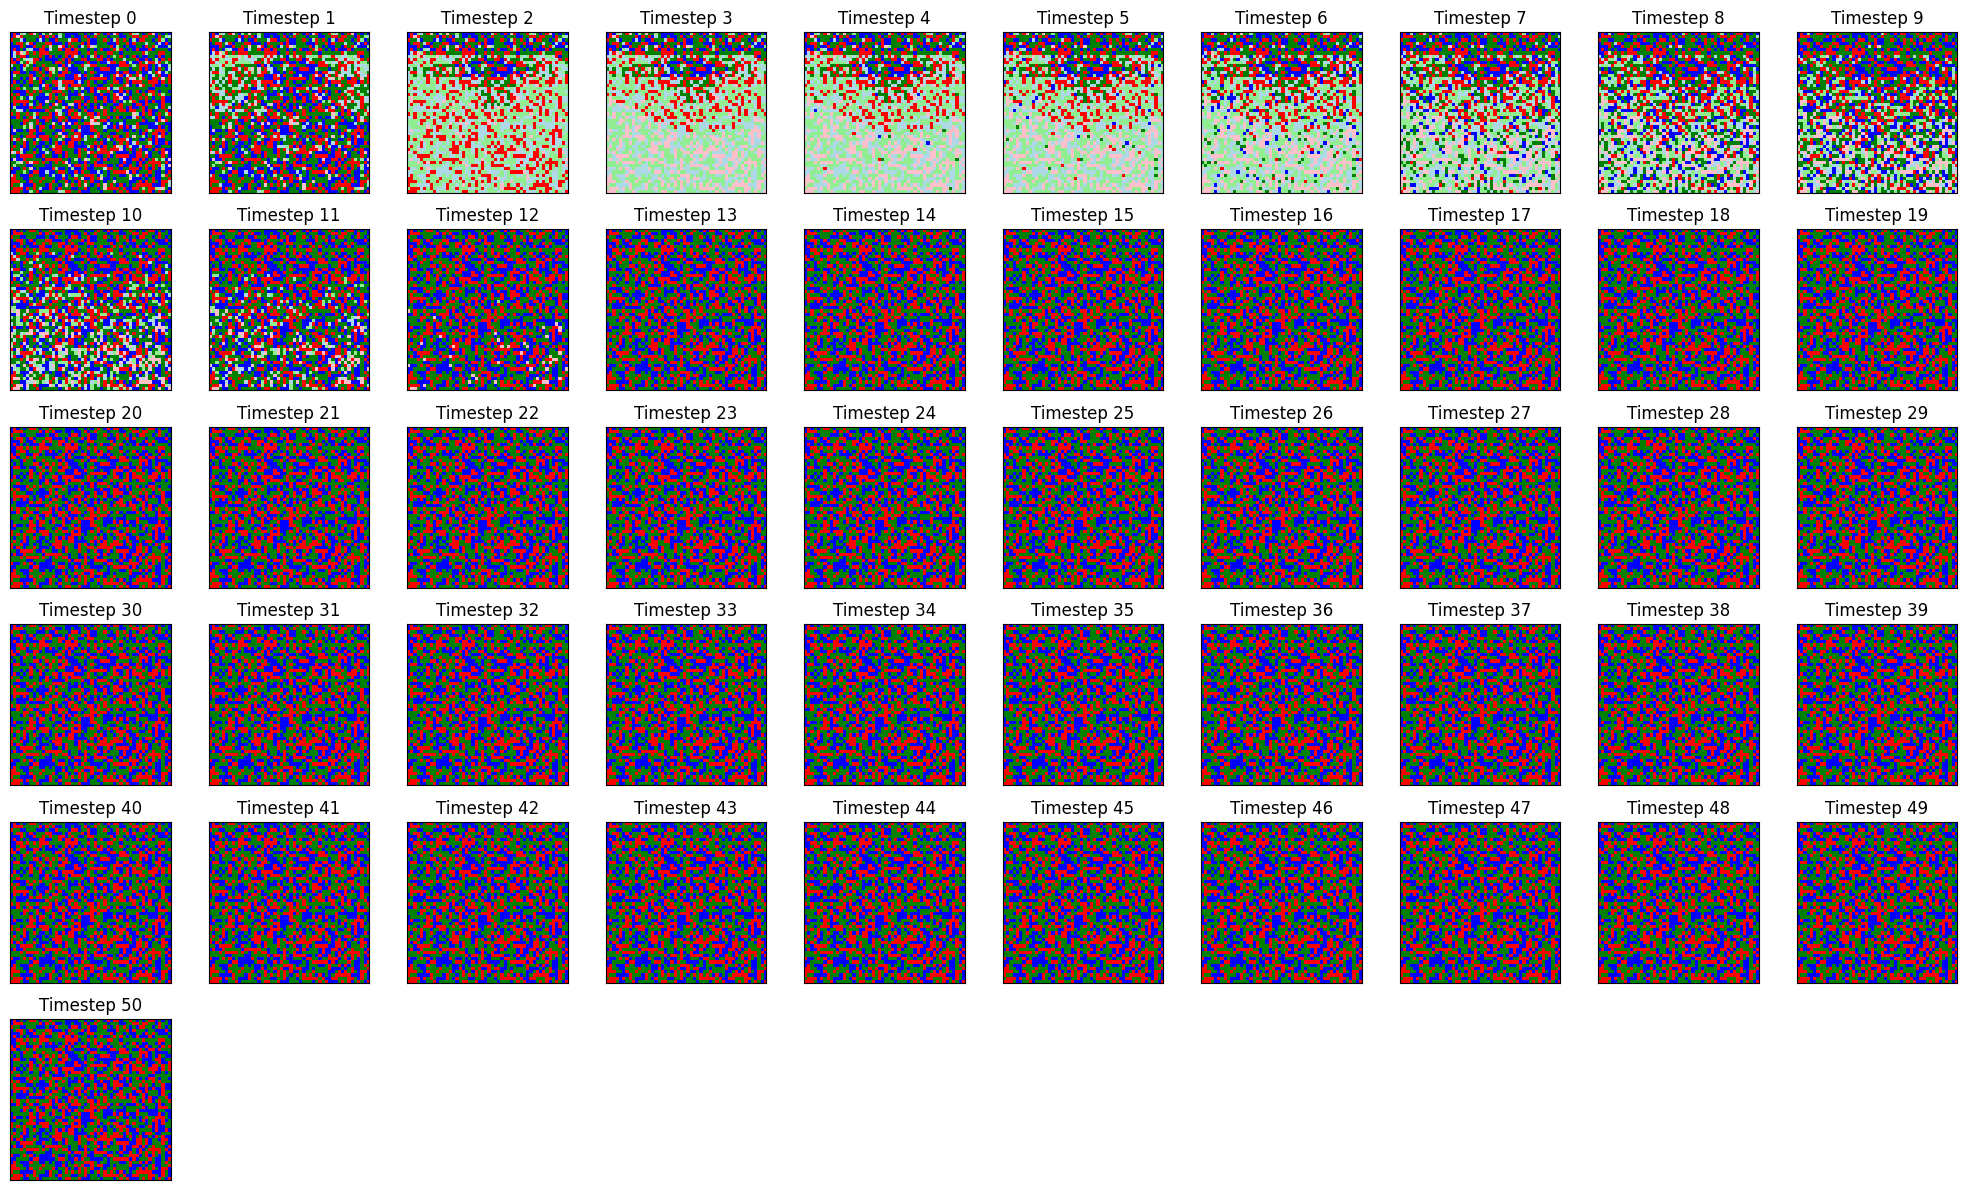

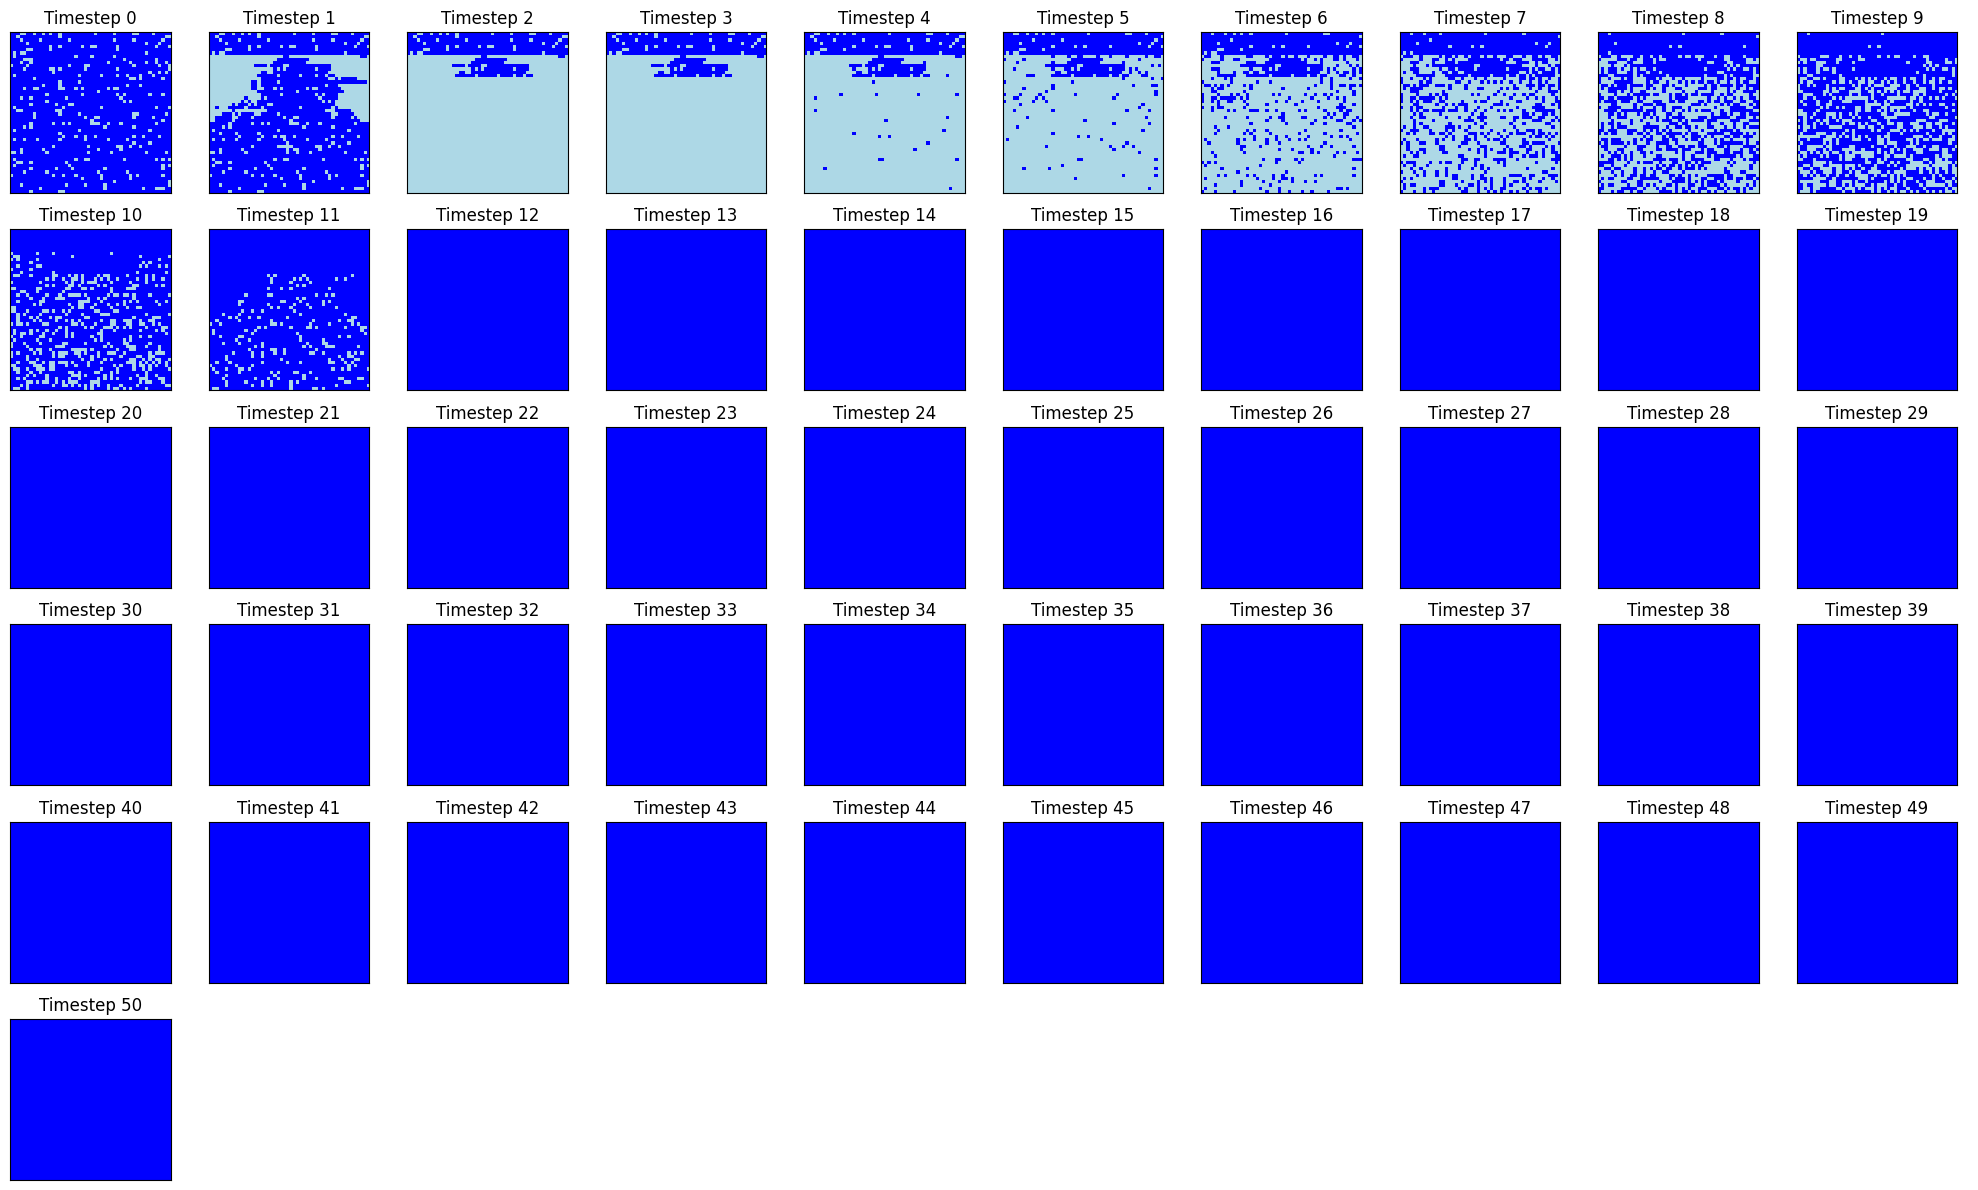

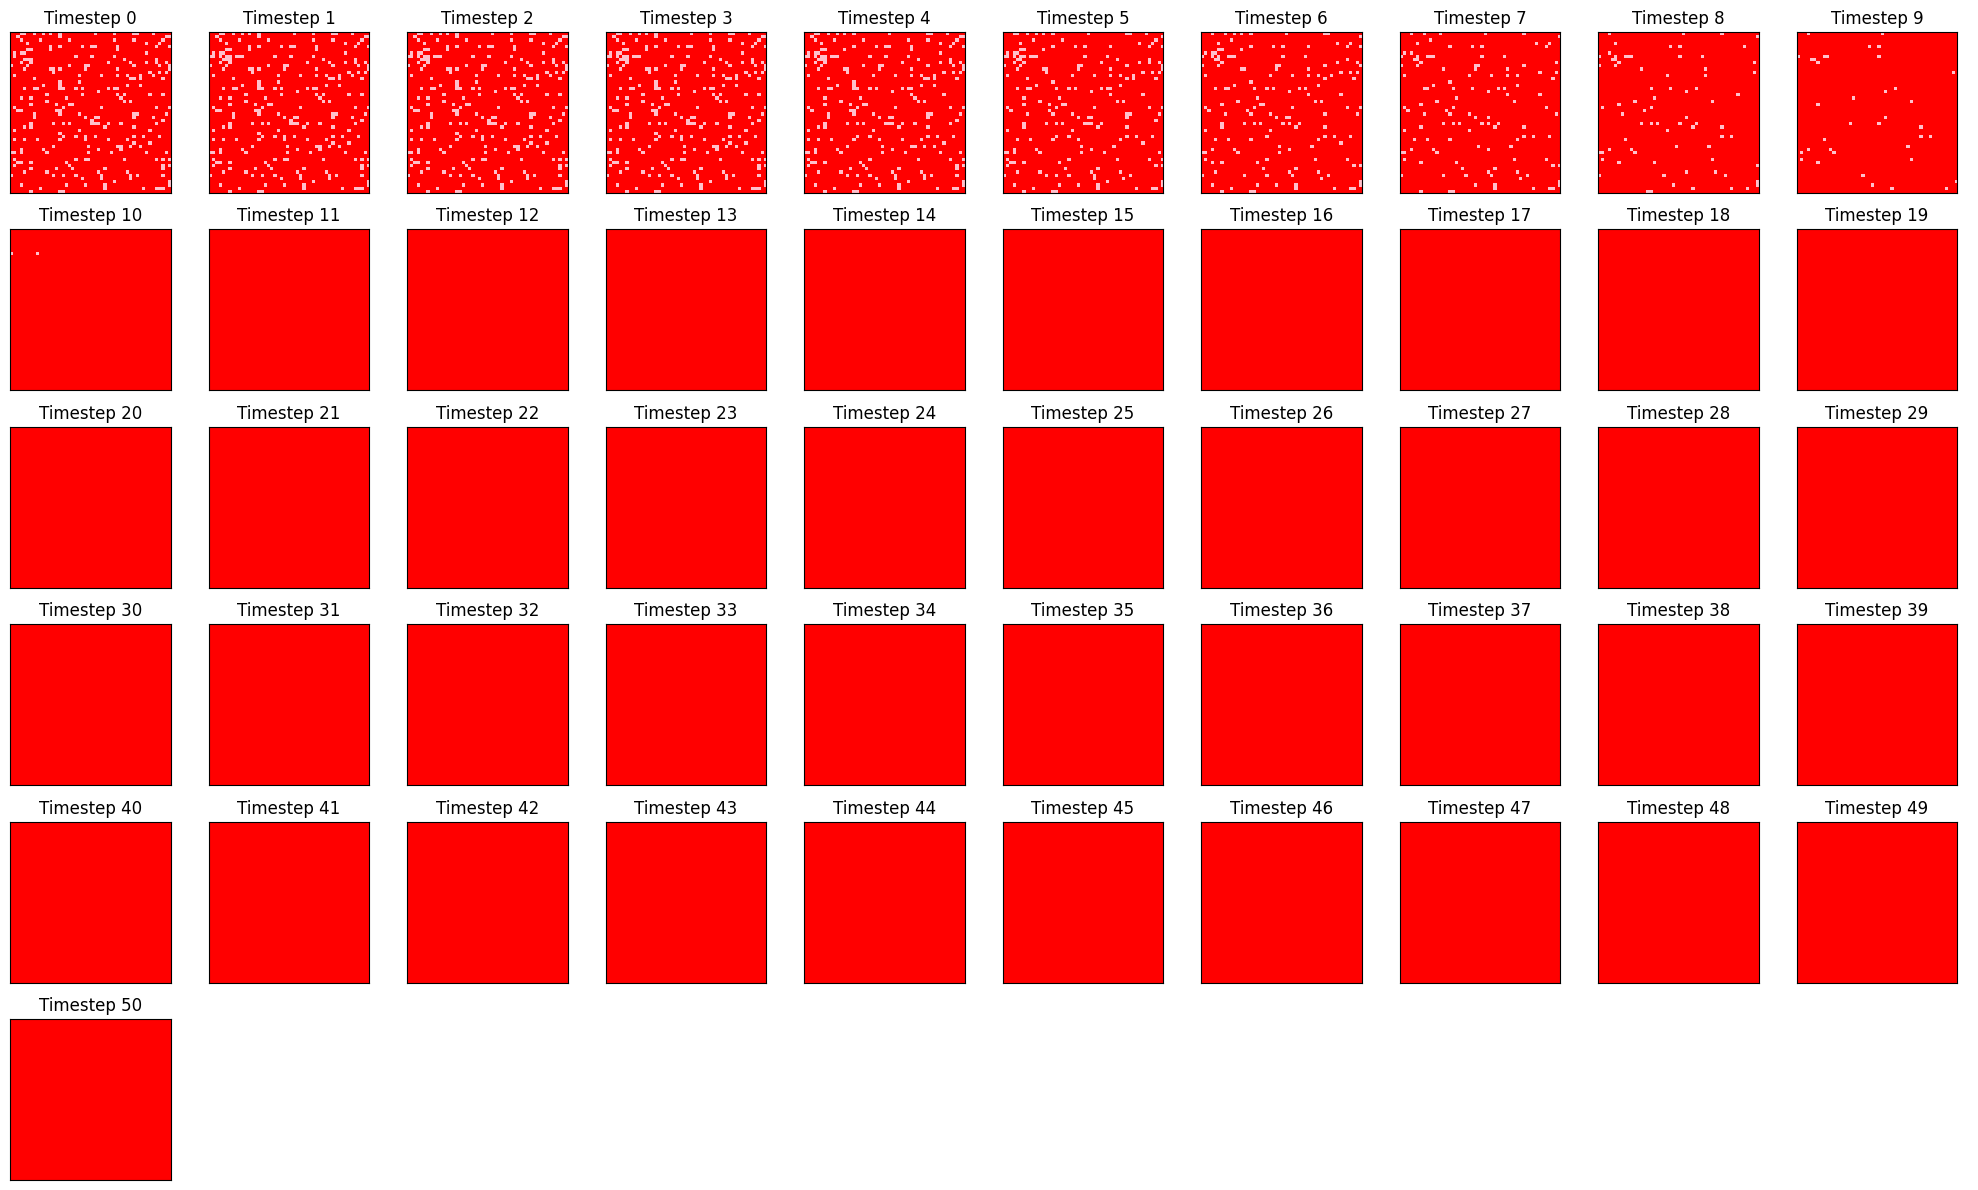

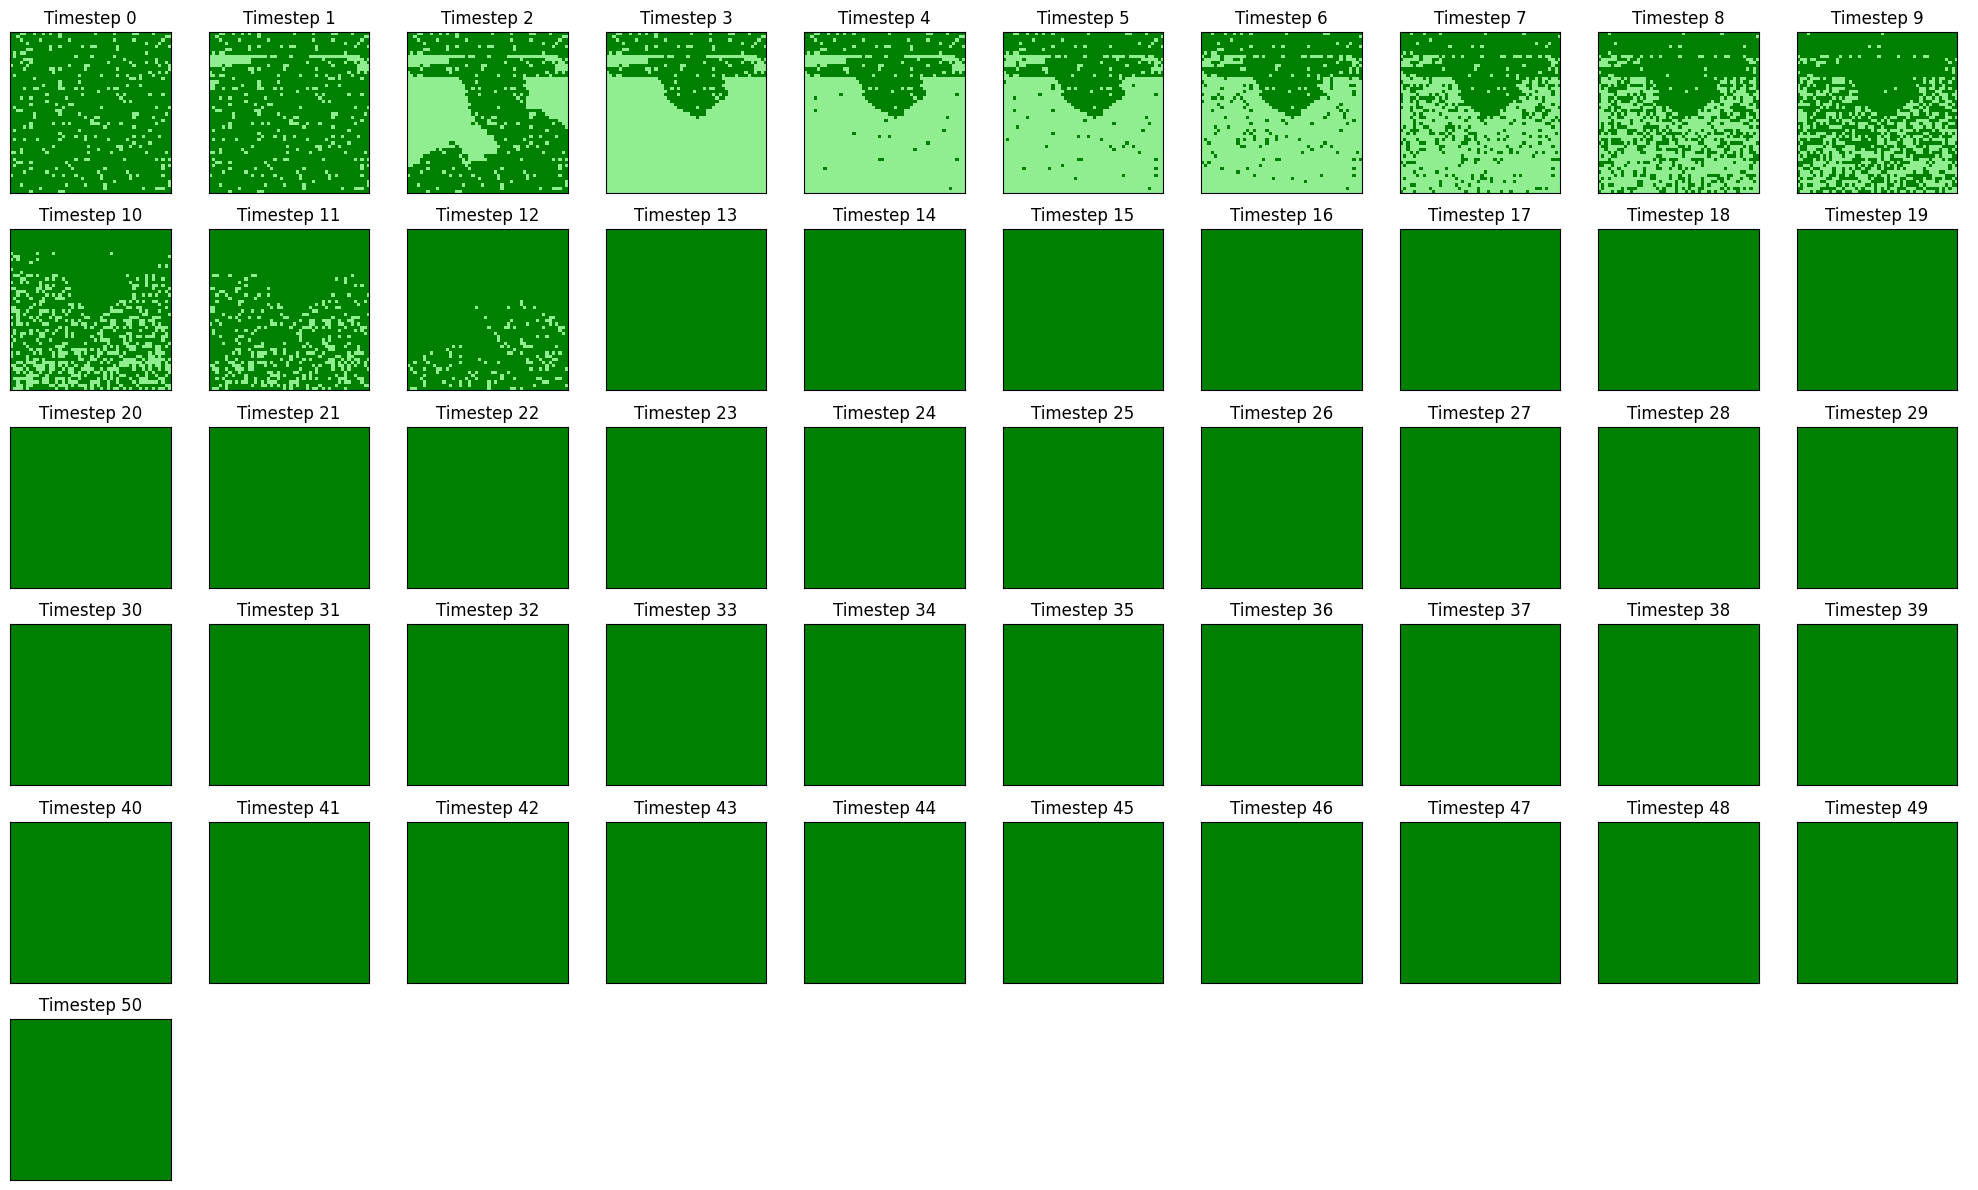

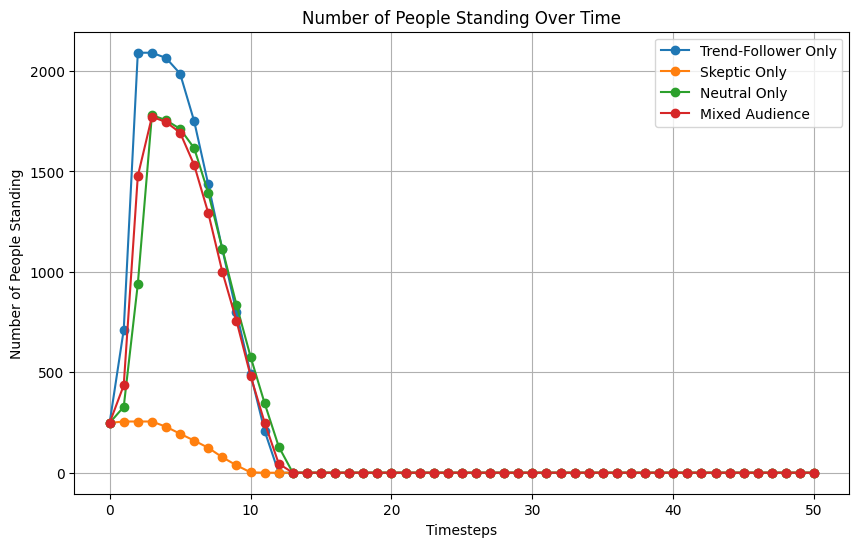

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_colormap():
    from matplotlib.colors import ListedColormap
    colors = ['blue', 'red', 'green', 'lightblue', 'pink', 'lightgreen']  # Seated/Standing for Trend-Follower, Skeptic, Neutral
    return ListedColormap(colors)

def simulate_standing_ovation(grid_size, audience_types, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality):
    grid = initial_standing.copy()
    history = [grid.copy()]
    standing_counts = [np.sum(grid)]

    # Track how long each agent has been standing
    standing_time = np.zeros((grid_size, grid_size))

    for t in range(max_iters):
        new_grid = grid.copy()
        new_standing_time = standing_time.copy()

        for x in range(grid_size):
            for y in range(grid_size):

                visible = [
                    grid[i, j]
                    for i in range(max(0, x-6))
                    for j in range(max(0, y-abs(x-i)), min(grid_size, y+abs(x-i)+1))
                    if (i, j) != (x, y)
                ]
                visible_influence = np.mean(visible) if visible else 0

                influence = influence_factors[audience_types[x, y]] * (visible_influence*2) * performance_quality

                if not grid[x, y]:  # Currently sitting
                    if influence > 0.5 and new_standing_time[x, y] == 0:  # Stand up threshold
                        new_grid[x, y] = True
                        new_standing_time[x, y] = 0
                else:  # Currently standing
                    new_standing_time[x, y] += 1

                    if new_standing_time[x, y] > sitting_tendency[x, y] / performance_quality:
                        new_grid[x, y] = False  # Sit down permanently
                        new_standing_time[x, y] = -1  # Mark as permanently seated

        grid = new_grid
        standing_time = new_standing_time
        history.append(grid.copy())
        standing_counts.append(np.sum(grid))

    return history, standing_counts

def plot_heatmaps(history, audience_types):
    colormap = get_colormap()
    steps_to_plot = len(history)
    cols = 10  # Number of columns in the plot grid
    rows = (steps_to_plot + cols - 1) // cols  # Number of rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(20, 2 * rows))
    axes = axes.flatten()

    for i, grid in enumerate(history):
        ax = axes[i]
        # Map grid and audience types to color indices
        visual_grid = np.zeros_like(grid, dtype=int)
        for x in range(grid.shape[0]):
            for y in range(grid.shape[1]):
                if grid[x, y]:
                    if audience_types[x, y] == 'trend-follower':
                        visual_grid[x, y] = 3  # Light blue
                    elif audience_types[x, y] == 'skeptic':
                        visual_grid[x, y] = 4  # Pink
                    elif audience_types[x, y] == 'neutral':
                        visual_grid[x, y] = 5  # Light green
                else:
                    if audience_types[x, y] == 'trend-follower':
                        visual_grid[x, y] = 0  # Blue
                    elif audience_types[x, y] == 'skeptic':
                        visual_grid[x, y] = 1  # Red
                    elif audience_types[x, y] == 'neutral':
                        visual_grid[x, y] = 2  # Green

        im = ax.imshow(visual_grid, cmap=colormap, vmin=0, vmax=5)
        ax.set_title(f'Timestep {i}')
        ax.set_xticks([])
        ax.set_yticks([])
        # Add solid gridlines
        ax.grid(visible=True, color="black", linestyle="-", linewidth=0.5)
        ax.set_xticks(np.arange(-0.5, grid.shape[1], 1), minor=True)
        ax.set_yticks(np.arange(-0.5, grid.shape[0], 1), minor=True)
        ax.tick_params(which="minor", length=0)

    for ax in axes[len(history):]:
        ax.axis('off')  # Turn off unused axes

    plt.tight_layout()
    plt.show()

def plot_standing_counts(standing_counts_list, labels):
    plt.figure(figsize=(10, 6))
    for counts, label in zip(standing_counts_list, labels):
        plt.plot(counts, marker='o', linestyle='-', label=label)
    plt.title('Number of People Standing Over Time')
    plt.xlabel('Timesteps')
    plt.ylabel('Number of People Standing')
    plt.legend()
    plt.grid(True)
    plt.show()

# Simulation for mixed personalities
grid_size = 50
max_iters = 50
initial_standing = np.random.choice([True, False], size=(grid_size, grid_size), p=[0.1, 0.9])
sitting_tendency = np.random.uniform(5, 15, size=(grid_size, grid_size))  # Random sitting tendencies
performance_quality = 1.5 # high performance

# Mixed audience types
audience_types_mixed = np.random.choice(['trend-follower', 'skeptic', 'neutral'], size=(grid_size, grid_size), p=[0.3, 0.3, 0.4])
audience_types_trend = np.full((grid_size, grid_size), 'trend-follower')
audience_types_skeptic = np.full((grid_size, grid_size), 'skeptic')
audience_types_neutral = np.full((grid_size, grid_size), 'neutral')

influence_factors = {
    'trend-follower': 1.5,
    'skeptic': 0.5,
    'neutral': 1.0
}

# Run simulations
history_mixed, standing_counts_mixed = simulate_standing_ovation(
    grid_size, audience_types_mixed, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_trend, standing_counts_trend = simulate_standing_ovation(
    grid_size, audience_types_trend, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_skeptic, standing_counts_skeptic = simulate_standing_ovation(
    grid_size, audience_types_skeptic, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_neutral, standing_counts_neutral = simulate_standing_ovation(
    grid_size, audience_types_neutral, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

# Plot results for mixed audience
print("\nSimulation for Mixed Personalities:")
plot_heatmaps(history_mixed, audience_types_mixed)
plot_heatmaps(history_trend, audience_types_trend)
plot_heatmaps(history_skeptic, audience_types_skeptic)
plot_heatmaps(history_neutral, audience_types_neutral)

# Plot standing counts comparison
plot_standing_counts(
    [standing_counts_trend, standing_counts_skeptic, standing_counts_neutral, standing_counts_mixed],
    ['Trend-Follower Only', 'Skeptic Only', 'Neutral Only', 'Mixed Audience']
)

data = {
    "Timestep": list(range(max_iters + 1)),
    "Trend-Follower Only": standing_counts_trend,
    "Skeptic Only": standing_counts_skeptic,
    "Neutral Only": standing_counts_neutral,
    "Mixed Audience": standing_counts_mixed
}
df = pd.DataFrame(data)

# Save the results to a CSV file
csv_path = "standing_ovation_results_high_performance_cone.csv"
df.to_csv(csv_path, index=False)


##### Discussion: Now this is totally different from the low and average performance, the other groups stood up as the performance got better. THe maintakeaway in this model is the audience in the front rows tend to be foolish as in this model's case, it only utilizes frontal vision

#### Combined = NEIGHBORS + FRONTAL VISION CONE

##### Low Performance


Simulation for Mixed Personalities:


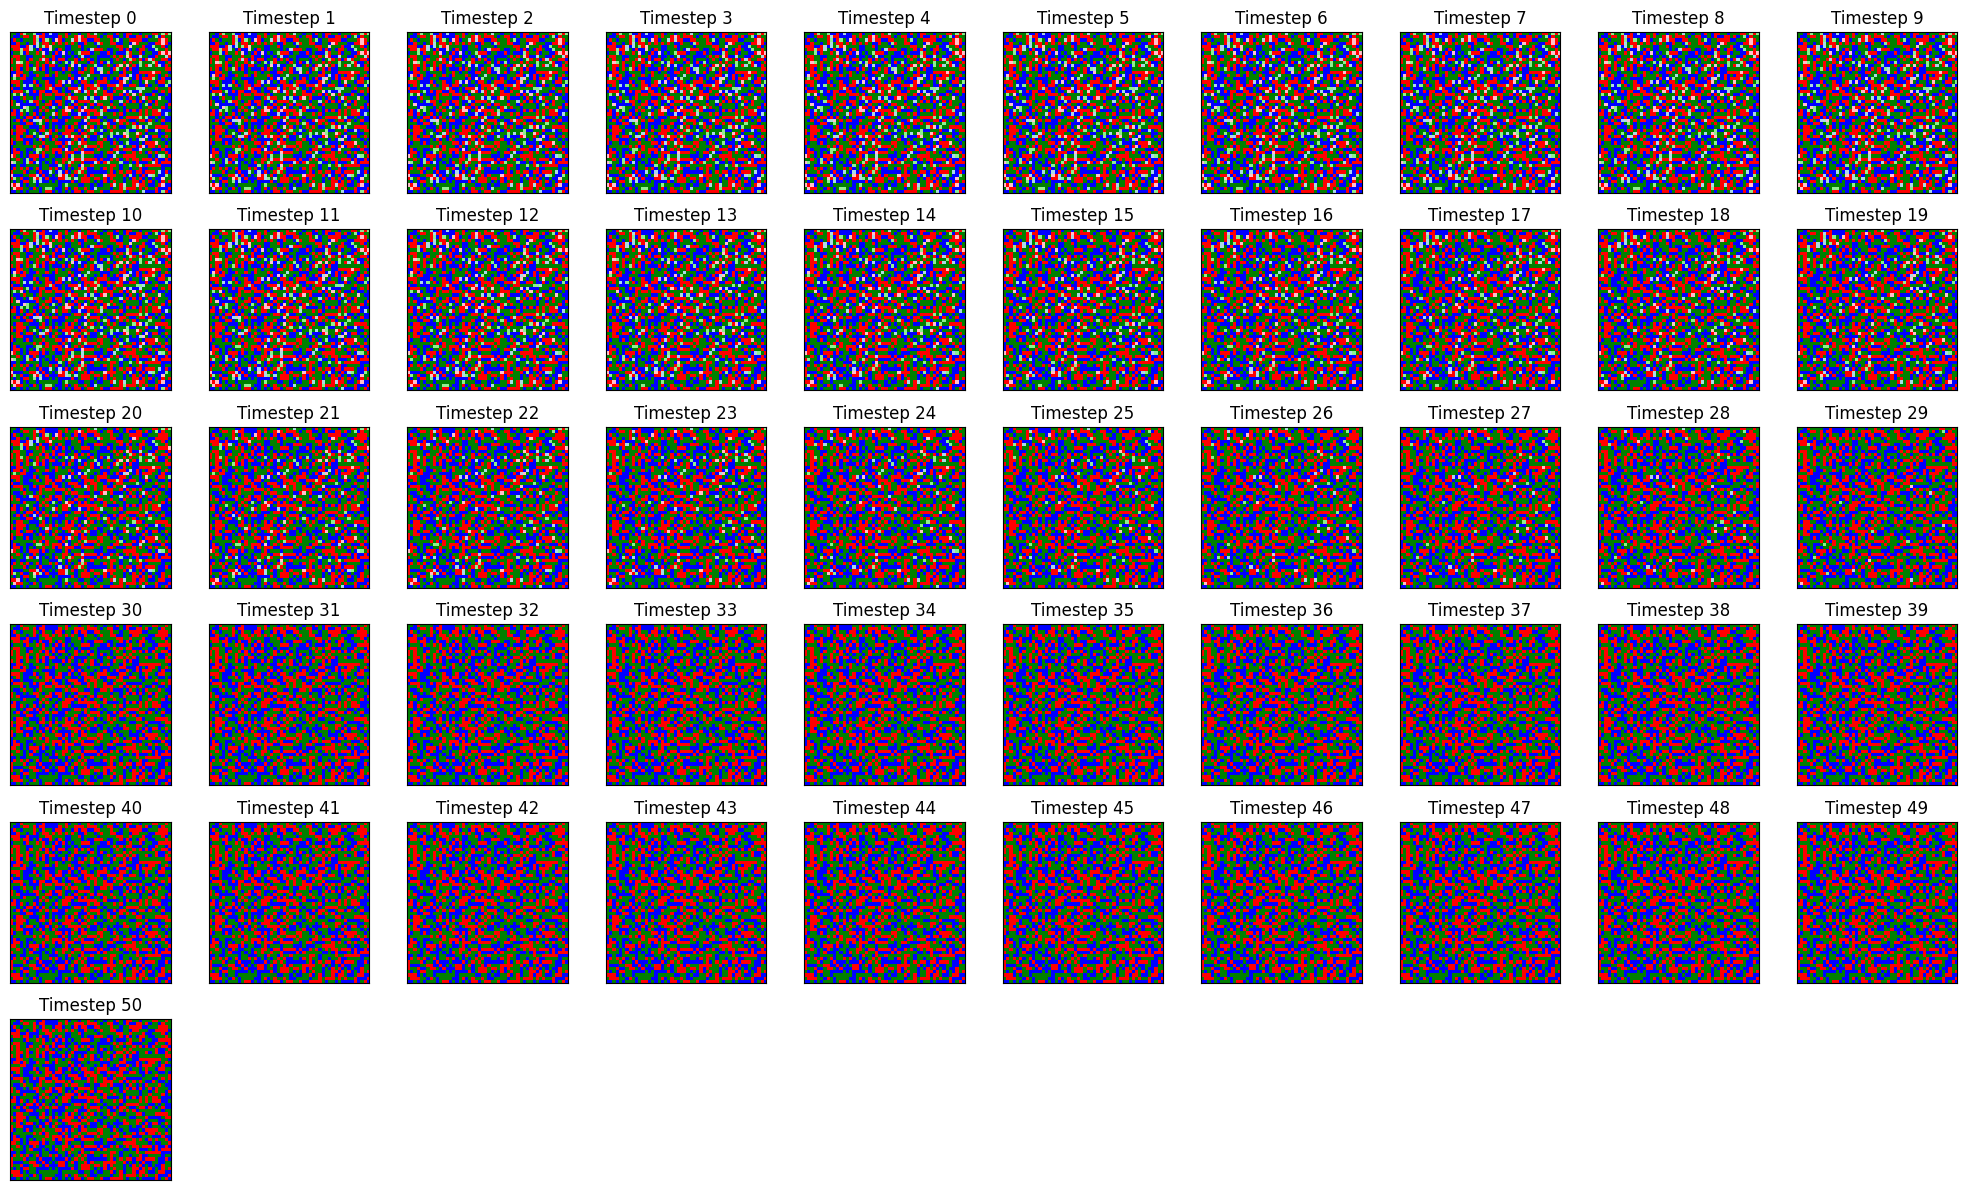

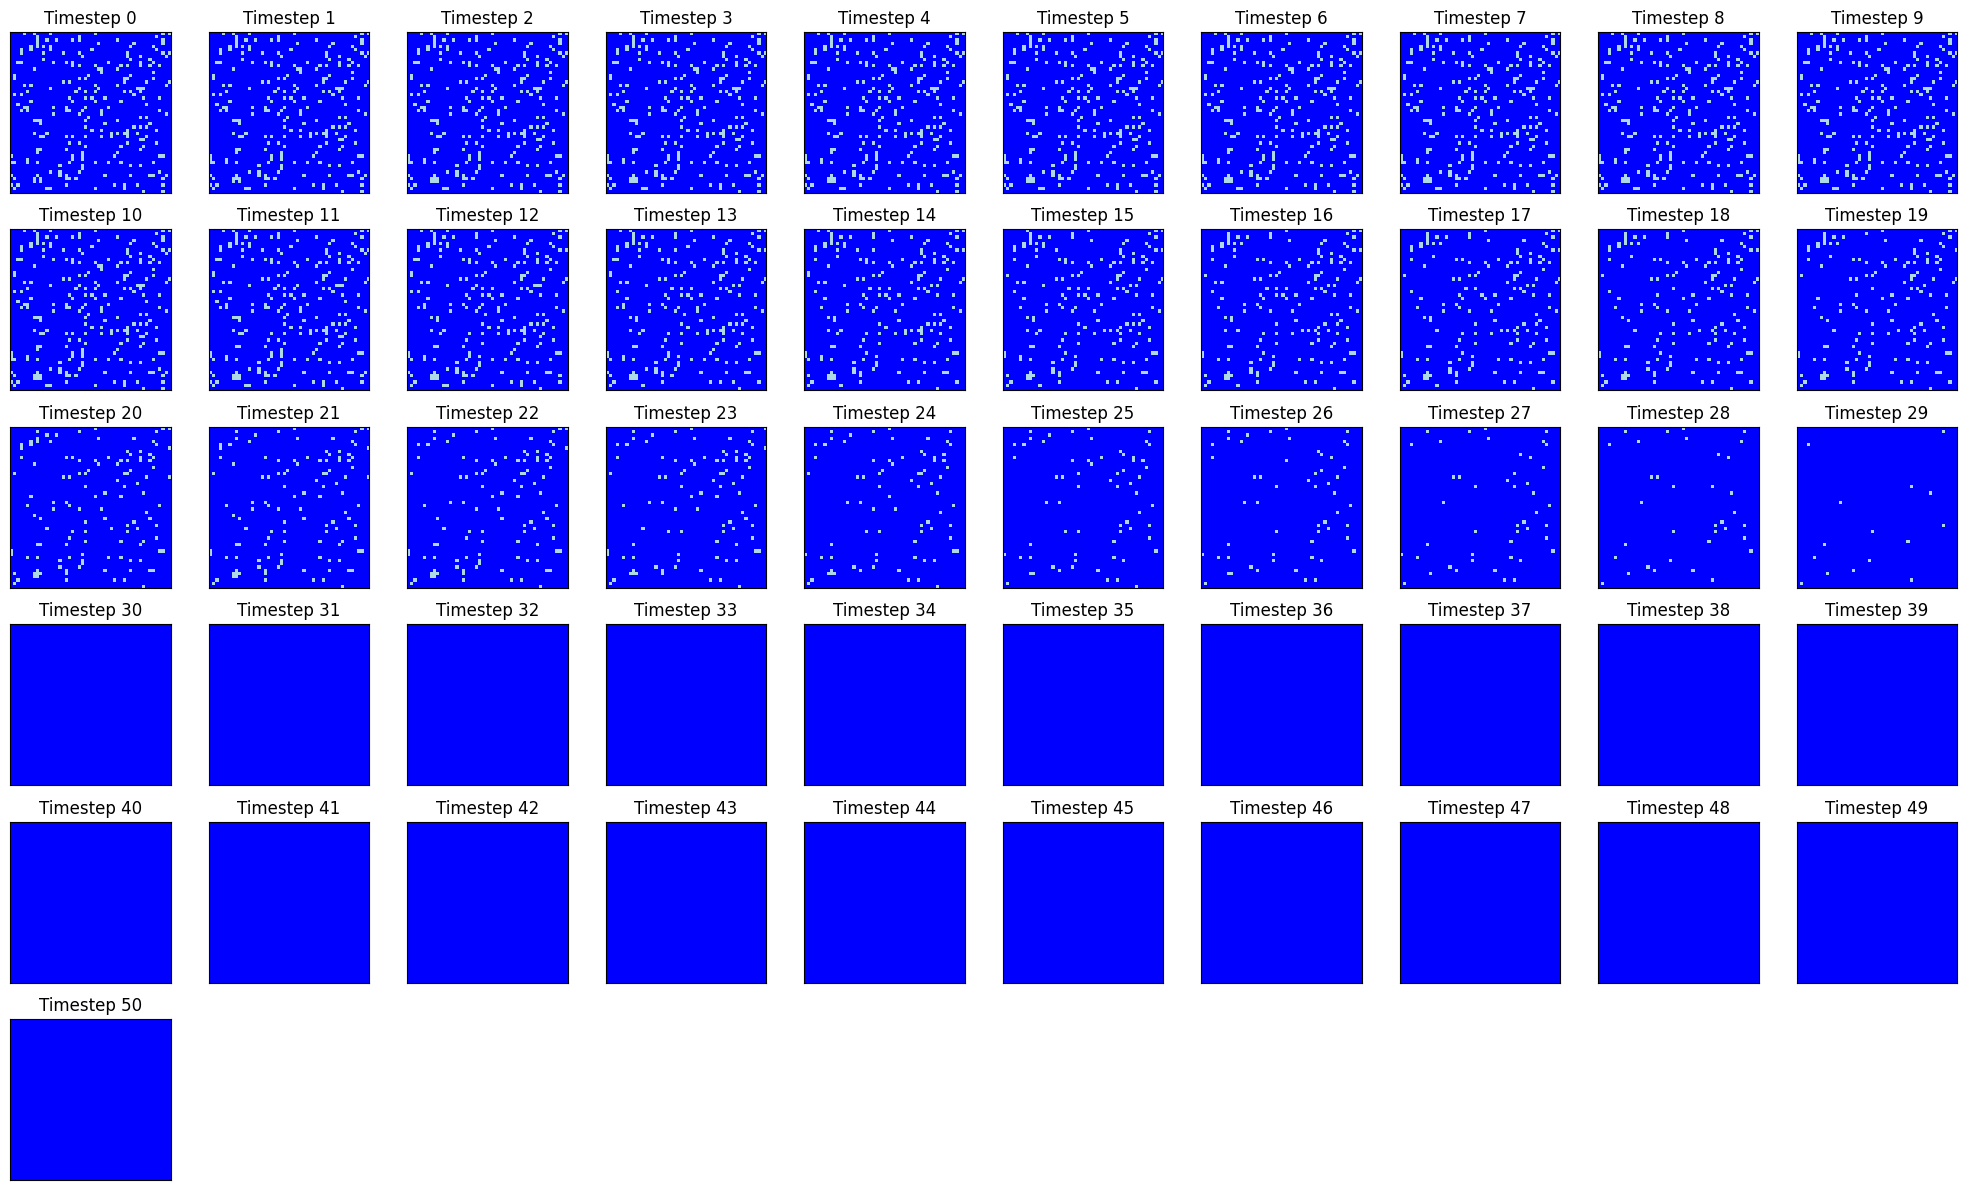

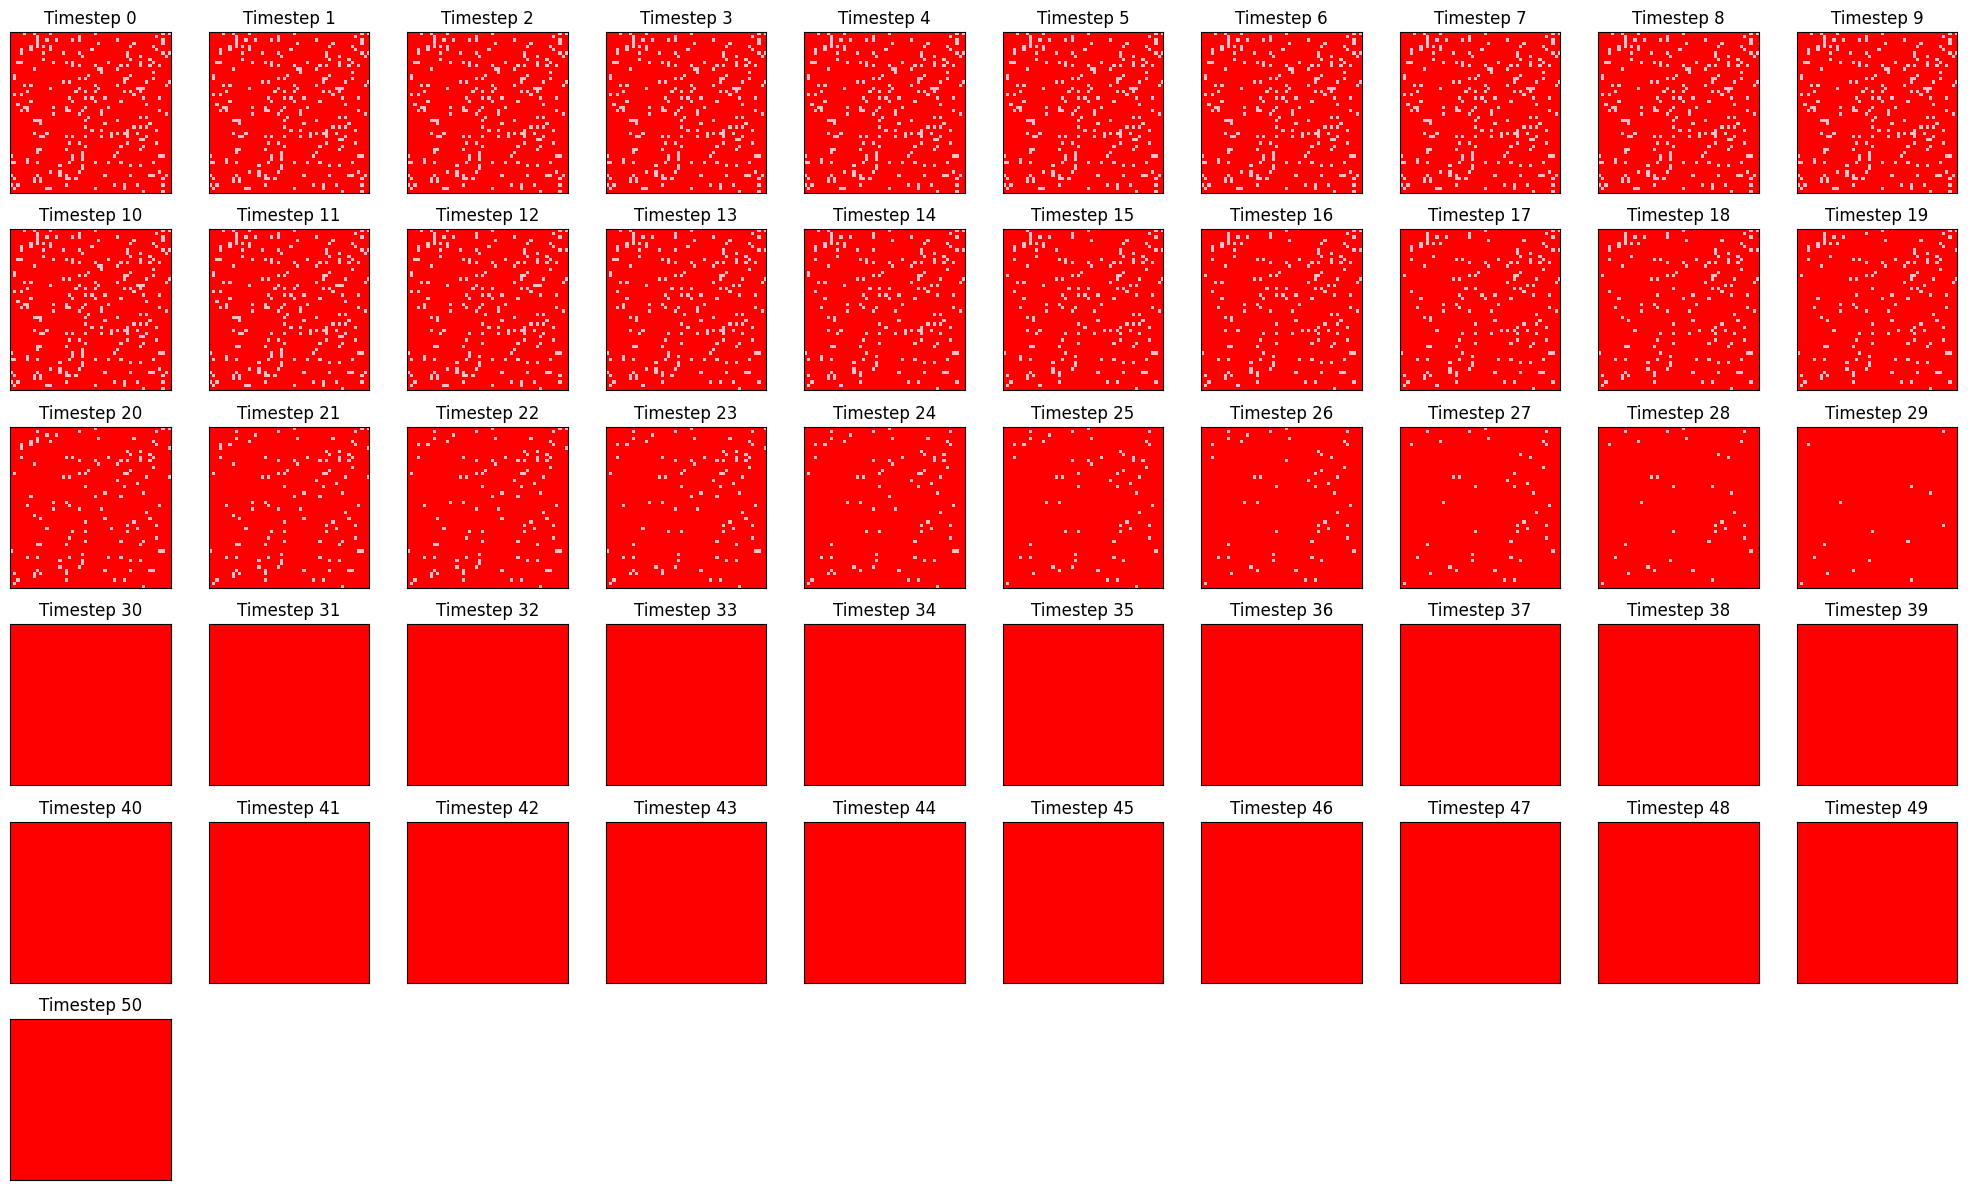

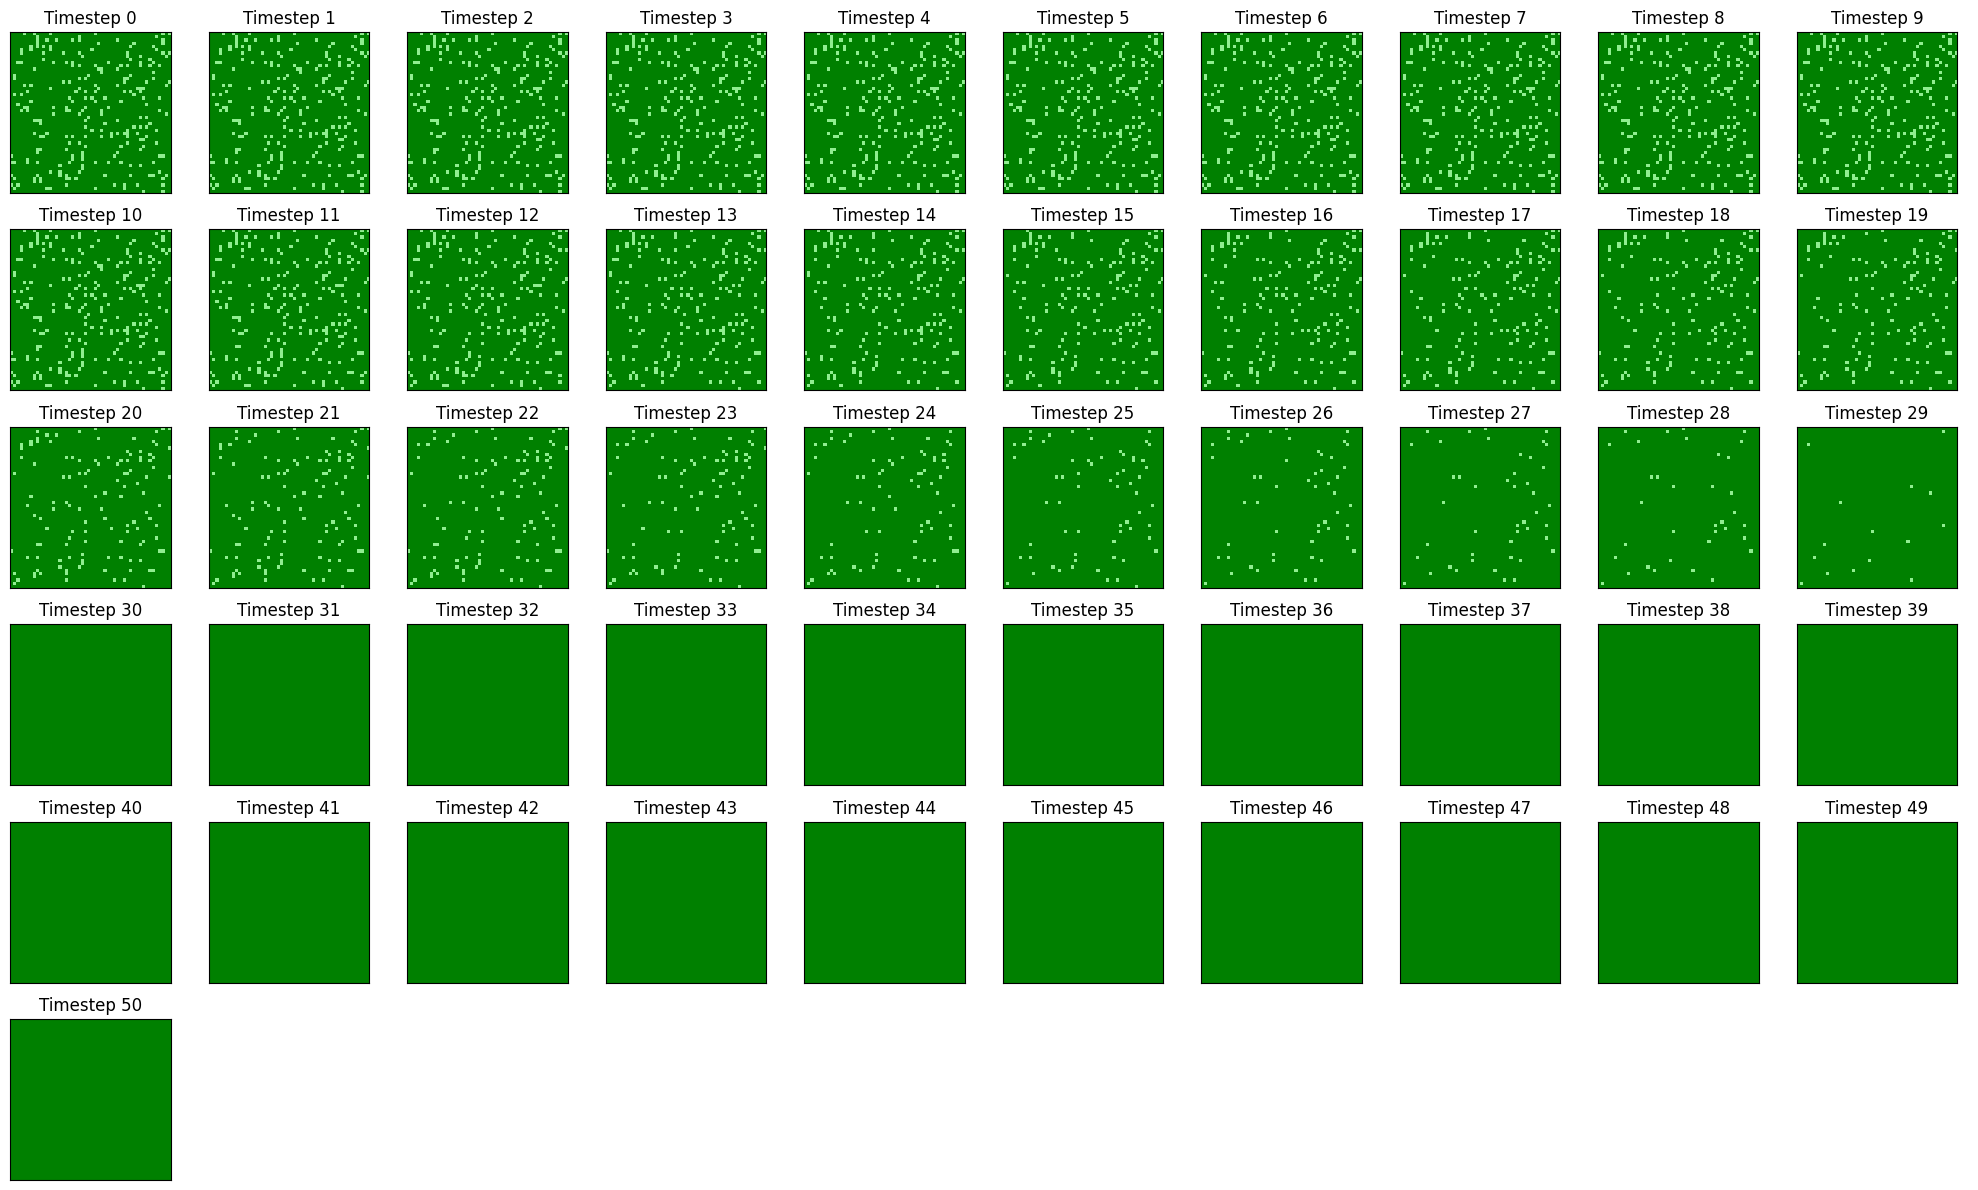

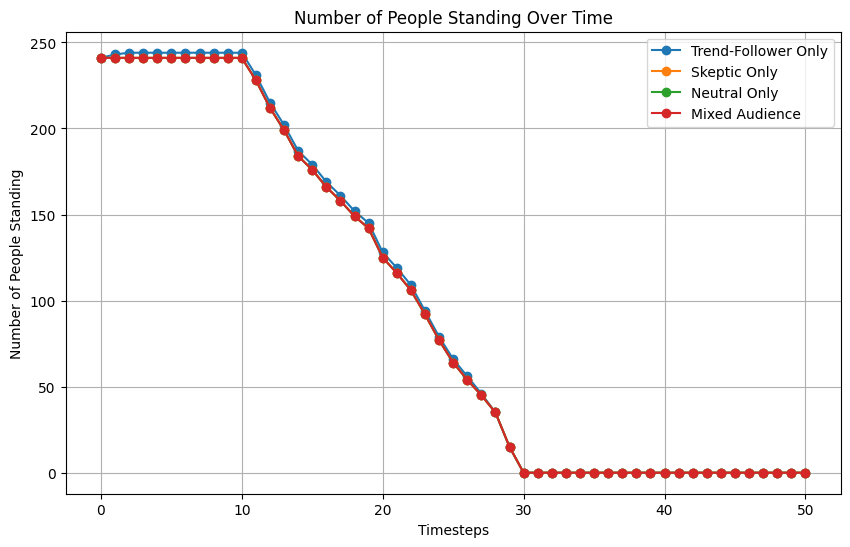

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_colormap():
    from matplotlib.colors import ListedColormap
    colors = ['blue', 'red', 'green', 'lightblue', 'pink', 'lightgreen']  # Seated/Standing for Trend-Follower, Skeptic, Neutral
    return ListedColormap(colors)

def simulate_standing_ovation(grid_size, audience_types, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality):
    grid = initial_standing.copy()
    history = [grid.copy()]
    standing_counts = [np.sum(grid)]

    # Track how long each agent has been standing
    standing_time = np.zeros((grid_size, grid_size))

    for t in range(max_iters):
        new_grid = grid.copy()
        new_standing_time = standing_time.copy()

        for x in range(grid_size):
            for y in range(grid_size):
                neighbors = grid[max(0, x-1):min(grid_size, x+2), max(0, y-1):min(grid_size, y+2)]
                neighbor_count = (neighbors.size - 1)  # Total neighbors excluding center
                neighbor_sum = np.sum(neighbors) - grid[x, y]  # Exclude center cell
                neighbor_influence = neighbor_sum / neighbor_count if neighbor_count > 0 else 0

                visible = [
                    grid[i, j]
                    for i in range(max(0, x-6))
                    for j in range(max(0, y-abs(x-i)), min(grid_size, y+abs(x-i)+1))
                    if (i, j) != (x, y)
                ]
                visible_influence = np.mean(visible) if visible else 0

                influence = influence_factors[audience_types[x, y]] * (neighbor_influence + visible_influence) * performance_quality

                if not grid[x, y]:  # Currently sitting
                    if influence > 0.5 and new_standing_time[x, y] == 0:  # Stand up threshold
                        new_grid[x, y] = True
                        new_standing_time[x, y] = 0
                else:  # Currently standing
                    new_standing_time[x, y] += 1

                    if new_standing_time[x, y] > sitting_tendency[x, y] / performance_quality:
                        new_grid[x, y] = False  # Sit down permanently
                        new_standing_time[x, y] = -1  # Mark as permanently seated

        grid = new_grid
        standing_time = new_standing_time
        history.append(grid.copy())
        standing_counts.append(np.sum(grid))

    return history, standing_counts

def plot_heatmaps(history, audience_types):
    colormap = get_colormap()
    steps_to_plot = len(history)
    cols = 10  # Number of columns in the plot grid
    rows = (steps_to_plot + cols - 1) // cols  # Number of rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(20, 2 * rows))
    axes = axes.flatten()

    for i, grid in enumerate(history):
        ax = axes[i]
        # Map grid and audience types to color indices
        visual_grid = np.zeros_like(grid, dtype=int)
        for x in range(grid.shape[0]):
            for y in range(grid.shape[1]):
                if grid[x, y]:
                    if audience_types[x, y] == 'trend-follower':
                        visual_grid[x, y] = 3  # Light blue
                    elif audience_types[x, y] == 'skeptic':
                        visual_grid[x, y] = 4  # Pink
                    elif audience_types[x, y] == 'neutral':
                        visual_grid[x, y] = 5  # Light green
                else:
                    if audience_types[x, y] == 'trend-follower':
                        visual_grid[x, y] = 0  # Blue
                    elif audience_types[x, y] == 'skeptic':
                        visual_grid[x, y] = 1  # Red
                    elif audience_types[x, y] == 'neutral':
                        visual_grid[x, y] = 2  # Green

        im = ax.imshow(visual_grid, cmap=colormap, vmin=0, vmax=5)
        ax.set_title(f'Timestep {i}')
        ax.set_xticks([])
        ax.set_yticks([])
        # Add solid gridlines
        ax.grid(visible=True, color="black", linestyle="-", linewidth=0.5)
        ax.set_xticks(np.arange(-0.5, grid.shape[1], 1), minor=True)
        ax.set_yticks(np.arange(-0.5, grid.shape[0], 1), minor=True)
        ax.tick_params(which="minor", length=0)

    for ax in axes[len(history):]:
        ax.axis('off')  # Turn off unused axes

    plt.tight_layout()
    plt.show()

def plot_standing_counts(standing_counts_list, labels):
    plt.figure(figsize=(10, 6))
    for counts, label in zip(standing_counts_list, labels):
        plt.plot(counts, marker='o', linestyle='-', label=label)
    plt.title('Number of People Standing Over Time')
    plt.xlabel('Timesteps')
    plt.ylabel('Number of People Standing')
    plt.legend()
    plt.grid(True)
    plt.show()

# Simulation for mixed personalities
grid_size = 50
max_iters = 50
initial_standing = np.random.choice([True, False], size=(grid_size, grid_size), p=[0.1, 0.9])
sitting_tendency = np.random.uniform(5, 15, size=(grid_size, grid_size))  # Random sitting tendencies
performance_quality = 0.5 # poor performance

# Mixed audience types
audience_types_mixed = np.random.choice(['trend-follower', 'skeptic', 'neutral'], size=(grid_size, grid_size), p=[0.3, 0.3, 0.4])
audience_types_trend = np.full((grid_size, grid_size), 'trend-follower')
audience_types_skeptic = np.full((grid_size, grid_size), 'skeptic')
audience_types_neutral = np.full((grid_size, grid_size), 'neutral')

influence_factors = {
    'trend-follower': 1.5,
    'skeptic': 0.5,
    'neutral': 1.0
}

# Run simulations
history_mixed, standing_counts_mixed = simulate_standing_ovation(
    grid_size, audience_types_mixed, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_trend, standing_counts_trend = simulate_standing_ovation(
    grid_size, audience_types_trend, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_skeptic, standing_counts_skeptic = simulate_standing_ovation(
    grid_size, audience_types_skeptic, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_neutral, standing_counts_neutral = simulate_standing_ovation(
    grid_size, audience_types_neutral, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

# Plot results for mixed audience
print("\nSimulation for Mixed Personalities:")
plot_heatmaps(history_mixed, audience_types_mixed)
plot_heatmaps(history_trend, audience_types_trend)
plot_heatmaps(history_skeptic, audience_types_skeptic)
plot_heatmaps(history_neutral, audience_types_neutral)

# Plot standing counts comparison
plot_standing_counts(
    [standing_counts_trend, standing_counts_skeptic, standing_counts_neutral, standing_counts_mixed],
    ['Trend-Follower Only', 'Skeptic Only', 'Neutral Only', 'Mixed Audience']
)

data = {
    "Timestep": list(range(max_iters + 1)),
    "Trend-Follower Only": standing_counts_trend,
    "Skeptic Only": standing_counts_skeptic,
    "Neutral Only": standing_counts_neutral,
    "Mixed Audience": standing_counts_mixed
}
df = pd.DataFrame(data)

# Save the results to a CSV file
csv_path = "standing_ovation_results_low_performance_combined.csv"
df.to_csv(csv_path, index=False)


##### Discussion: As expected if it was a low performance, but the trend-follower is a bit higher compared with the other group but does not give a significant insight

##### Average Performance


Simulation for Mixed Personalities:


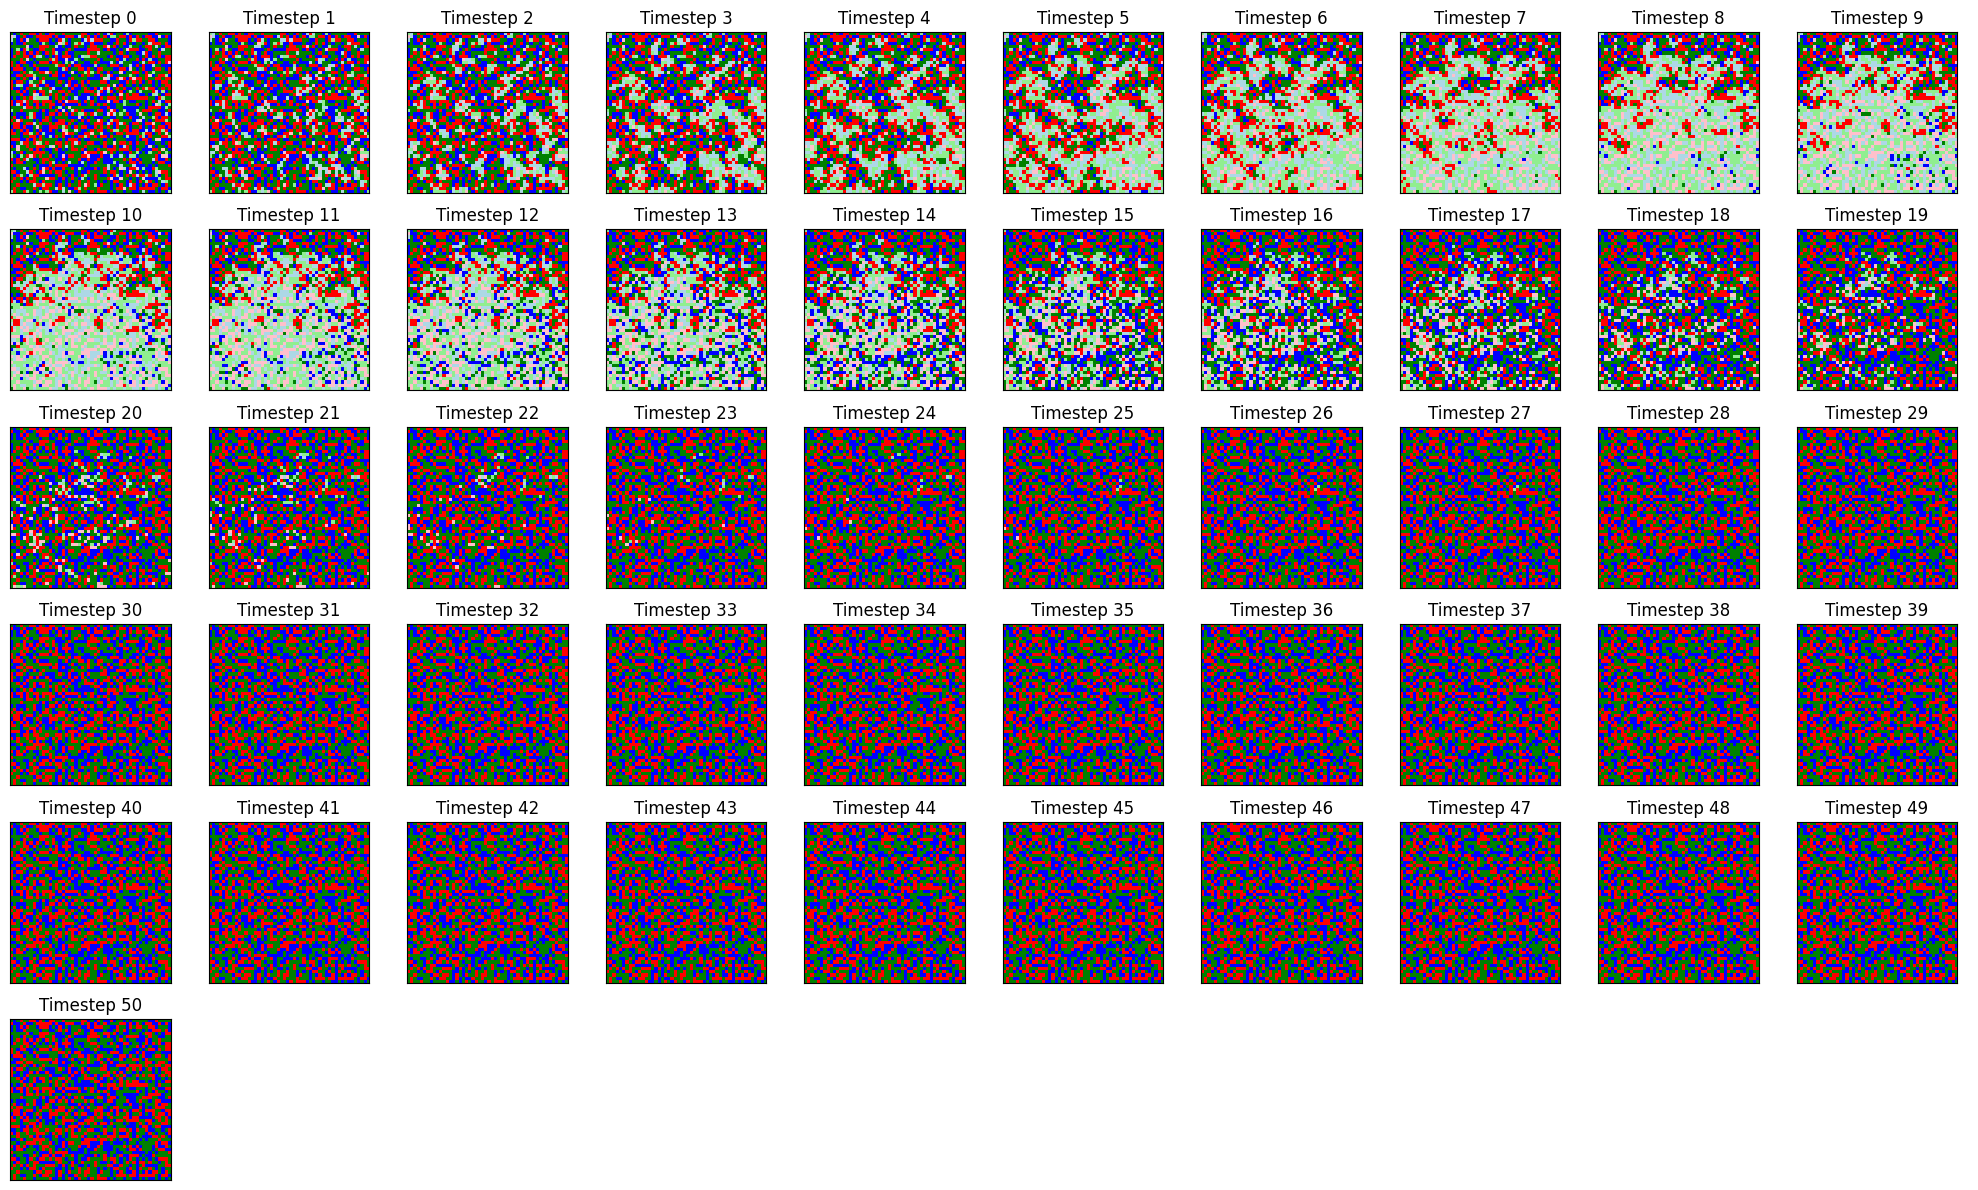

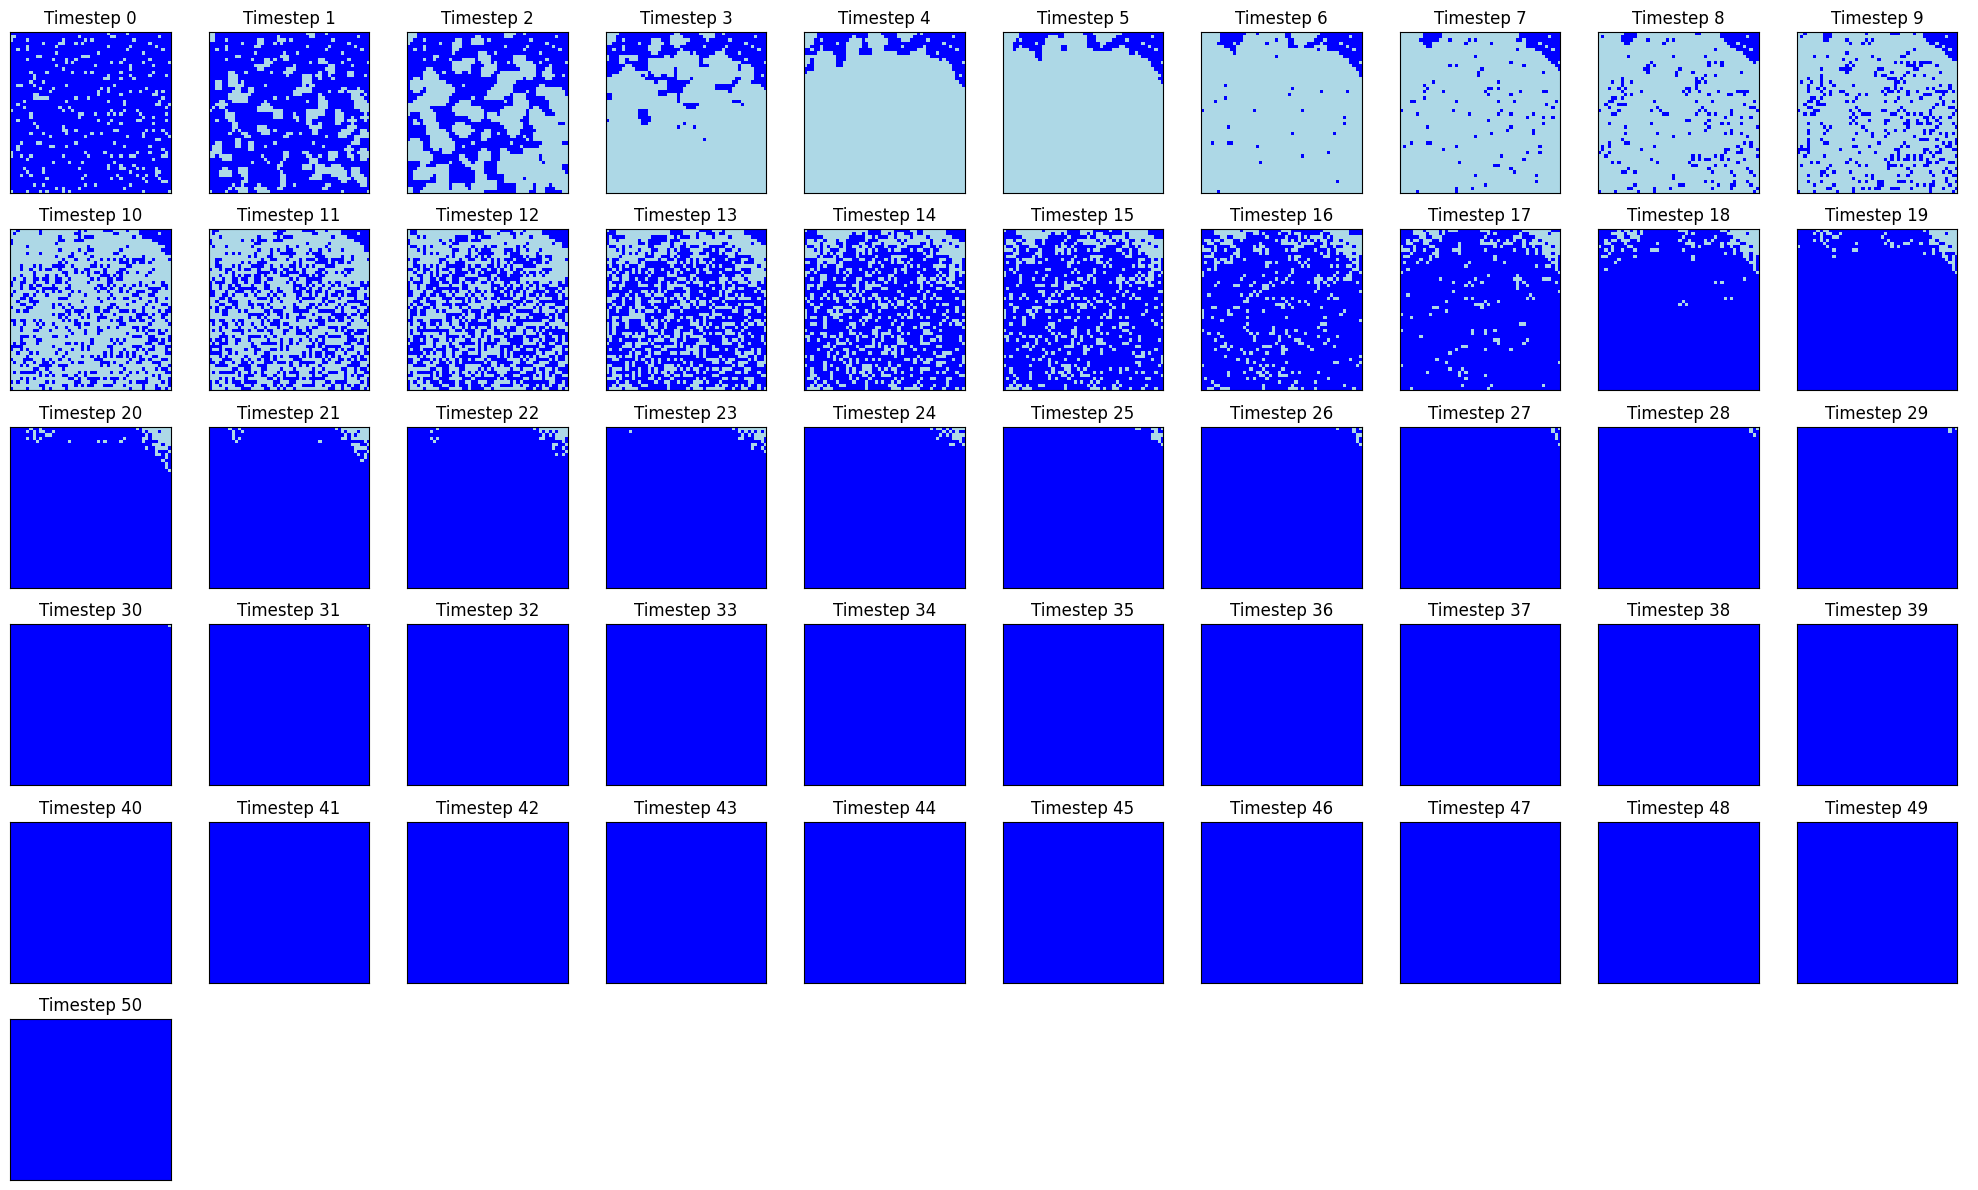

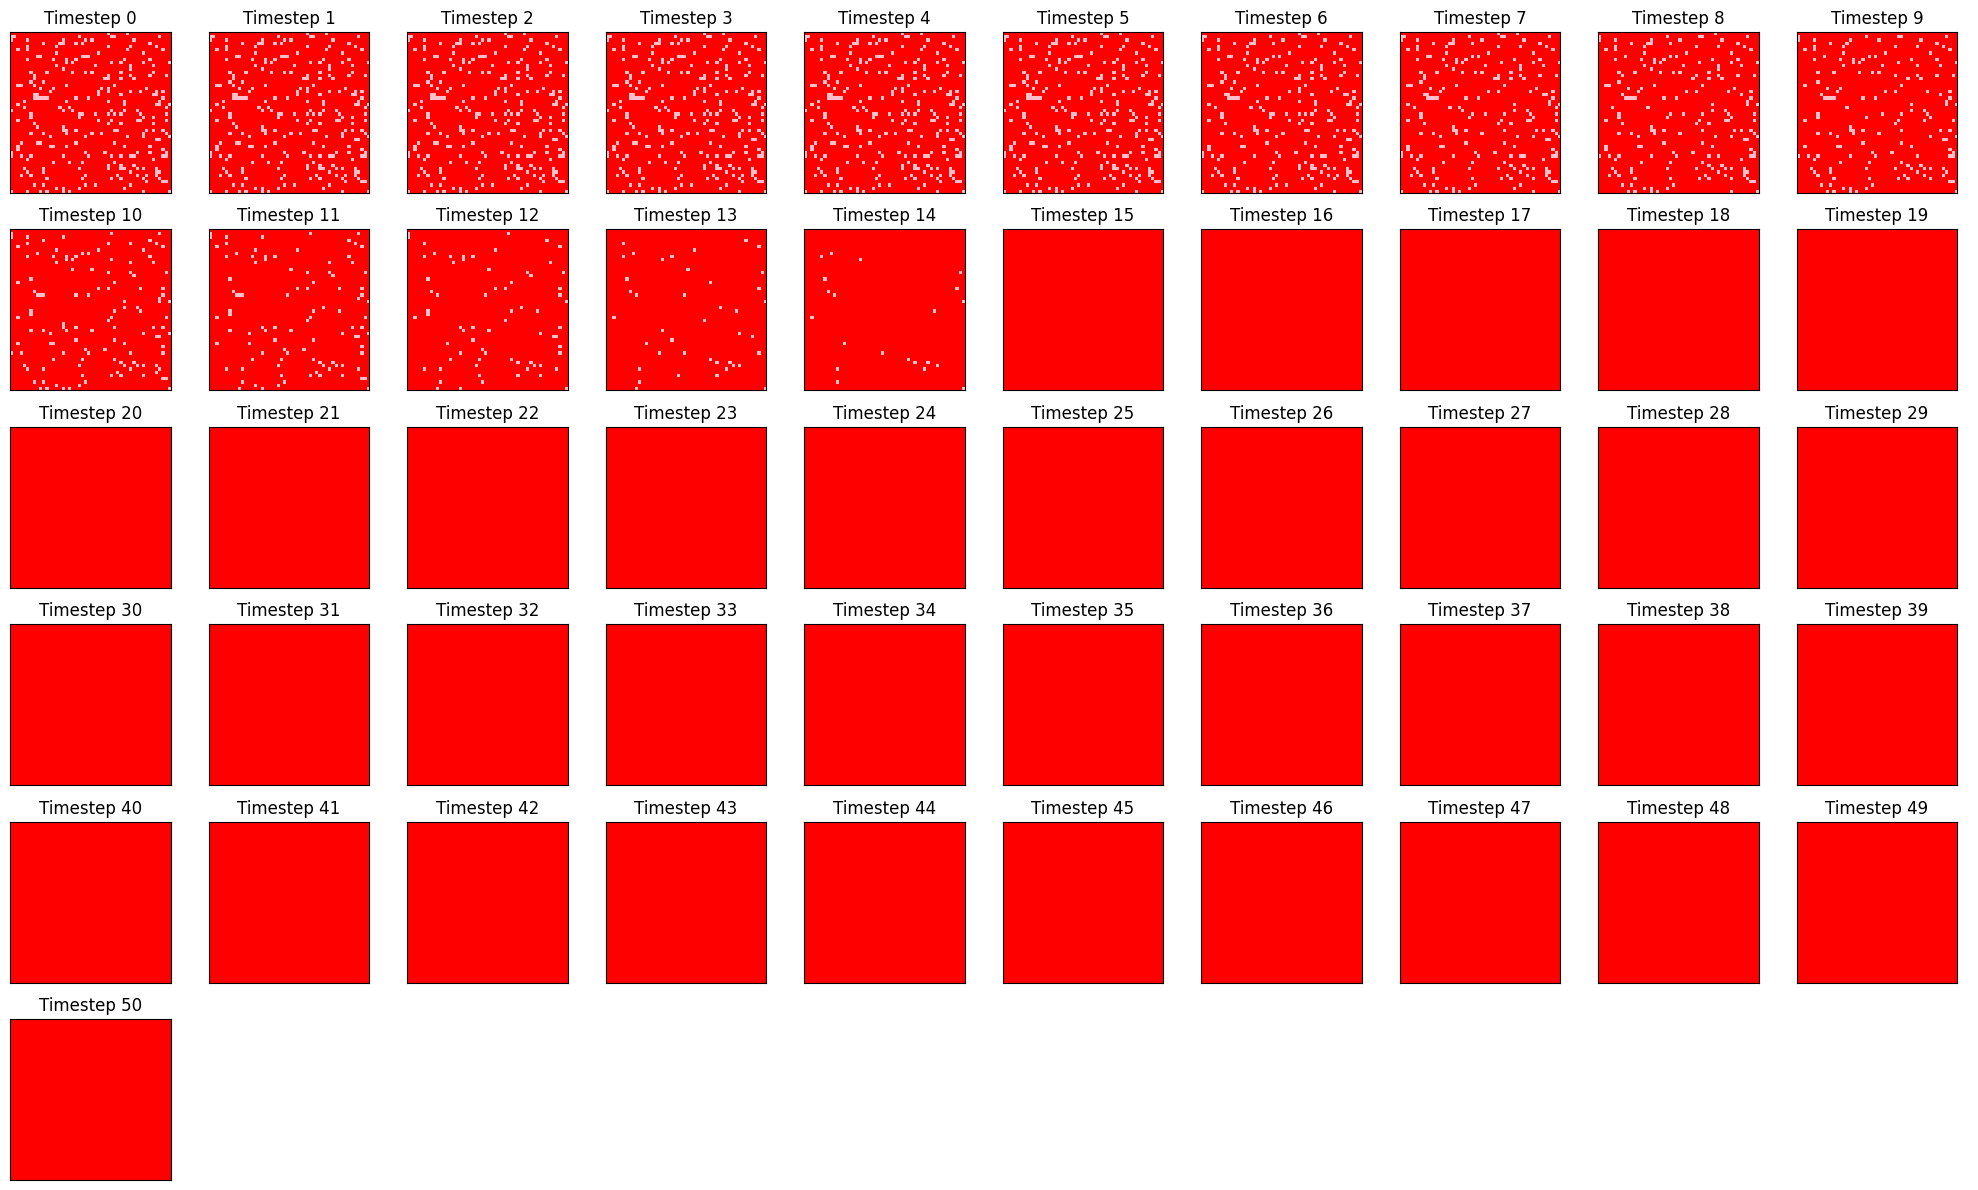

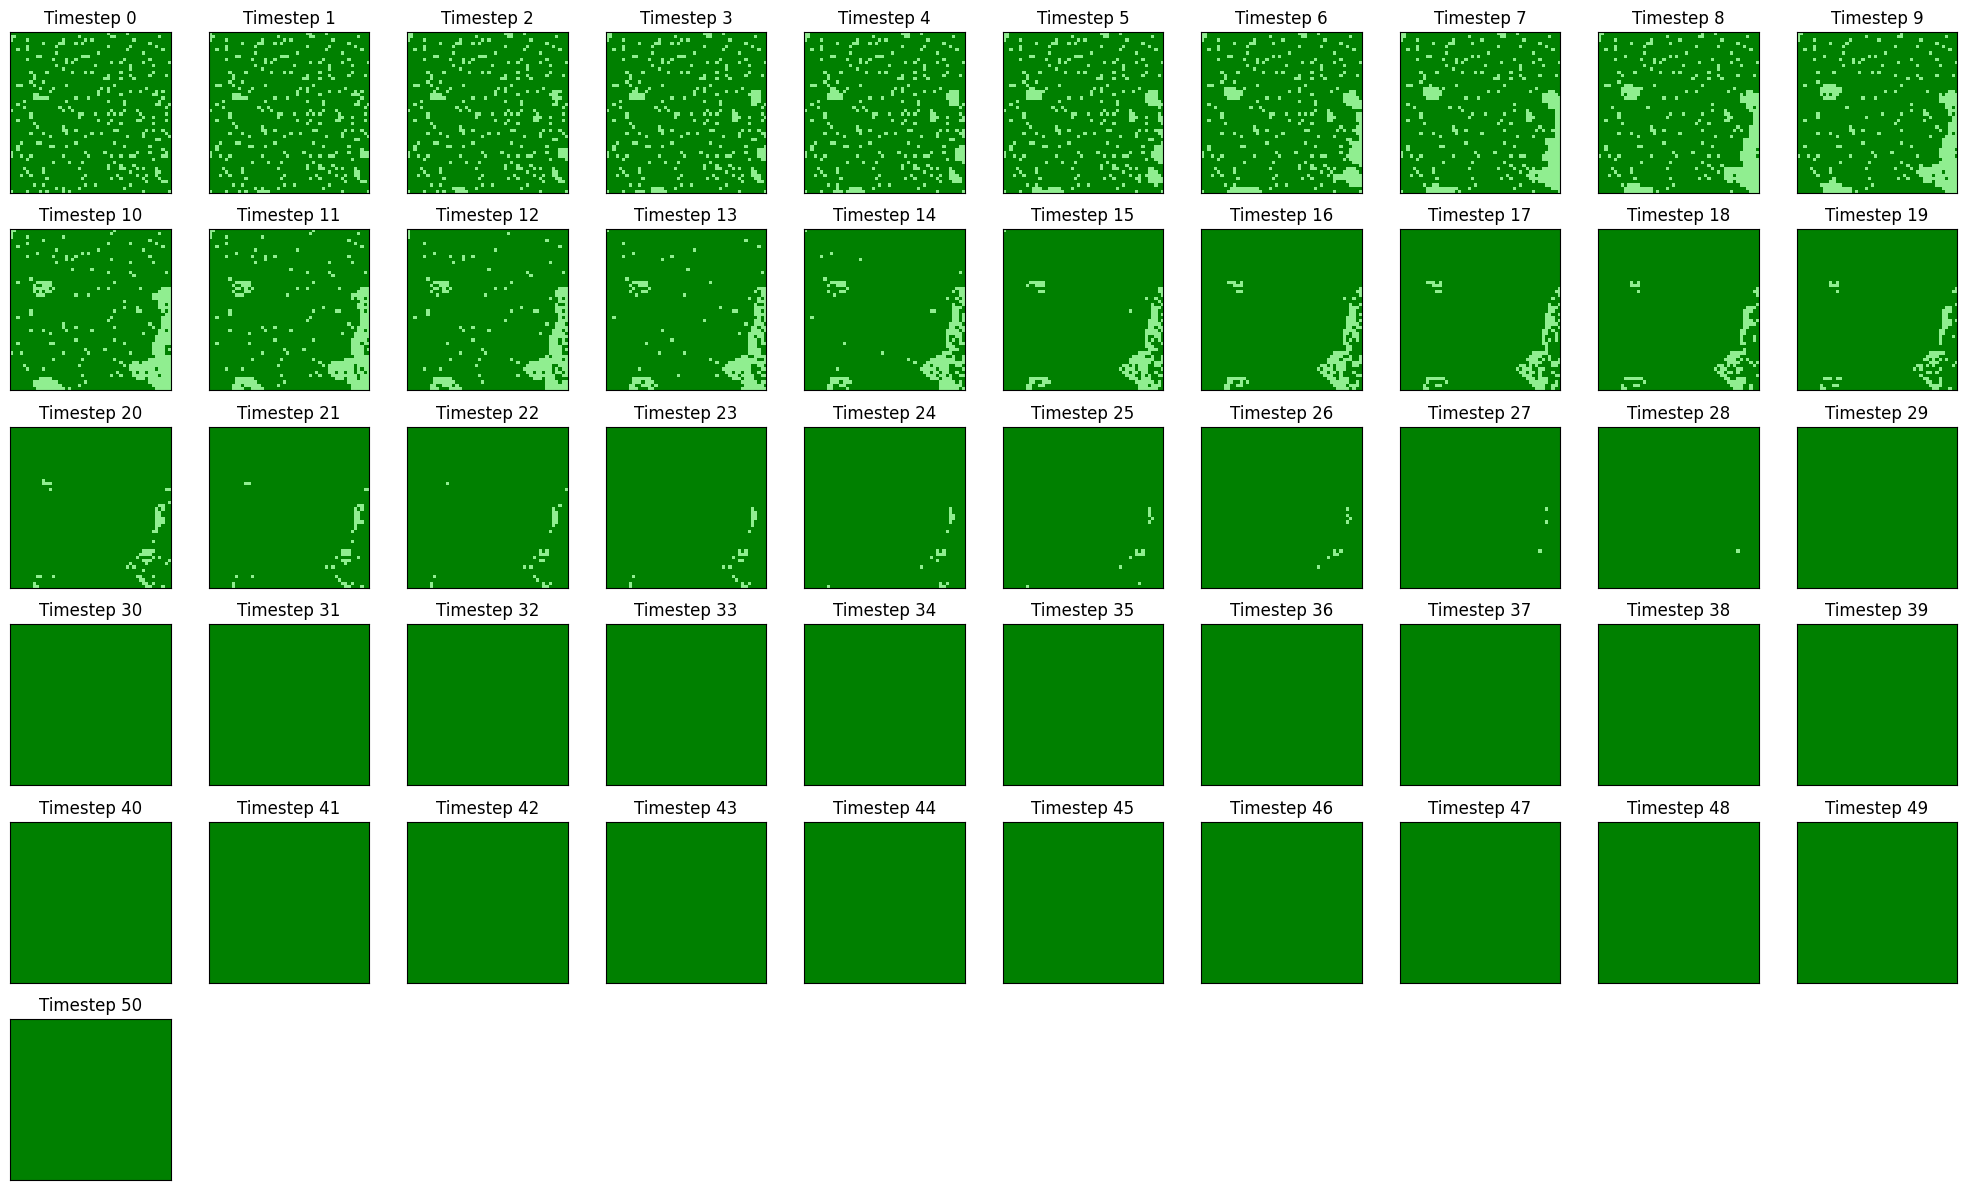

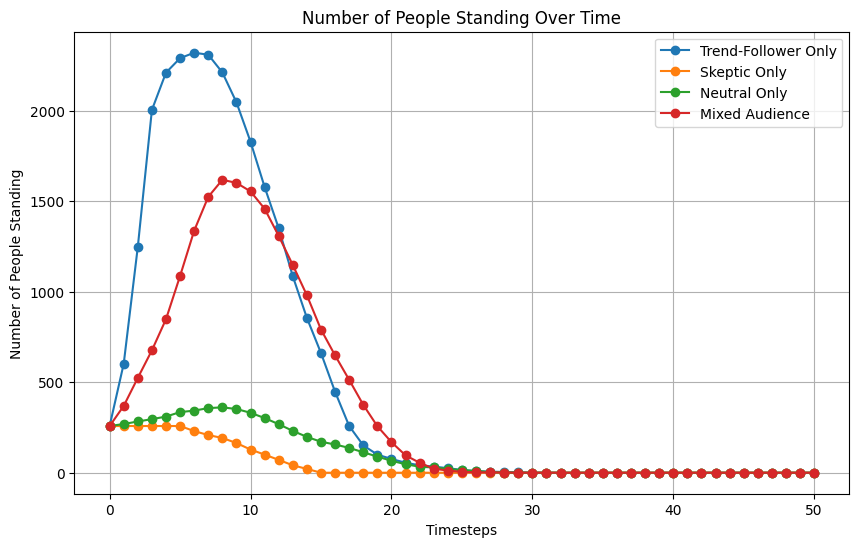

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_colormap():
    from matplotlib.colors import ListedColormap
    colors = ['blue', 'red', 'green', 'lightblue', 'pink', 'lightgreen']  # Seated/Standing for Trend-Follower, Skeptic, Neutral
    return ListedColormap(colors)

def simulate_standing_ovation(grid_size, audience_types, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality):
    grid = initial_standing.copy()
    history = [grid.copy()]
    standing_counts = [np.sum(grid)]

    # Track how long each agent has been standing
    standing_time = np.zeros((grid_size, grid_size))

    for t in range(max_iters):
        new_grid = grid.copy()
        new_standing_time = standing_time.copy()

        for x in range(grid_size):
            for y in range(grid_size):
                neighbors = grid[max(0, x-1):min(grid_size, x+2), max(0, y-1):min(grid_size, y+2)]
                neighbor_count = (neighbors.size - 1)  # Total neighbors excluding center
                neighbor_sum = np.sum(neighbors) - grid[x, y]  # Exclude center cell
                neighbor_influence = neighbor_sum / neighbor_count if neighbor_count > 0 else 0

                visible = [
                    grid[i, j]
                    for i in range(max(0, x-6))
                    for j in range(max(0, y-abs(x-i)), min(grid_size, y+abs(x-i)+1))
                    if (i, j) != (x, y)
                ]
                visible_influence = np.mean(visible) if visible else 0

                influence = influence_factors[audience_types[x, y]] * (neighbor_influence + visible_influence) * performance_quality

                if not grid[x, y]:  # Currently sitting
                    if influence > 0.5 and new_standing_time[x, y] == 0:  # Stand up threshold
                        new_grid[x, y] = True
                        new_standing_time[x, y] = 0
                else:  # Currently standing
                    new_standing_time[x, y] += 1

                    if new_standing_time[x, y] > sitting_tendency[x, y] / performance_quality:
                        new_grid[x, y] = False  # Sit down permanently
                        new_standing_time[x, y] = -1  # Mark as permanently seated

        grid = new_grid
        standing_time = new_standing_time
        history.append(grid.copy())
        standing_counts.append(np.sum(grid))

    return history, standing_counts

def plot_heatmaps(history, audience_types):
    colormap = get_colormap()
    steps_to_plot = len(history)
    cols = 10  # Number of columns in the plot grid
    rows = (steps_to_plot + cols - 1) // cols  # Number of rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(20, 2 * rows))
    axes = axes.flatten()

    for i, grid in enumerate(history):
        ax = axes[i]
        # Map grid and audience types to color indices
        visual_grid = np.zeros_like(grid, dtype=int)
        for x in range(grid.shape[0]):
            for y in range(grid.shape[1]):
                if grid[x, y]:
                    if audience_types[x, y] == 'trend-follower':
                        visual_grid[x, y] = 3  # Light blue
                    elif audience_types[x, y] == 'skeptic':
                        visual_grid[x, y] = 4  # Pink
                    elif audience_types[x, y] == 'neutral':
                        visual_grid[x, y] = 5  # Light green
                else:
                    if audience_types[x, y] == 'trend-follower':
                        visual_grid[x, y] = 0  # Blue
                    elif audience_types[x, y] == 'skeptic':
                        visual_grid[x, y] = 1  # Red
                    elif audience_types[x, y] == 'neutral':
                        visual_grid[x, y] = 2  # Green

        im = ax.imshow(visual_grid, cmap=colormap, vmin=0, vmax=5)
        ax.set_title(f'Timestep {i}')
        ax.set_xticks([])
        ax.set_yticks([])
        # Add solid gridlines
        ax.grid(visible=True, color="black", linestyle="-", linewidth=0.5)
        ax.set_xticks(np.arange(-0.5, grid.shape[1], 1), minor=True)
        ax.set_yticks(np.arange(-0.5, grid.shape[0], 1), minor=True)
        ax.tick_params(which="minor", length=0)

    for ax in axes[len(history):]:
        ax.axis('off')  # Turn off unused axes

    plt.tight_layout()
    plt.show()

def plot_standing_counts(standing_counts_list, labels):
    plt.figure(figsize=(10, 6))
    for counts, label in zip(standing_counts_list, labels):
        plt.plot(counts, marker='o', linestyle='-', label=label)
    plt.title('Number of People Standing Over Time')
    plt.xlabel('Timesteps')
    plt.ylabel('Number of People Standing')
    plt.legend()
    plt.grid(True)
    plt.show()

# Simulation for mixed personalities
grid_size = 50
max_iters = 50
initial_standing = np.random.choice([True, False], size=(grid_size, grid_size), p=[0.1, 0.9])
sitting_tendency = np.random.uniform(5, 15, size=(grid_size, grid_size))  # Random sitting tendencies
performance_quality = 1 # average performance

# Mixed audience types
audience_types_mixed = np.random.choice(['trend-follower', 'skeptic', 'neutral'], size=(grid_size, grid_size), p=[0.3, 0.3, 0.4])
audience_types_trend = np.full((grid_size, grid_size), 'trend-follower')
audience_types_skeptic = np.full((grid_size, grid_size), 'skeptic')
audience_types_neutral = np.full((grid_size, grid_size), 'neutral')

influence_factors = {
    'trend-follower': 1.5,
    'skeptic': 0.5,
    'neutral': 1.0
}

# Run simulations
history_mixed, standing_counts_mixed = simulate_standing_ovation(
    grid_size, audience_types_mixed, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_trend, standing_counts_trend = simulate_standing_ovation(
    grid_size, audience_types_trend, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_skeptic, standing_counts_skeptic = simulate_standing_ovation(
    grid_size, audience_types_skeptic, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_neutral, standing_counts_neutral = simulate_standing_ovation(
    grid_size, audience_types_neutral, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

# Plot results for mixed audience
print("\nSimulation for Mixed Personalities:")
plot_heatmaps(history_mixed, audience_types_mixed)
plot_heatmaps(history_trend, audience_types_trend)
plot_heatmaps(history_skeptic, audience_types_skeptic)
plot_heatmaps(history_neutral, audience_types_neutral)

# Plot standing counts comparison
plot_standing_counts(
    [standing_counts_trend, standing_counts_skeptic, standing_counts_neutral, standing_counts_mixed],
    ['Trend-Follower Only', 'Skeptic Only', 'Neutral Only', 'Mixed Audience']
)

data = {
    "Timestep": list(range(max_iters + 1)),
    "Trend-Follower Only": standing_counts_trend,
    "Skeptic Only": standing_counts_skeptic,
    "Neutral Only": standing_counts_neutral,
    "Mixed Audience": standing_counts_mixed
}
df = pd.DataFrame(data)

# Save the results to a CSV file
csv_path = "standing_ovation_results_average_performance_combined.csv"
df.to_csv(csv_path, index=False)


##### Discussion: As expected if it was a average performance

##### High Performance


Simulation for Mixed Personalities:


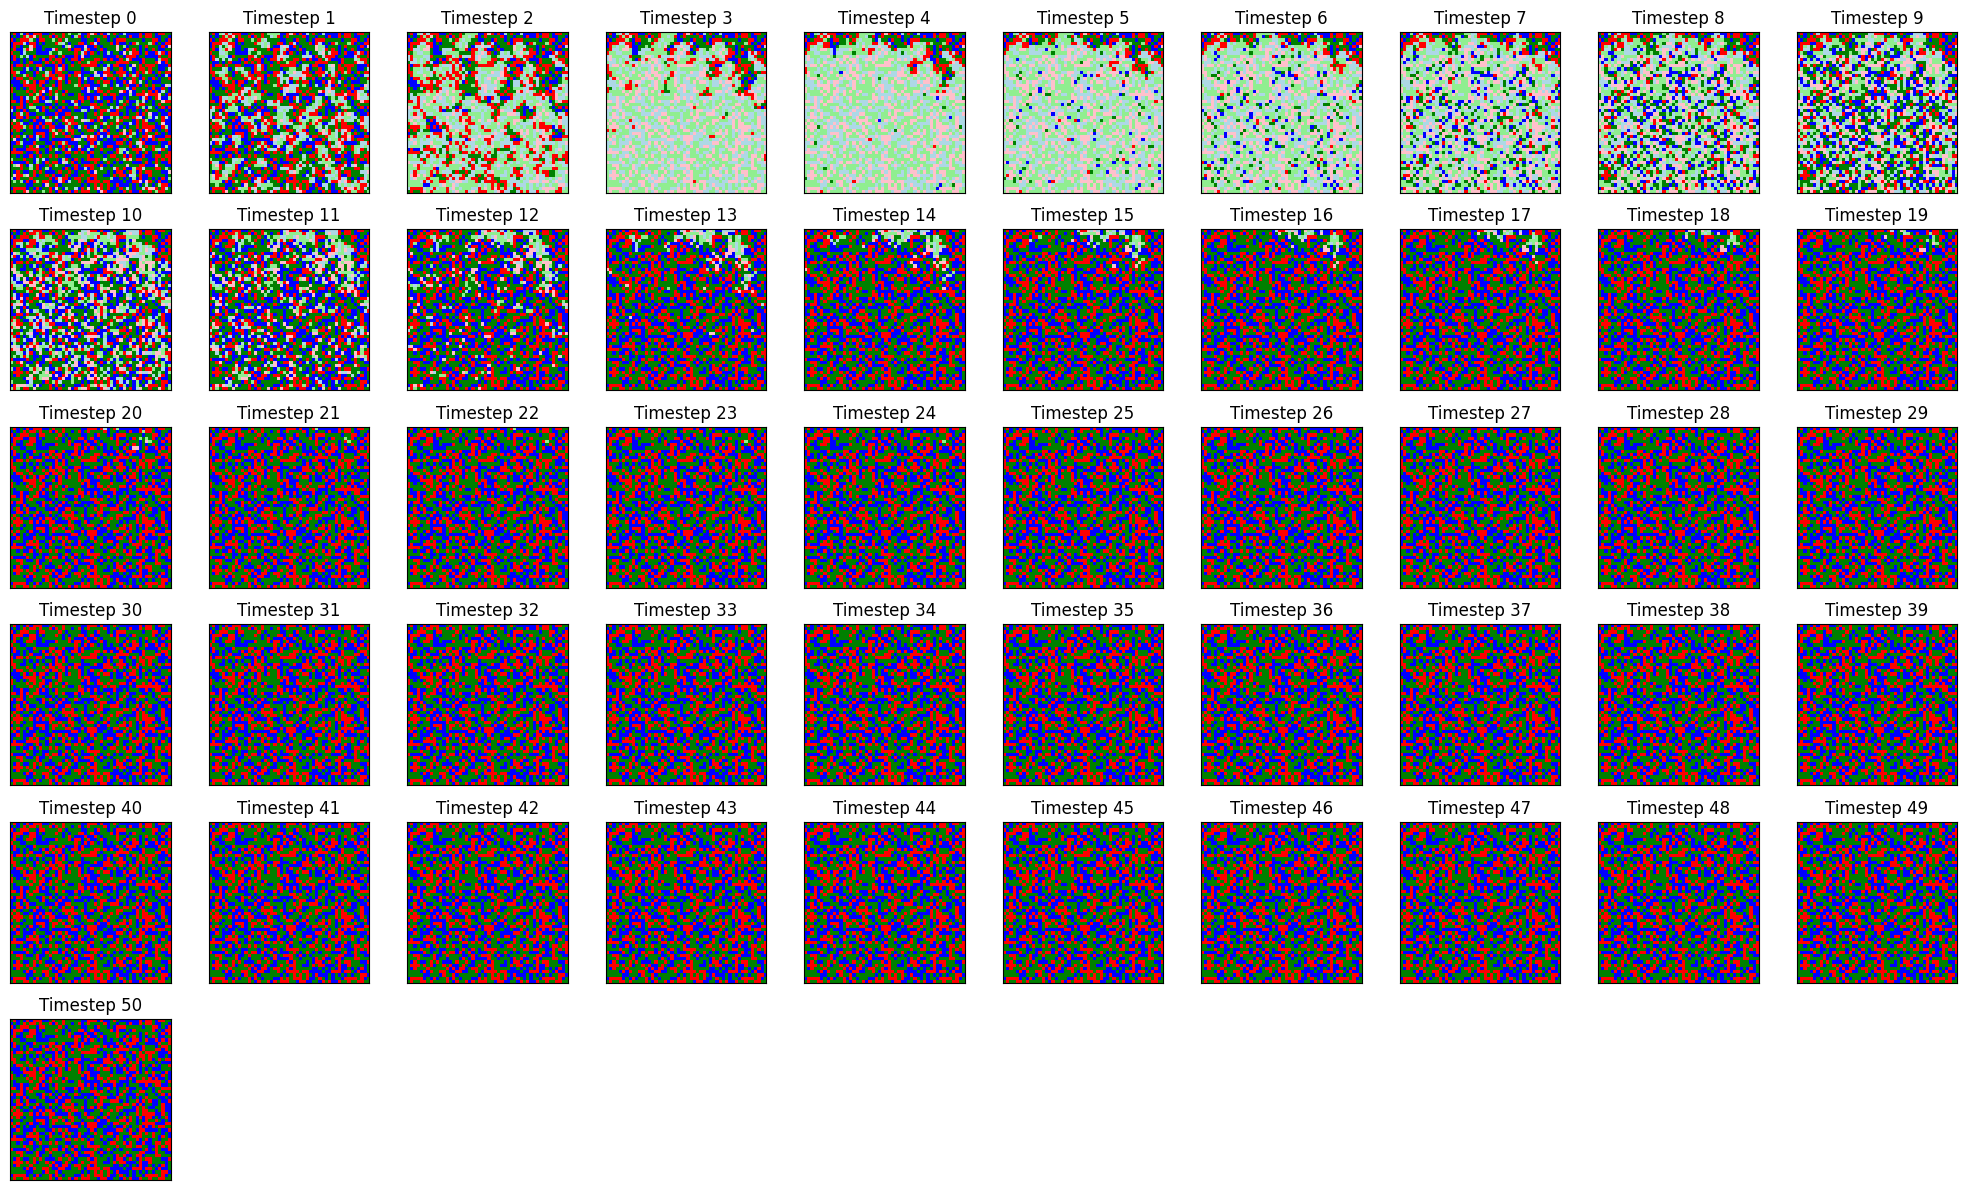

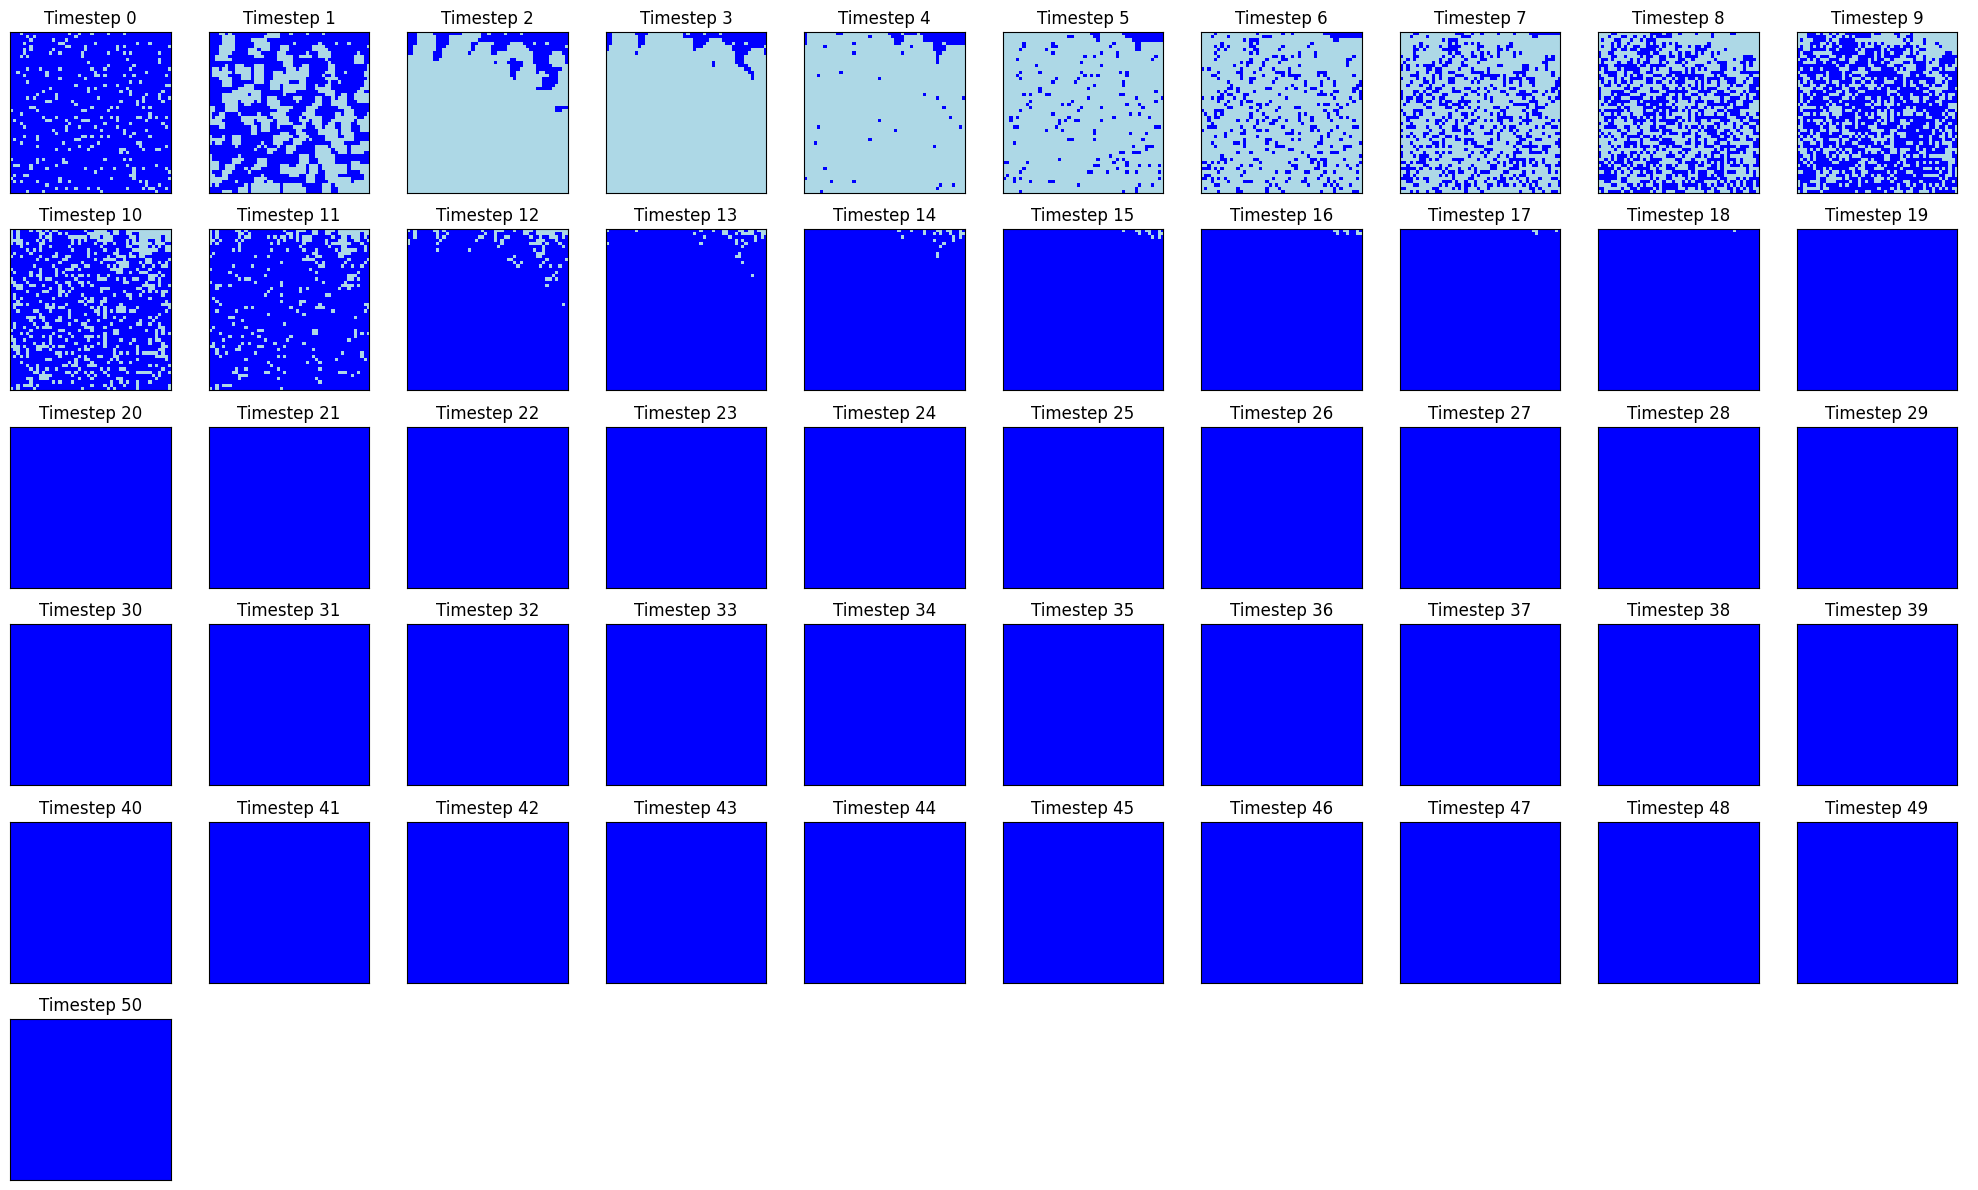

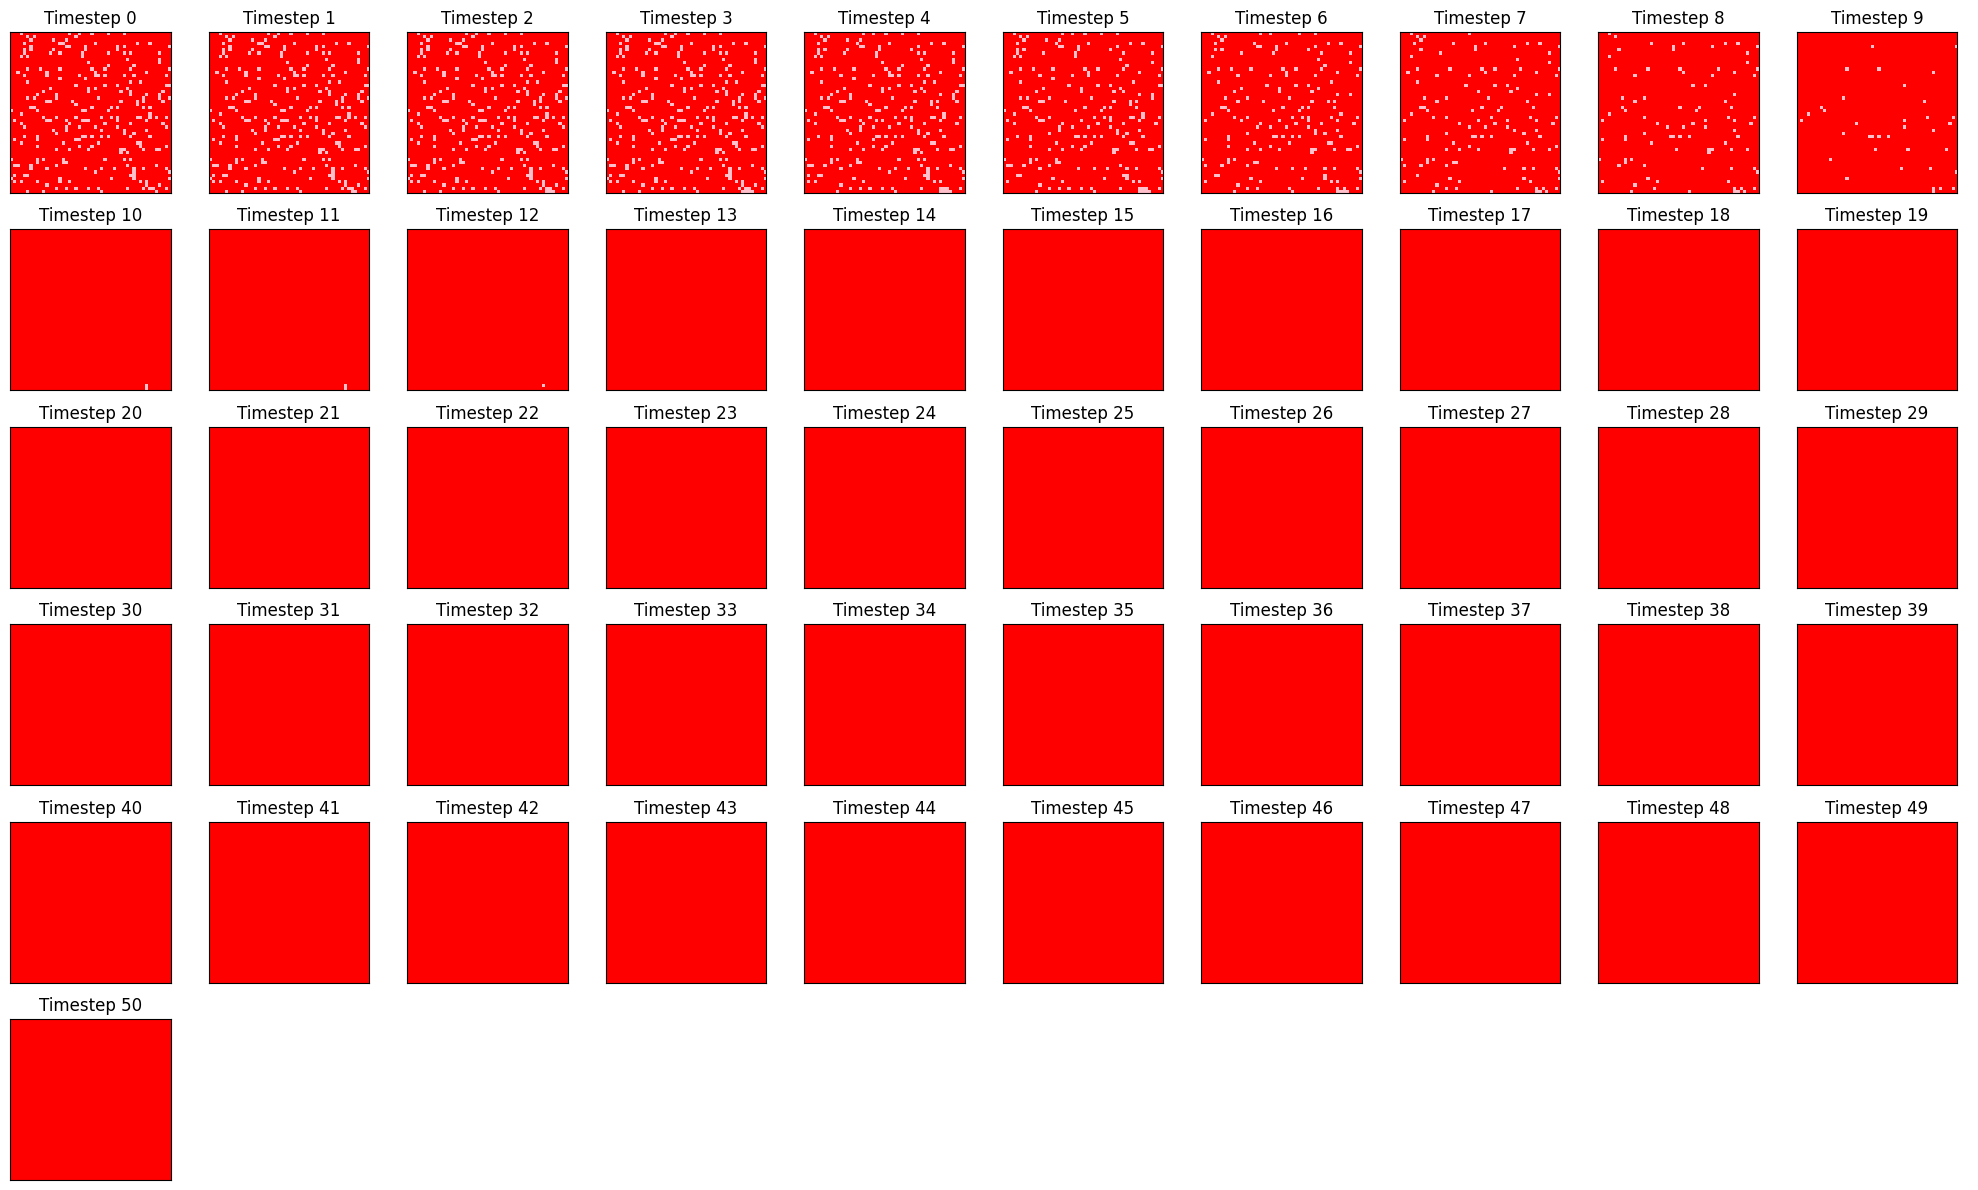

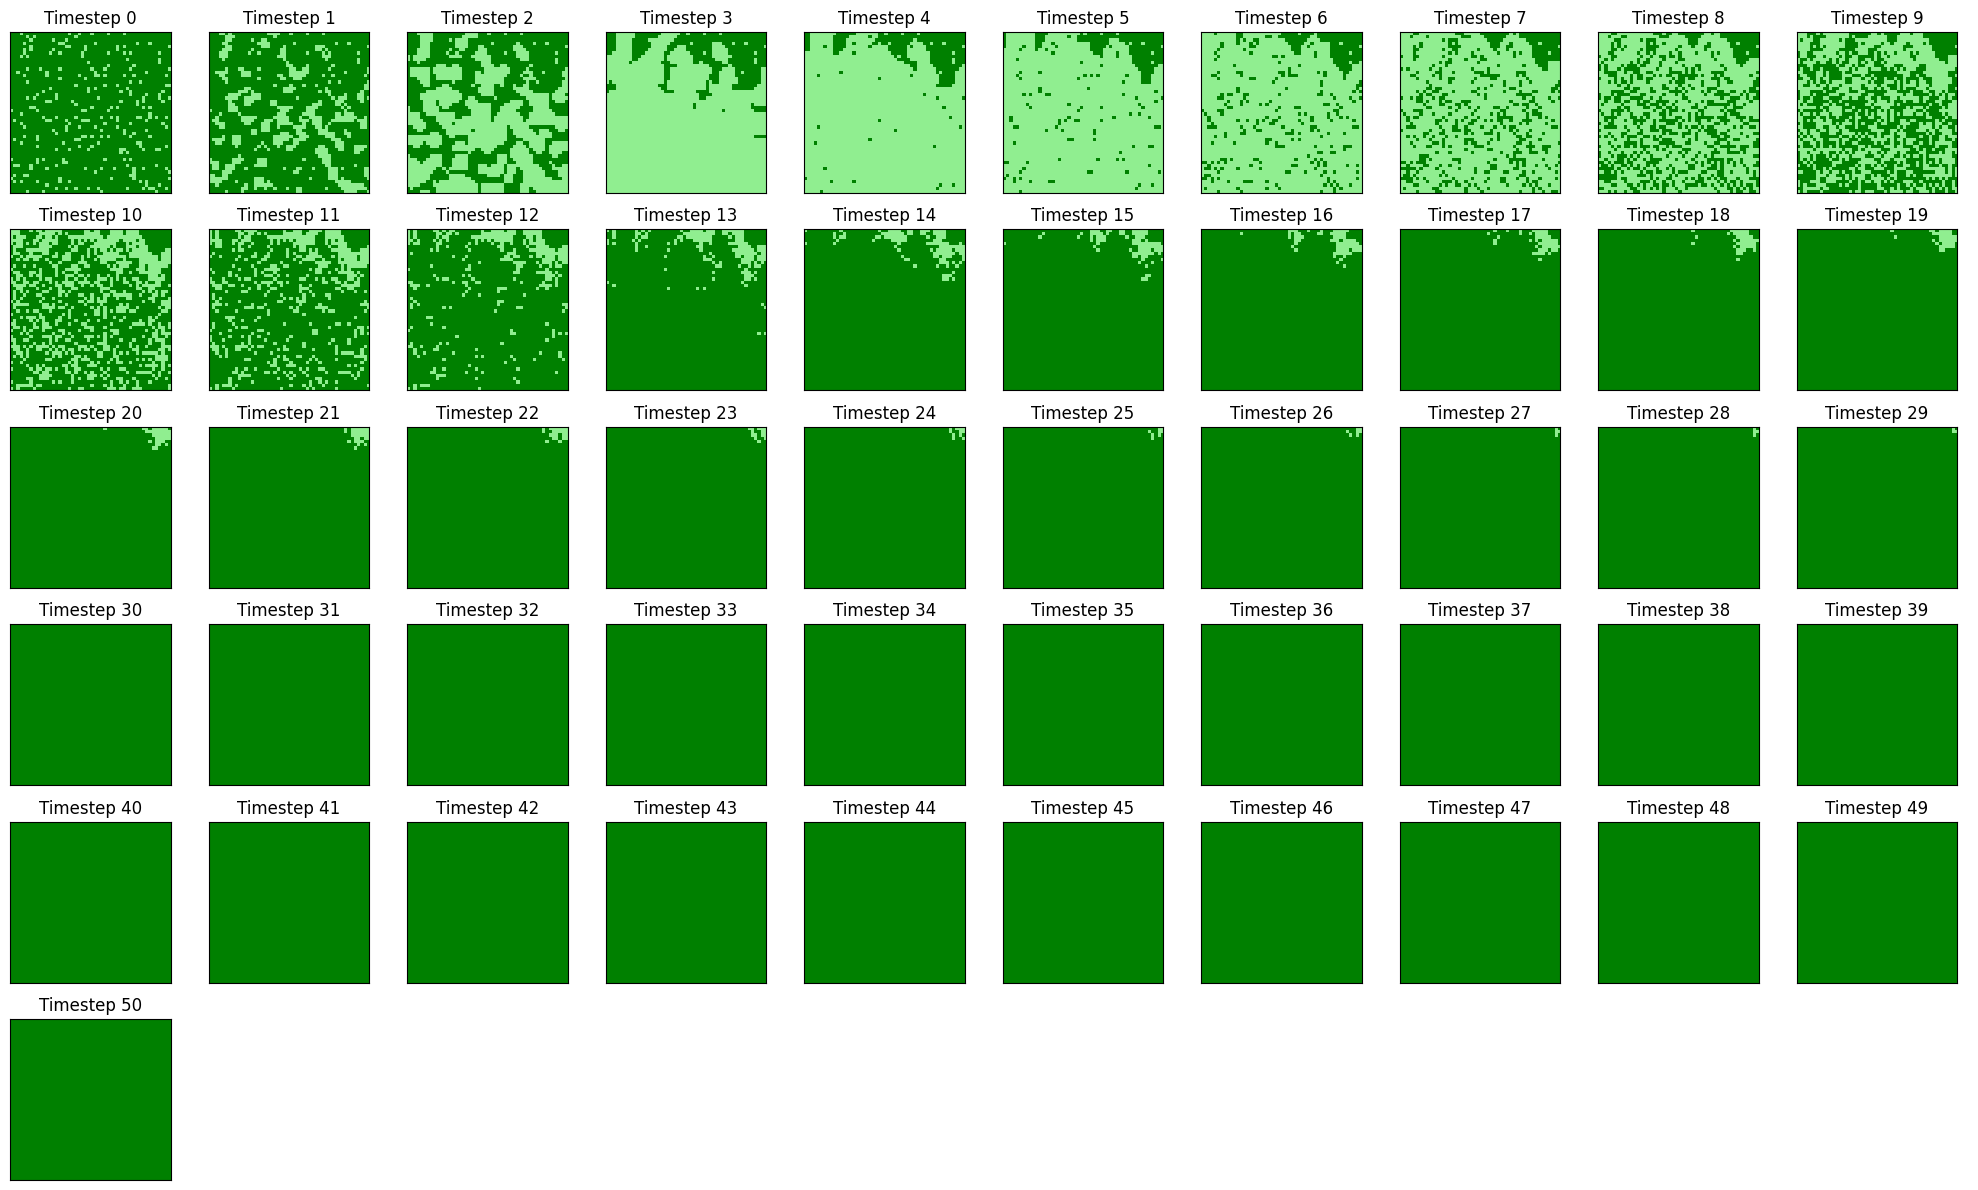

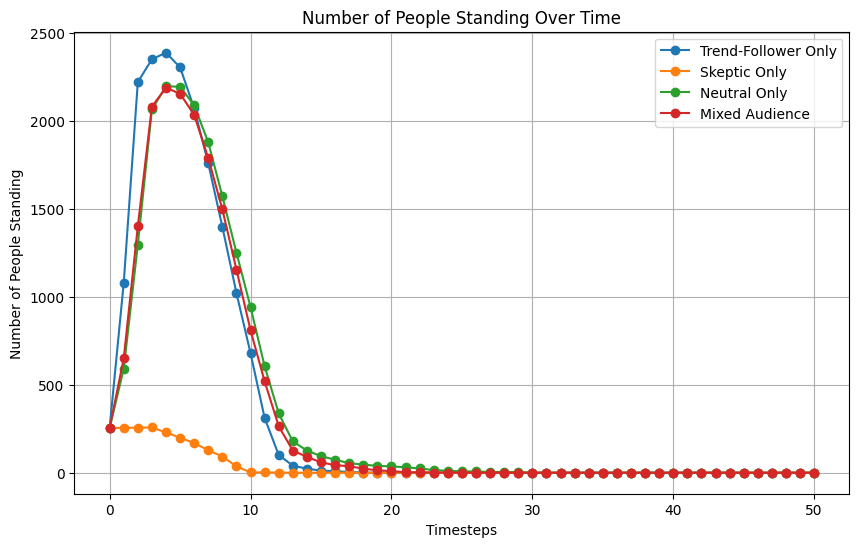

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_colormap():
    from matplotlib.colors import ListedColormap
    colors = ['blue', 'red', 'green', 'lightblue', 'pink', 'lightgreen']  # Seated/Standing for Trend-Follower, Skeptic, Neutral
    return ListedColormap(colors)

def simulate_standing_ovation(grid_size, audience_types, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality):
    grid = initial_standing.copy()
    history = [grid.copy()]
    standing_counts = [np.sum(grid)]

    # Track how long each agent has been standing
    standing_time = np.zeros((grid_size, grid_size))

    for t in range(max_iters):
        new_grid = grid.copy()
        new_standing_time = standing_time.copy()

        for x in range(grid_size):
            for y in range(grid_size):
                neighbors = grid[max(0, x-1):min(grid_size, x+2), max(0, y-1):min(grid_size, y+2)]
                neighbor_count = (neighbors.size - 1)  # Total neighbors excluding center
                neighbor_sum = np.sum(neighbors) - grid[x, y]  # Exclude center cell
                neighbor_influence = neighbor_sum / neighbor_count if neighbor_count > 0 else 0

                visible = [
                    grid[i, j]
                    for i in range(max(0, x-6))
                    for j in range(max(0, y-abs(x-i)), min(grid_size, y+abs(x-i)+1))
                    if (i, j) != (x, y)
                ]
                visible_influence = np.mean(visible) if visible else 0

                influence = influence_factors[audience_types[x, y]] * (neighbor_influence + visible_influence) * performance_quality

                if not grid[x, y]:  # Currently sitting
                    if influence > 0.5 and new_standing_time[x, y] == 0:  # Stand up threshold
                        new_grid[x, y] = True
                        new_standing_time[x, y] = 0
                else:  # Currently standing
                    new_standing_time[x, y] += 1

                    if new_standing_time[x, y] > sitting_tendency[x, y] / performance_quality:
                        new_grid[x, y] = False  # Sit down permanently
                        new_standing_time[x, y] = -1  # Mark as permanently seated

        grid = new_grid
        standing_time = new_standing_time
        history.append(grid.copy())
        standing_counts.append(np.sum(grid))

    return history, standing_counts

def plot_heatmaps(history, audience_types):
    colormap = get_colormap()
    steps_to_plot = len(history)
    cols = 10  # Number of columns in the plot grid
    rows = (steps_to_plot + cols - 1) // cols  # Number of rows needed

    fig, axes = plt.subplots(rows, cols, figsize=(20, 2 * rows))
    axes = axes.flatten()

    for i, grid in enumerate(history):
        ax = axes[i]
        # Map grid and audience types to color indices
        visual_grid = np.zeros_like(grid, dtype=int)
        for x in range(grid.shape[0]):
            for y in range(grid.shape[1]):
                if grid[x, y]:
                    if audience_types[x, y] == 'trend-follower':
                        visual_grid[x, y] = 3  # Light blue
                    elif audience_types[x, y] == 'skeptic':
                        visual_grid[x, y] = 4  # Pink
                    elif audience_types[x, y] == 'neutral':
                        visual_grid[x, y] = 5  # Light green
                else:
                    if audience_types[x, y] == 'trend-follower':
                        visual_grid[x, y] = 0  # Blue
                    elif audience_types[x, y] == 'skeptic':
                        visual_grid[x, y] = 1  # Red
                    elif audience_types[x, y] == 'neutral':
                        visual_grid[x, y] = 2  # Green

        im = ax.imshow(visual_grid, cmap=colormap, vmin=0, vmax=5)
        ax.set_title(f'Timestep {i}')
        ax.set_xticks([])
        ax.set_yticks([])
        # Add solid gridlines
        ax.grid(visible=True, color="black", linestyle="-", linewidth=0.5)
        ax.set_xticks(np.arange(-0.5, grid.shape[1], 1), minor=True)
        ax.set_yticks(np.arange(-0.5, grid.shape[0], 1), minor=True)
        ax.tick_params(which="minor", length=0)

    for ax in axes[len(history):]:
        ax.axis('off')  # Turn off unused axes

    plt.tight_layout()
    plt.show()

def plot_standing_counts(standing_counts_list, labels):
    plt.figure(figsize=(10, 6))
    for counts, label in zip(standing_counts_list, labels):
        plt.plot(counts, marker='o', linestyle='-', label=label)
    plt.title('Number of People Standing Over Time')
    plt.xlabel('Timesteps')
    plt.ylabel('Number of People Standing')
    plt.legend()
    plt.grid(True)
    plt.show()

# Simulation for mixed personalities
grid_size = 50
max_iters = 50
initial_standing = np.random.choice([True, False], size=(grid_size, grid_size), p=[0.1, 0.9])
sitting_tendency = np.random.uniform(5, 15, size=(grid_size, grid_size))  # Random sitting tendencies
performance_quality = 1.5 # high performance

# Mixed audience types
audience_types_mixed = np.random.choice(['trend-follower', 'skeptic', 'neutral'], size=(grid_size, grid_size), p=[0.3, 0.3, 0.4])
audience_types_trend = np.full((grid_size, grid_size), 'trend-follower')
audience_types_skeptic = np.full((grid_size, grid_size), 'skeptic')
audience_types_neutral = np.full((grid_size, grid_size), 'neutral')

influence_factors = {
    'trend-follower': 1.5,
    'skeptic': 0.5,
    'neutral': 1.0
}

# Run simulations
history_mixed, standing_counts_mixed = simulate_standing_ovation(
    grid_size, audience_types_mixed, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_trend, standing_counts_trend = simulate_standing_ovation(
    grid_size, audience_types_trend, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_skeptic, standing_counts_skeptic = simulate_standing_ovation(
    grid_size, audience_types_skeptic, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

history_neutral, standing_counts_neutral = simulate_standing_ovation(
    grid_size, audience_types_neutral, initial_standing, sitting_tendency, max_iters, influence_factors, performance_quality
)

# Plot results for mixed audience
print("\nSimulation for Mixed Personalities:")
plot_heatmaps(history_mixed, audience_types_mixed)
plot_heatmaps(history_trend, audience_types_trend)
plot_heatmaps(history_skeptic, audience_types_skeptic)
plot_heatmaps(history_neutral, audience_types_neutral)

# Plot standing counts comparison
plot_standing_counts(
    [standing_counts_trend, standing_counts_skeptic, standing_counts_neutral, standing_counts_mixed],
    ['Trend-Follower Only', 'Skeptic Only', 'Neutral Only', 'Mixed Audience']
)

data = {
    "Timestep": list(range(max_iters + 1)),
    "Trend-Follower Only": standing_counts_trend,
    "Skeptic Only": standing_counts_skeptic,
    "Neutral Only": standing_counts_neutral,
    "Mixed Audience": standing_counts_mixed
}
df = pd.DataFrame(data)

# Save the results to a CSV file
csv_path = "standing_ovation_results_high_performance_combined.csv"
df.to_csv(csv_path, index=False)


##### Discussion: As expected if it was a high performance.